In [1]:
#importovanie kniznic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import jsonlines
import json
from bs4 import BeautifulSoup
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from datetime import datetime
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import ttest_ind, f_oneway
from scipy.stats import pearsonr, spearmanr
from nltk.tokenize import sent_tokenize, word_tokenize
import emoji
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from collections import Counter #
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import spacy
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nlp = spacy.load('en_core_web_sm')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from scipy.sparse import hstack
from scipy.sparse import csr_matrix, hstack
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from langdetect import detect
from langdetect import LangDetectException
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from nltk import pos_tag
from sklearn.ensemble import GradientBoostingClassifier

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/danielap/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/danielap/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/danielap/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/danielap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/danielap/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/danielap/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Veková kategoria

Načítanie datasetov

In [2]:
data = []

with open('../datasety/syntakticke_crty_ocisteny.json', 'r') as file:
    for line in file:
        try:
            # Každý riadok je samostatný JSON objekt, nie zoznam.
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            print(f"Chyba pri dekódovaní JSON na riadku: {e}")

In [3]:
dataset_syn = pd.DataFrame(data)
dataset_syn.head()

id  gender  age_group  declarative_percent  interrogative_percent  \
0  11683       1          1            90.577508               2.431611   
1  42738       1          3            76.319759              20.211161   
2  11006       1          1             8.831169               1.168831   
3  28582       1          1            41.290323               0.645161   
4  16463       1          4            91.971831               6.478873   

   imperative_percent  other_ending_percent  avg_commas  \
0            6.686930              0.303951    0.234043   
1            2.714932              0.754148    0.155354   
2           89.870130              0.129870    0.114286   
3           57.419355              0.645161    0.793548   
4            0.000000              1.549296    0.745070   

   average_nouns_per_tweet  average_adjective_per_tweet  ...  \
0                 3.306991                     1.395137  ...   
1                 2.595777                     1.007541  ...   
2                 1.914286                     0.749351  ...   
3                 7.716129                     2.890323  ...   
4                 4.761972                     1.556338  ...   

   average_particle_per_tweet  average_interjection_per_tweet  \
0                    0.179331                             0.0   
1                    0.046757                             0.0   
2                    0.068831                             0.0   
3                    0.135484                             0.0   
4                    0.102817                             0.0   

   average_past_tense_per_tweet  average_present_tense_per_tweet  \
0                      0.509091                         1.800000   
1                      1.095975                         3.229102   
2                      0.569343                         1.000000   
3                      0.333333                         1.037940   
4                      1.418947                         2.298947   

   avg_nsubj_per_tweet  avg_dobj_per_tweet  avg_advmod_per_tweet  \
0             1.987013            1.072727              0.825974   
1             2.965944            1.535604              1.560372   
2             1.021898            0.880779              0.705596   
3             0.769648            0.663957              0.566396   
4             2.166316            1.595789              1.307368   

   avg_amod_per_tweet  avg_aux_per_tweet  \
0            0.524675           0.989610   
1            1.018576           1.541796   
2            0.980535           0.525547   
3            0.918699           0.349593   
4            1.467368           1.343158   

                                     lemmatized_text  
0  people do not know the definition and use phra...  
1  wrong place to play that game no reason for ra...  
2  happy hump day a little sunday drive for and I...  
3  there be actorsthere be star then there be peo...  
4  on sept 24 I write about offbeatenpath gm cand...  

[5 rows x 26 columns]

In [4]:
data = []

with open('../datasety/lexikalne_crty_ocisteny.json', 'r') as file:
    for line in file:
        try:
            # Každý riadok je samostatný JSON objekt, nie zoznam.
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            print(f"Chyba pri dekódovaní JSON na riadku: {e}")

In [5]:
dataset_lex = pd.DataFrame(data)
dataset_lex.head()

id  gender  age_group  average_emoji  average_urls  average_mentions  \
0  11683       1          1       1.002597      0.225974          0.036364   
1  42738       1          3       0.000000      0.975232          0.061920   
2  11006       1          1       0.075426      0.454988          2.335766   
3  28582       1          1       0.040650      0.745257          1.056911   
4  16463       1          4       0.000000      0.416842          0.094737   

   average_hashtags  average_digits  average_uppercase  average_lowercase  \
0          0.041558        0.537662           3.142857          52.587013   
1          0.204334        1.996904           8.560372         115.027864   
2          0.394161        1.832117           9.978102          74.197080   
3          0.466125        1.471545           7.761518          69.173442   
4          1.755789        3.164211          10.640000         116.509474   

   ...  average_stopwords  average_word_length  avg_words_per_sentence  \
0  ...           6.644156             5.033699                7.481793   
1  ...          13.294118             5.852282                5.437588   
2  ...           5.746959             5.057388                5.116900   
3  ...           4.214092             5.696087                9.701695   
4  ...          10.888421             5.534196               11.310030   

   avg_chars_per_sentence  avg_sentences_per_tweet  avg_words_per_tweet  \
0               44.526611                 0.929688             6.877604   
1               37.012623                 2.207430            11.736842   
2               36.564168                 1.924205             7.114914   
3               75.549153                 0.801630             6.250000   
4               75.015198                 1.385263            13.821053   

   avg_chars_per_tweet  average_repeats_per_tweet  vocabulary_size  \
0            63.539062                   0.007792              964   
1           128.086687                   0.003096             1636   
2            62.875306                   0.012165              947   
3            57.046196                   0.008130             1081   
4           133.008421                   0.008421             2050   

                                         text_joined  
0  people dont know definition use phrase much ge...  
1  wrong place play game reason rage especially r...  
2  happy hump day little sunday drive beetle some...  
3  actorsthere star people change life hit park y...  
4  sept wrote offbeatenpath gm candidate would co...  

[5 rows x 25 columns]

In [6]:
data = []

with open('../datasety/semanticke_crty_ocisteny.json', 'r') as file:
    for line in file:
        try:
            # Každý riadok je samostatný JSON objekt, nie zoznam.
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            print(f"Chyba pri dekódovaní JSON na riadku: {e}")

In [7]:
dataset_sem = pd.DataFrame(data)
dataset_sem.head()

id  gender  age_group  average_positive_per_tweet  \
0  11683       1          1                    0.784416   
1  42738       1          3                    1.068111   
2  11006       1          1                    1.708029   
3  28582       1          1                    1.352304   
4  16463       1          4                    1.067368   

   average_negative_per_tweet  average_neutral_per_tweet  \
0                    0.446753                   5.129870   
1                    1.095975                   9.123839   
2                    0.165450                   4.783455   
3                    0.189702                   4.609756   
4                    0.416842                  11.496842   

   average_entities_per_tweet  average_sentiment_score  \
0                    0.205195                 0.019379   
1                    0.619195                -0.000972   
2                    0.557178                 0.076185   
3                    0.466125                 0.070260   
4                    2.364211                 0.014392   

   average_negation_per_tweet  average_cognitive_word_per_tweet  \
0                    0.480519                          0.129870   
1                    0.130031                          0.198142   
2                    0.026764                          0.060827   
3                    0.056911                          0.027100   
4                    0.086316                          0.155789   

   average_sensory_word_per_tweet  
0                        0.122078  
1                        0.232198  
2                        0.111922  
3                        0.084011  
4                        0.082105

Spojenie ich do jedneho

In [8]:
dataset_1 = pd.merge(dataset_lex, dataset_syn, on=['id', 'age_group', 'gender'], how='inner')

In [9]:
dataset = pd.merge(dataset_1, dataset_sem, on=['id', 'age_group', 'gender'], how='inner')

Odstranenie nepotrebnych stlpcov

In [10]:
dataset=dataset.drop([ 'id','gender', 'text_joined' ], axis=1)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4532 entries, 0 to 4531
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age_group                               4532 non-null   int64  
 1   average_emoji                           4532 non-null   float64
 2   average_urls                            4532 non-null   float64
 3   average_mentions                        4532 non-null   float64
 4   average_hashtags                        4532 non-null   float64
 5   average_digits                          4532 non-null   float64
 6   average_uppercase                       4532 non-null   float64
 7   average_lowercase                       4532 non-null   float64
 8   average_non_alpha                       4532 non-null   float64
 9   average_quotes_per_tweet                4532 non-null   float64
 10  average_apostrophe_per_tweet            4532 non-null   floa

Zobrazila heat_map, ktorá mi hovorí ako medzi sebou korelujú premenné, hlavne som sa pozerala na age_group

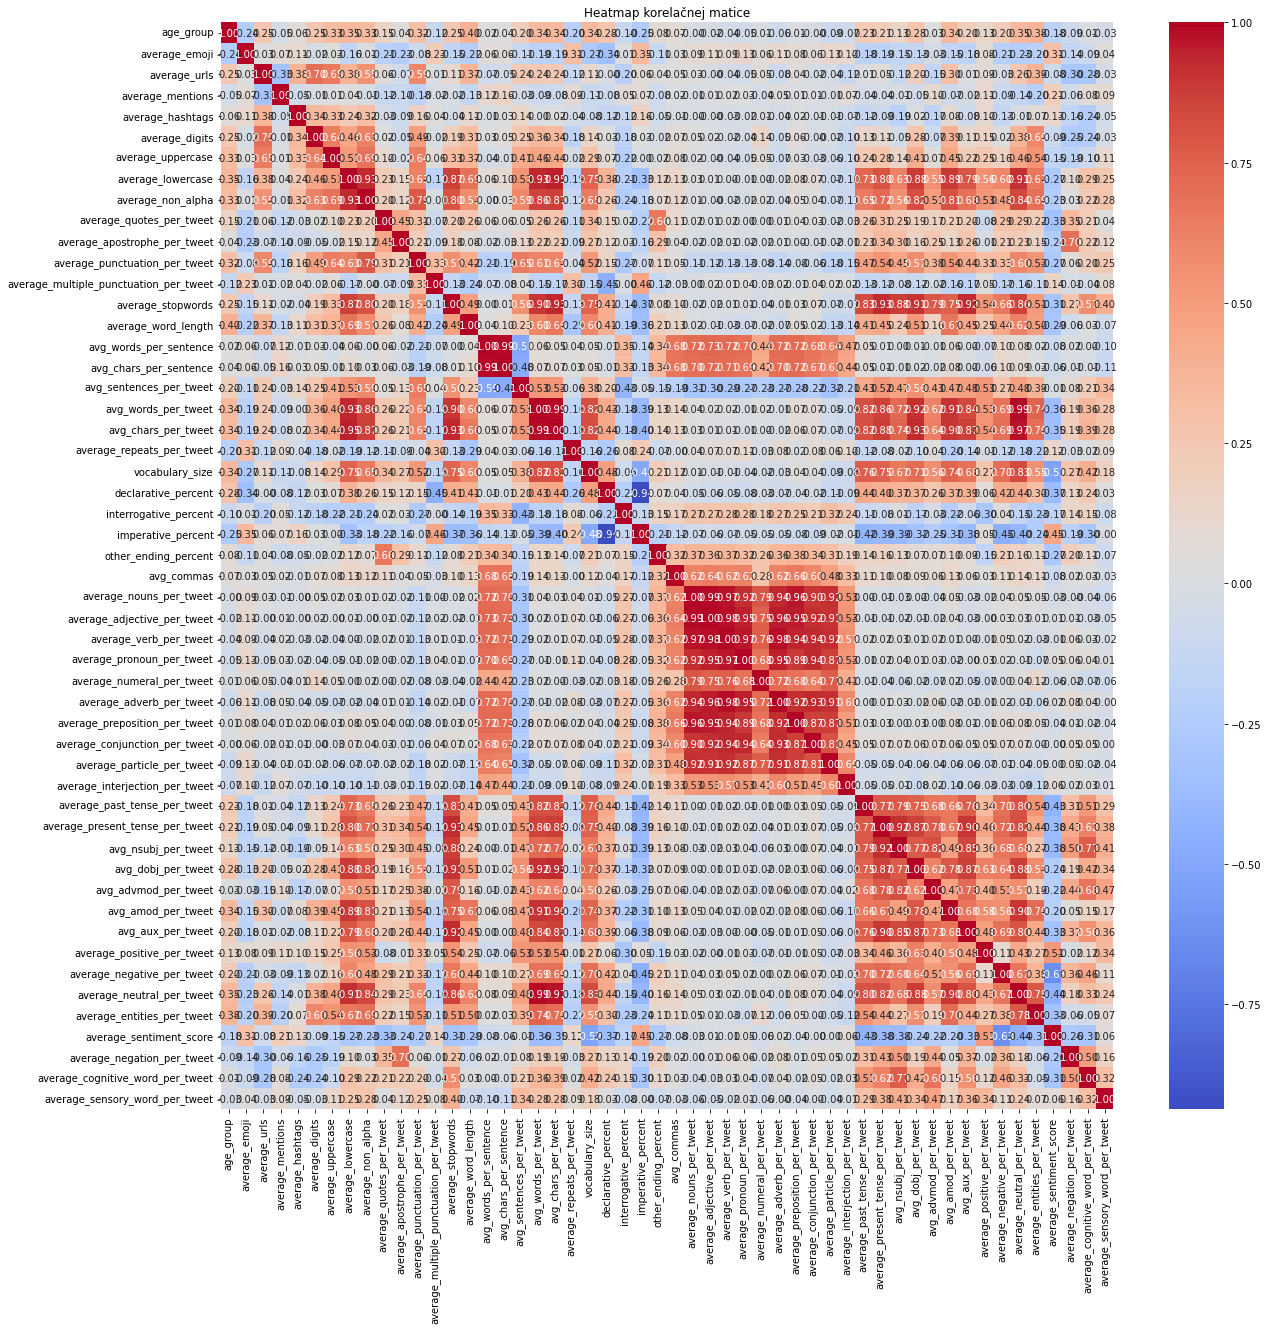

In [12]:
dataset_corr=dataset.drop([ 'lemmatized_text' ], axis=1)
corr_matrix = dataset_corr.corr()

# Vytvor heatmap
plt.figure(figsize=(20, 20))  # Nastav veľkosť obrázka podľa potreby
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap korelačnej matice')
plt.show()

ROZDELENIE NA TRENOVACI A TESTOVACI DATASET

Bez outlieerov a skalovania

In [13]:
y = dataset['age_group']
X = dataset.drop(['age_group'], axis=1) 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3172 entries, 3877 to 4122
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   average_emoji                           3172 non-null   float64
 1   average_urls                            3172 non-null   float64
 2   average_mentions                        3172 non-null   float64
 3   average_hashtags                        3172 non-null   float64
 4   average_digits                          3172 non-null   float64
 5   average_uppercase                       3172 non-null   float64
 6   average_lowercase                       3172 non-null   float64
 7   average_non_alpha                       3172 non-null   float64
 8   average_quotes_per_tweet                3172 non-null   float64
 9   average_apostrophe_per_tweet            3172 non-null   float64
 10  average_punctuation_per_tweet           3172 non-null   f

In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1360 entries, 1312 to 3073
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   average_emoji                           1360 non-null   float64
 1   average_urls                            1360 non-null   float64
 2   average_mentions                        1360 non-null   float64
 3   average_hashtags                        1360 non-null   float64
 4   average_digits                          1360 non-null   float64
 5   average_uppercase                       1360 non-null   float64
 6   average_lowercase                       1360 non-null   float64
 7   average_non_alpha                       1360 non-null   float64
 8   average_quotes_per_tweet                1360 non-null   float64
 9   average_apostrophe_per_tweet            1360 non-null   float64
 10  average_punctuation_per_tweet           1360 non-null   f

Kedže veľkosť matice s frekvenciami n-gramov/slov môže byť veľmi vysoká a môže trvať aj veľmi dlho spustenie, tak sme sa rozhodli dať iba niekoľko nafrekventovanejším n-gramov/slov. Skúsili sme s rôznymi veľkosťami n-gramov natrénovať modeli aby sme videli, ktorá veľkosť je najefektívnejšia. Najlepšie by bolo toto spustiť aj s inými verziami datasetu (s outliermi, skalovaním a podobne), však to by bolo veľmi časovo náročné, tak sme zvolili túto možnosť so zakladnym datasetom. Po spustení tohto kodu sme väčšinou manuálne prepísali max_features v kode nižšie, kde sa vytvárali frekvencie n-gramov/slov, s ktorými pracujeme neskôr.

In [17]:
max_features_options = [500, 1000, 2000, 3000, 4000, 5000]  # Rôzne veľkosti slovníkov

for max_features in max_features_options:
    # Vektorizácia pre CountVectorizer
    vectorizer_ngram = CountVectorizer(ngram_range=(1, 4), analyzer='word', max_features=max_features)
    ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
    ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])
    
    # Kombinovanie n-gramov s ostatnými príznakmi, odstránenie 'lemmatized_text'
    X_train_dropped = X_train.drop(['lemmatized_text'], axis=1)
    X_test_dropped = X_test.drop(['lemmatized_text'], axis=1)
    X_train_combined = hstack([X_train_dropped, ngram_train])
    X_test_combined = hstack([X_test_dropped, ngram_test])

    # Trénovanie modelov
    models = {
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting Maschine': GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model: {model_name}, Max Features: {max_features}, Accuracy: {accuracy:.2f}')

Model: SVC, Max Features: 500, Accuracy: 0.35
Model: Random Forest, Max Features: 500, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 500, Accuracy: 0.42
Model: SVC, Max Features: 1000, Accuracy: 0.35
Model: Random Forest, Max Features: 1000, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 1000, Accuracy: 0.41
Model: SVC, Max Features: 2000, Accuracy: 0.35
Model: Random Forest, Max Features: 2000, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 2000, Accuracy: 0.41
Model: SVC, Max Features: 3000, Accuracy: 0.35
Model: Random Forest, Max Features: 3000, Accuracy: 0.38
Model: Gradient Boosting Maschine, Max Features: 3000, Accuracy: 0.41
Model: SVC, Max Features: 4000, Accuracy: 0.35
Model: Random Forest, Max Features: 4000, Accuracy: 0.39
Model: Gradient Boosting Maschine, Max Features: 4000, Accuracy: 0.42
Model: SVC, Max Features: 5000, Accuracy: 0.35
Model: Random Forest, Max Features: 5000, Accuracy: 0.40
Model: Gradient Boosting Masc

In [18]:
max_features_options = [500, 1000, 2000, 3000, 4000, 5000]  # Rôzne veľkosti slovníkov

for max_features in max_features_options:
    # Vektorizácia pre TfidfVectorizer
    vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 4), analyzer='word', max_features=max_features)
    ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
    ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])
    
    # Kombinovanie n-gramov s ostatnými príznakmi, odstránenie 'lemmatized_text'
    X_train_dropped = X_train.drop(['lemmatized_text'], axis=1)
    X_test_dropped = X_test.drop(['lemmatized_text'], axis=1)
    X_train_combined = hstack([X_train_dropped, ngram_train])
    X_test_combined = hstack([X_test_dropped, ngram_test])

    # Trénovanie modelov
    models = {
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting Maschine': GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model: {model_name}, Max Features: {max_features}, Accuracy: {accuracy:.2f}')

Model: SVC, Max Features: 500, Accuracy: 0.32
Model: Random Forest, Max Features: 500, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 500, Accuracy: 0.42
Model: SVC, Max Features: 1000, Accuracy: 0.32
Model: Random Forest, Max Features: 1000, Accuracy: 0.39
Model: Gradient Boosting Maschine, Max Features: 1000, Accuracy: 0.43
Model: SVC, Max Features: 2000, Accuracy: 0.32
Model: Random Forest, Max Features: 2000, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 2000, Accuracy: 0.43
Model: SVC, Max Features: 3000, Accuracy: 0.32
Model: Random Forest, Max Features: 3000, Accuracy: 0.39
Model: Gradient Boosting Maschine, Max Features: 3000, Accuracy: 0.41
Model: SVC, Max Features: 4000, Accuracy: 0.32
Model: Random Forest, Max Features: 4000, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 4000, Accuracy: 0.42
Model: SVC, Max Features: 5000, Accuracy: 0.32
Model: Random Forest, Max Features: 5000, Accuracy: 0.40
Model: Gradient Boosting Masc

In [19]:
max_features_options = [500, 1000, 2000, 3000, 4000, 5000]  # Rôzne veľkosti slovníkov

for max_features in max_features_options:
    # Vektorizácia pre CountVectorizer
    vectorizer_ngram = CountVectorizer( analyzer='word', max_features=max_features)
    ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
    ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])
    
    # Kombinovanie n-gramov s ostatnými príznakmi, odstránenie 'lemmatized_text'
    X_train_dropped = X_train.drop(['lemmatized_text'], axis=1)
    X_test_dropped = X_test.drop(['lemmatized_text'], axis=1)
    X_train_combined = hstack([X_train_dropped, ngram_train])
    X_test_combined = hstack([X_test_dropped, ngram_test])

    # Trénovanie modelov
    models = {
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting Maschine': GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model: {model_name}, Max Features: {max_features}, Accuracy: {accuracy:.2f}')

Model: SVC, Max Features: 500, Accuracy: 0.35
Model: Random Forest, Max Features: 500, Accuracy: 0.39
Model: Gradient Boosting Maschine, Max Features: 500, Accuracy: 0.41
Model: SVC, Max Features: 1000, Accuracy: 0.35
Model: Random Forest, Max Features: 1000, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 1000, Accuracy: 0.42
Model: SVC, Max Features: 2000, Accuracy: 0.35
Model: Random Forest, Max Features: 2000, Accuracy: 0.39
Model: Gradient Boosting Maschine, Max Features: 2000, Accuracy: 0.42
Model: SVC, Max Features: 3000, Accuracy: 0.35
Model: Random Forest, Max Features: 3000, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 3000, Accuracy: 0.43
Model: SVC, Max Features: 4000, Accuracy: 0.35
Model: Random Forest, Max Features: 4000, Accuracy: 0.39
Model: Gradient Boosting Maschine, Max Features: 4000, Accuracy: 0.42
Model: SVC, Max Features: 5000, Accuracy: 0.35
Model: Random Forest, Max Features: 5000, Accuracy: 0.40
Model: Gradient Boosting Masc

In [20]:
max_features_options = [500, 1000, 2000, 3000, 4000, 5000]  # Rôzne veľkosti slovníkov

for max_features in max_features_options:
    # Vektorizácia pre TfidfVectorizer
    vectorizer_ngram = TfidfVectorizer( analyzer='word', max_features=max_features)
    ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
    ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])
    
    # Kombinovanie n-gramov s ostatnými príznakmi, odstránenie 'lemmatized_text'
    X_train_dropped = X_train.drop(['lemmatized_text'], axis=1)
    X_test_dropped = X_test.drop(['lemmatized_text'], axis=1)
    X_train_combined = hstack([X_train_dropped, ngram_train])
    X_test_combined = hstack([X_test_dropped, ngram_test])

    # Trénovanie modelov
    models = {
        'SVC': SVC(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting Maschine': GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        model.fit(X_train_combined, y_train)
        y_pred = model.predict(X_test_combined)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Model: {model_name}, Max Features: {max_features}, Accuracy: {accuracy:.2f}')

Model: SVC, Max Features: 500, Accuracy: 0.32
Model: Random Forest, Max Features: 500, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 500, Accuracy: 0.42
Model: SVC, Max Features: 1000, Accuracy: 0.32
Model: Random Forest, Max Features: 1000, Accuracy: 0.39
Model: Gradient Boosting Maschine, Max Features: 1000, Accuracy: 0.42
Model: SVC, Max Features: 2000, Accuracy: 0.32
Model: Random Forest, Max Features: 2000, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 2000, Accuracy: 0.42
Model: SVC, Max Features: 3000, Accuracy: 0.32
Model: Random Forest, Max Features: 3000, Accuracy: 0.40
Model: Gradient Boosting Maschine, Max Features: 3000, Accuracy: 0.44
Model: SVC, Max Features: 4000, Accuracy: 0.32
Model: Random Forest, Max Features: 4000, Accuracy: 0.39
Model: Gradient Boosting Maschine, Max Features: 4000, Accuracy: 0.41
Model: SVC, Max Features: 5000, Accuracy: 0.32
Model: Random Forest, Max Features: 5000, Accuracy: 0.40
Model: Gradient Boosting Masc

Vytvorenie frekvenci n-gramov, tfidf n-gramov, frekvenci slov, tfidf slov

In [21]:
vectorizer_ngram = CountVectorizer(ngram_range=(1, 4), analyzer='word', max_features=500)
ngram_train = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
ngram_test = vectorizer_ngram.transform(X_test['lemmatized_text'])

In [22]:
vectorizer_ngram = TfidfVectorizer(ngram_range=(1, 4), analyzer='word',  max_features=2000)
ngram_train_tfidf = vectorizer_ngram.fit_transform(X_train['lemmatized_text'])
ngram_test_tfidf = vectorizer_ngram.transform(X_test['lemmatized_text'])

In [23]:
vectorizer_wfreq = CountVectorizer( analyzer='word', max_features=5000)
wfreq_train = vectorizer_wfreq.fit_transform(X_train['lemmatized_text'])
wfreq_test = vectorizer_wfreq.transform(X_test['lemmatized_text'])

In [24]:
vectorizer_wfreq = TfidfVectorizer( analyzer='word',  max_features=3000)
wfreq_train_tfidf = vectorizer_wfreq.fit_transform(X_train['lemmatized_text'])
wfreq_test_tfidf = vectorizer_wfreq.transform(X_test['lemmatized_text'])

Vymazeme slpcec, ktorý sme potrebovali na vytvorenie frekvencí n-gramov a slov, už ho viac nepotrebujeme

In [25]:
X_train = X_train.drop(['lemmatized_text'], axis=1)

In [26]:
X_test = X_test.drop(['lemmatized_text'], axis=1)

Spojíme stlpce datasetu s frekvenciami ngramov/ tfidf ngramov / slov / tfid slov

In [27]:
X_train_combined = hstack([X_train, ngram_train])
X_test_combined = hstack([X_test, ngram_test])
X_train_combined2 = hstack([X_train, ngram_train_tfidf])
X_test_combined2 = hstack([X_test, ngram_test_tfidf])
X_train_combined3 = hstack([X_train, wfreq_train])
X_test_combined3 = hstack([X_test, wfreq_test])
X_train_combined4 = hstack([X_train, wfreq_train_tfidf])
X_test_combined4 = hstack([X_test, wfreq_test_tfidf])

S ošetrenými outliermi

OUTLIERI

Rozhodla som sa riešiť outlierov (lebo niektoré algoritmy strojového učenia sú na to citlivé napríklad SVC) na základe vekových kategorií, kedže hodnoty v stlpcoch sa môžu líšiť na základe veku a riešiť outlierov všeobecne v rámci celeho stlpca by mohlo zmenšiť rozdiely medzi vekovými skupinami. Zvolila som postup nahradenia outlierov meanom, kedže nechcem vymazávať a chcem ponechať rovnaký počet vzoriek. Zvolila som nahradiť dolných aj horných 10% aby som nahradila najviac vychýlené hodnoty, však aby som aj neskreslila veľmi distribúciu dát

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4532 entries, 0 to 4531
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age_group                               4532 non-null   int64  
 1   average_emoji                           4532 non-null   float64
 2   average_urls                            4532 non-null   float64
 3   average_mentions                        4532 non-null   float64
 4   average_hashtags                        4532 non-null   float64
 5   average_digits                          4532 non-null   float64
 6   average_uppercase                       4532 non-null   float64
 7   average_lowercase                       4532 non-null   float64
 8   average_non_alpha                       4532 non-null   float64
 9   average_quotes_per_tweet                4532 non-null   float64
 10  average_apostrophe_per_tweet            4532 non-null   floa

In [29]:
columns=['declarative_percent','interrogative_percent', 'imperative_percent', 'other_ending_percent', 'avg_commas','average_nouns_per_tweet', 'average_adjective_per_tweet', 'average_verb_per_tweet', 'average_pronoun_per_tweet', 'average_numeral_per_tweet', 'average_adverb_per_tweet', 'average_preposition_per_tweet','average_conjunction_per_tweet', 'average_particle_per_tweet', 'average_interjection_per_tweet', 'average_past_tense_per_tweet','average_present_tense_per_tweet', 'avg_nsubj_per_tweet','avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet','avg_aux_per_tweet' ]

Ako môžeme vidieť na grafe, tak veľa stlpcov obsahuje outlieerov - graf je pre celý dataset, nie pre x_train/x_test

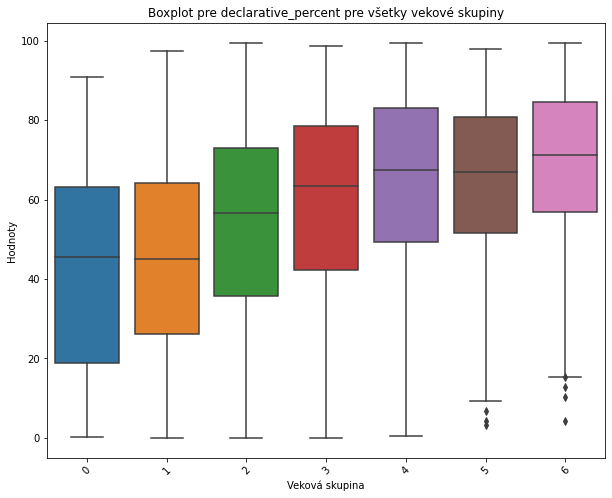

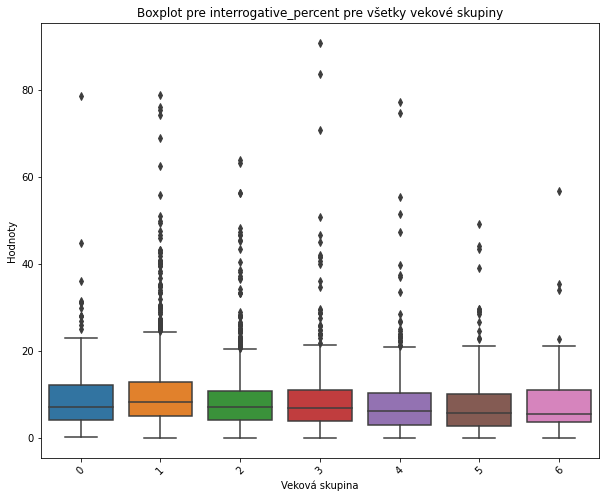

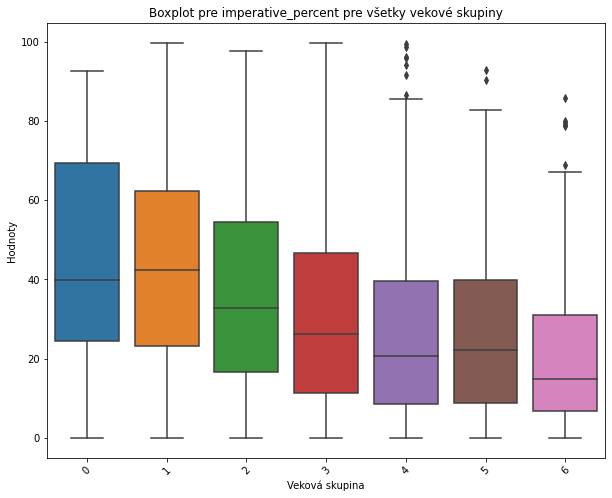

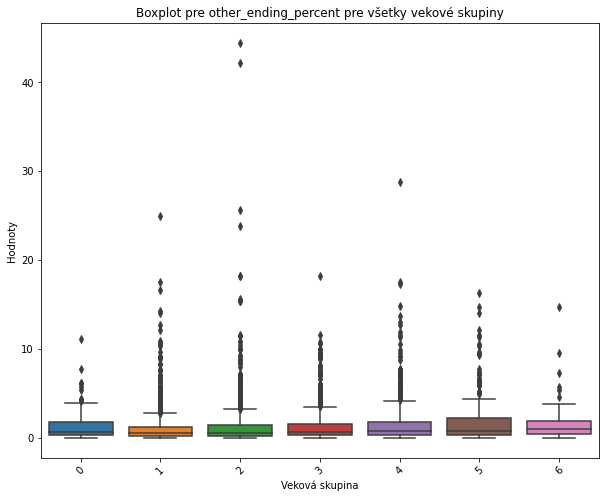

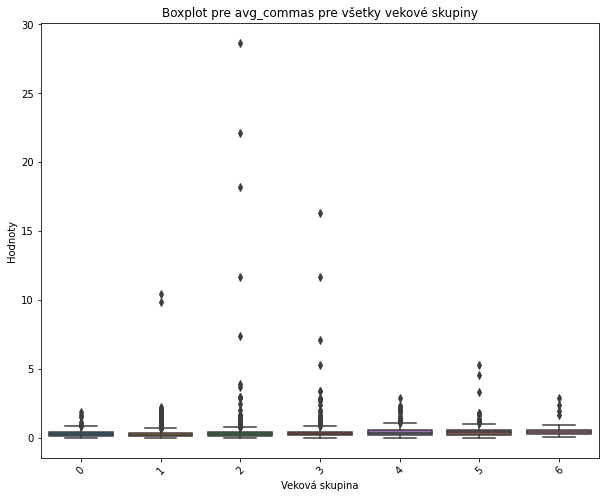

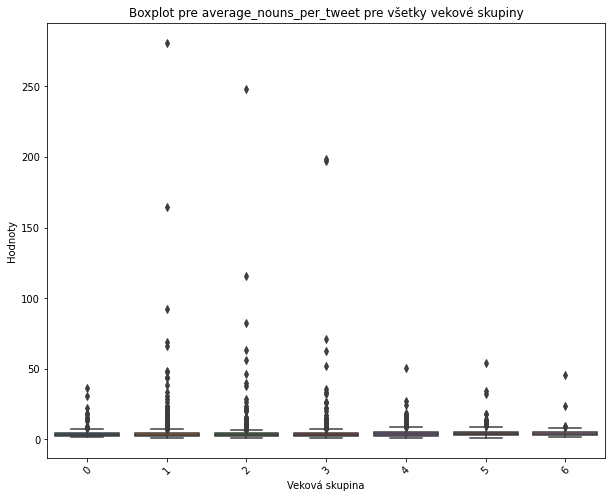

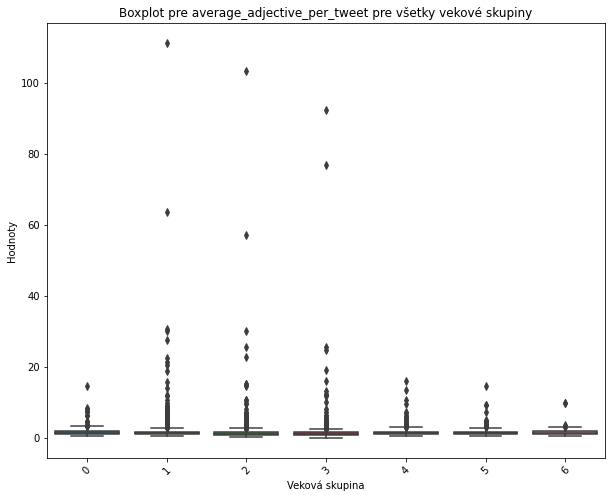

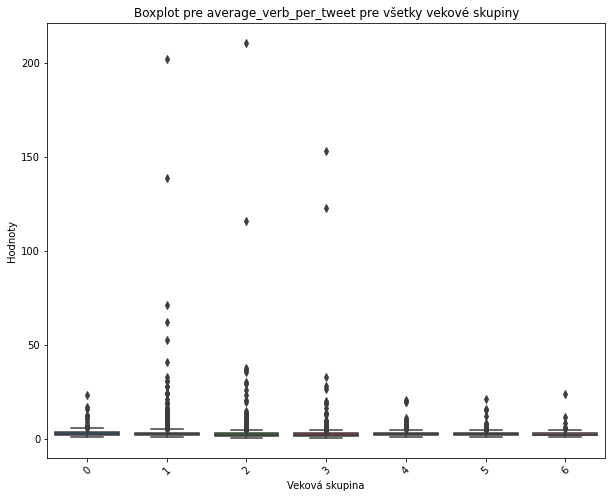

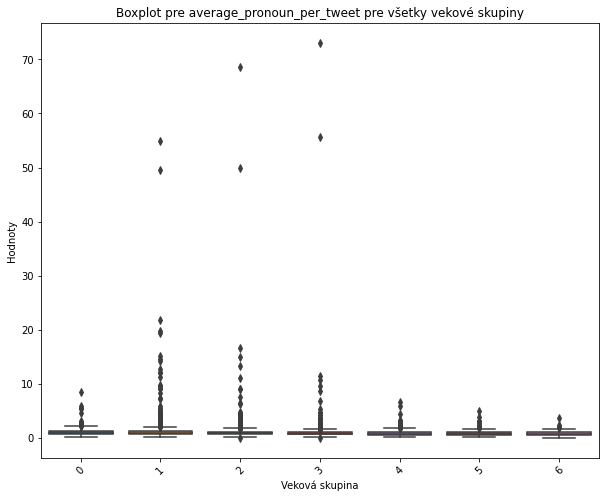

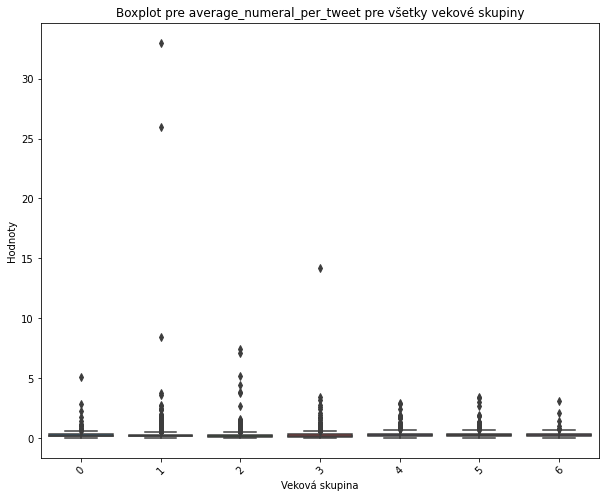

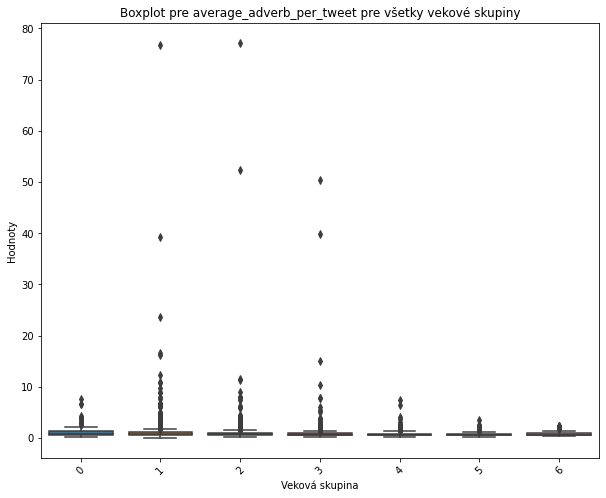

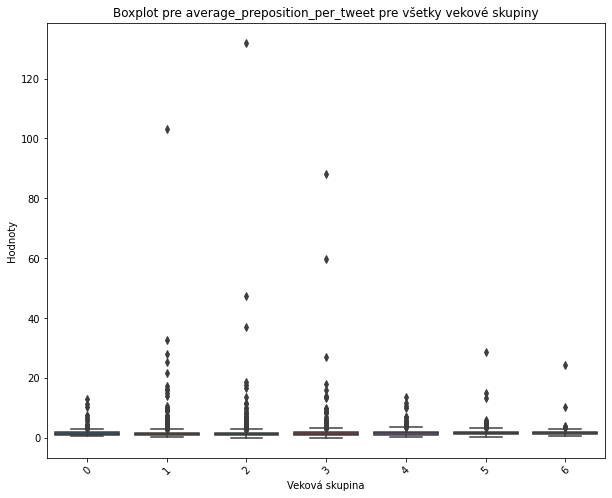

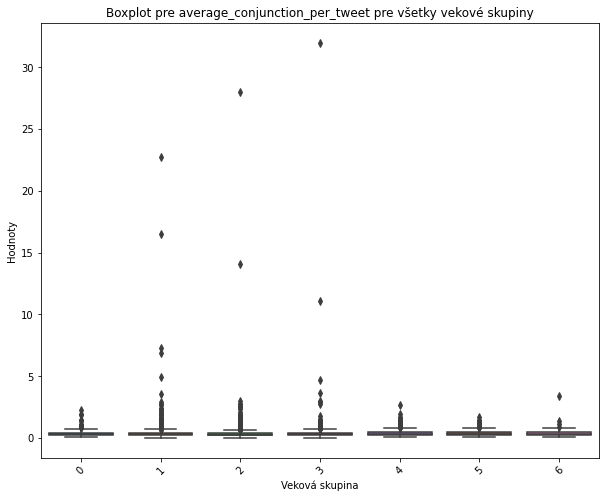

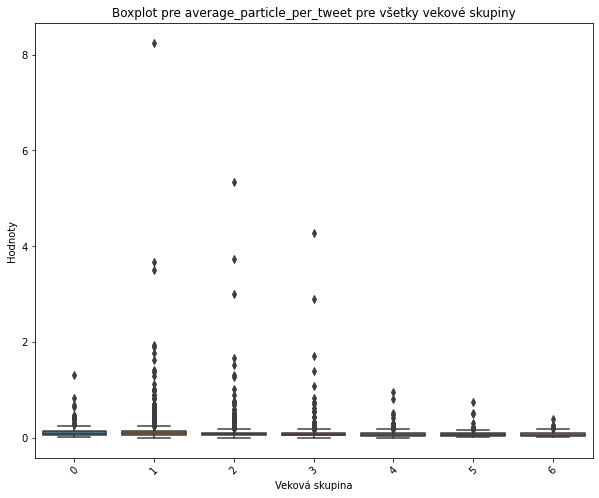

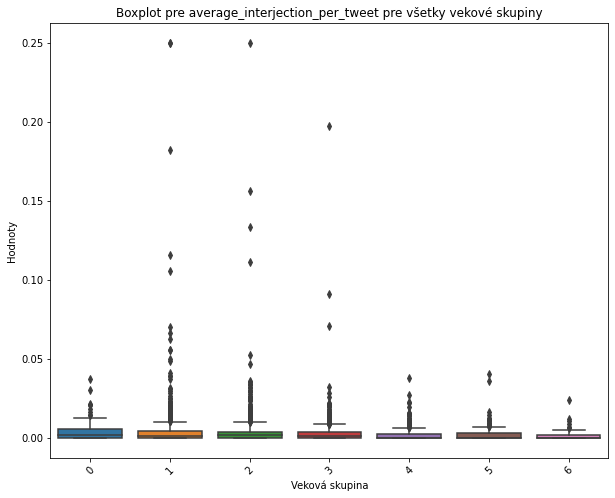

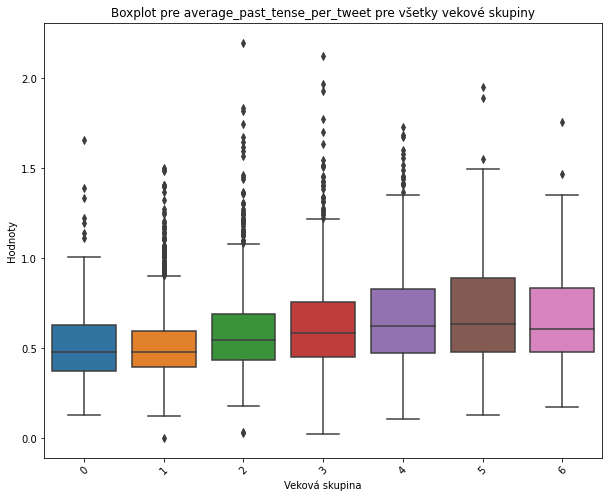

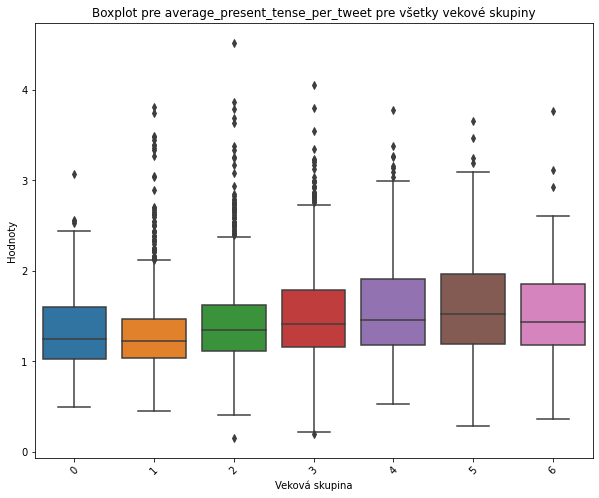

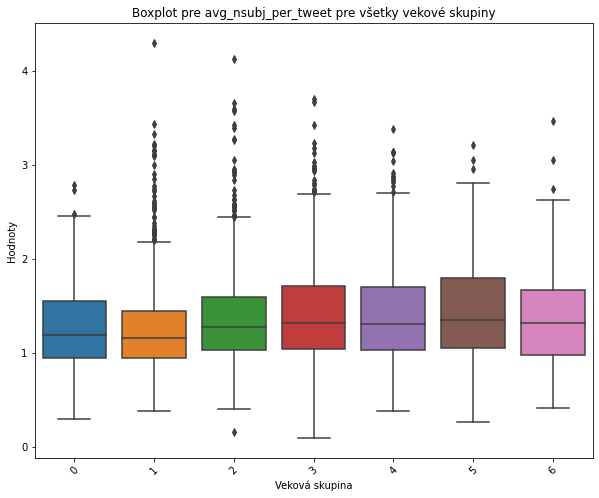

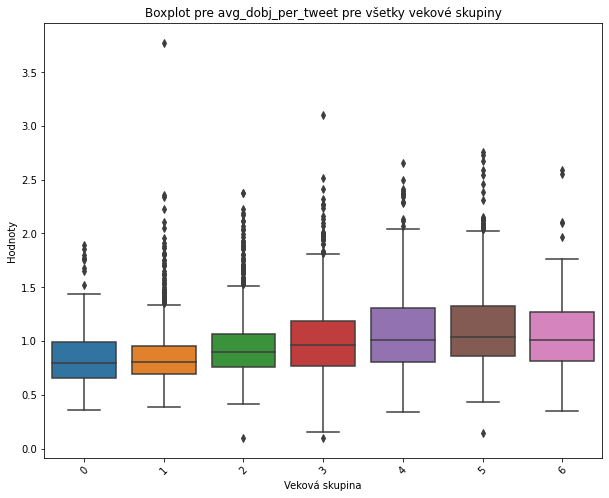

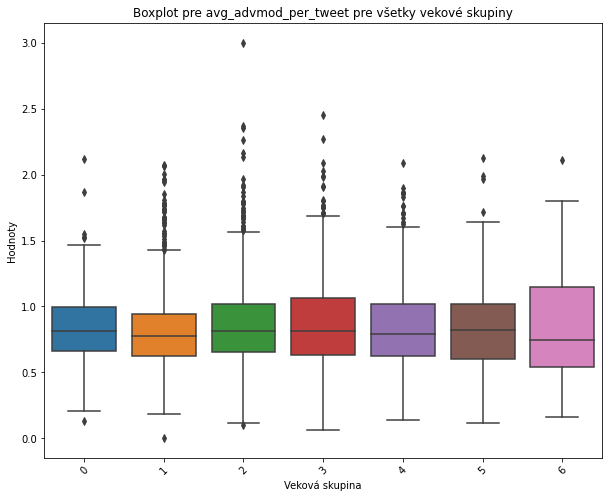

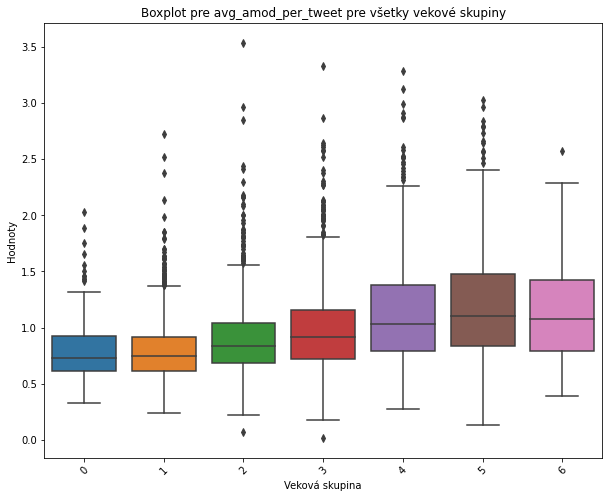

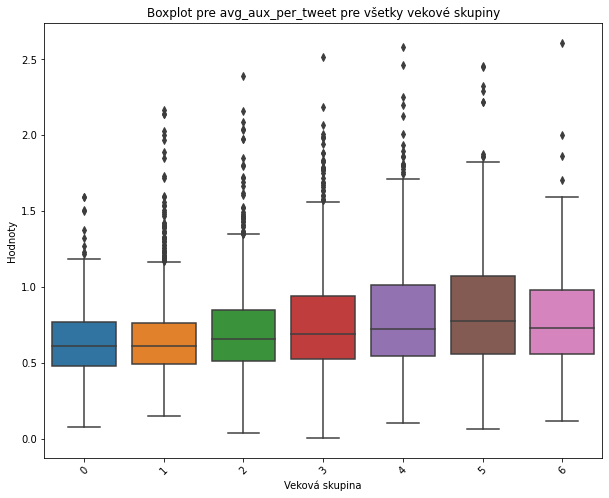

In [30]:
for column in columns:
    plt.figure(figsize=(10, 8)) # Nastaví veľkosť obrázku pre lepšiu čitateľnosť
    sns.boxplot(x='age_group', y=column, data=dataset)
    plt.title(f'Boxplot pre {column} pre všetky vekové skupiny')
    plt.ylabel('Hodnoty')
    plt.xlabel('Veková skupina')
    plt.xticks(rotation=45) # Otáčanie menoviek pre lepšiu čitateľnosť
    plt.show()

Chceli sme zistiť outlierov pre každý slpcec a zároveň vekovú skupinu. Zistili sme si v celkom datasete (nie pre X_train a X_test oddelene, kedže tie hranice by sa mohli líšiť) hranice a mean pre každý stlpec a zároveň každú vekovú skupinu.

In [31]:
global_stats = {}
# Prechádza cez unikátne vekové skupiny v dátovom rámci
for age_group in dataset['age_group'].unique():
    # Prechádza cez zoznam stĺpcov, pre ktoré sa majú vypočítať štatistiky
    for column in columns:
        # Vyberie podmnožinu dát patriacu k aktuálnej vekovej skupine
        group_subset = dataset[dataset['age_group'] == age_group]
        # Vypočíta dolný limit ako 10. percentil hodnôt v aktuálnom stĺpci a vekovej skupine
        lower_limit = group_subset[column].quantile(0.10)
        # Vypočíta horny limit ako 90. percentil hodnôt v aktuálnom stĺpci a vekovej skupine
        upper_limit = group_subset[column].quantile(0.90)
        # Vypočítanie priemernej hodnoty pre dáta medzi dolným a horným limitom
        mean_value = group_subset[(group_subset[column] >= lower_limit) & (group_subset[column] <= upper_limit)][column].mean()
        # Uloženie vypočítaných štatistík do slovníka s kľúčom ako dvojica (veková skupina, názov stĺpca)
        global_stats[(age_group, column)] = (lower_limit, upper_limit, mean_value)

In [32]:
X_train_out = X_train.copy()
X_test_out = X_test.copy()

Následne sme si prvky v stlpcoch, ktoré su pod dolnou hranicou alebo za hornou hranocou nahranili meanom v trenovacom aj v testovacom datasete.

In [33]:
# Iteruje cez každý riadok datasetu
for index, row in X_train_out.iterrows():
    # Získa skupinu veku pre aktuálny riadok z iného DataFrame y_train pomocou indexu
    age_group = y_train.loc[index] 
    
    # Iteruje cez stlpce
    for column in columns:
        # Získa dolný a horný limit a priemernú hodnotu pre aktuálnu kombináciu vekovej skupiny a stĺpca z predtým vytvoreného slovníka global_stats
        lower_limit, upper_limit, mean_value = global_stats[(age_group, column)]
        
        # Ak je hodnota v aktuálnom riadku a stĺpci menšia ako dolný limit alebo väčšia ako horný limit,
        # nastaví hodnotu v tomto riadku a stĺpci na priemernú hodnotu pre túto skupinu
        if row[column] < lower_limit or row[column] > upper_limit:
            X_train_out.at[index, column] = mean_value

In [34]:
# Iteruje cez každý riadok datasetu
for index, row in X_test_out.iterrows():
     # Získa skupinu veku pre aktuálny riadok z iného DataFrame y_train pomocou indexu
    age_group = y_test.loc[index] 
    # Iteruje cez stlpce
    for column in columns:
         # Získa dolný a horný limit a priemernú hodnotu pre aktuálnu kombináciu vekovej skupiny a stĺpca z predtým vytvoreného slovníka global_stats
        lower_limit, upper_limit, mean_value = global_stats[(age_group, column)]
        # Ak je hodnota v aktuálnom riadku a stĺpci menšia ako dolný limit alebo väčšia ako horný limit,
        # nastaví hodnotu v tomto riadku a stĺpci na priemernú hodnotu pre túto skupinu
        if row[column] < lower_limit or row[column] > upper_limit:
            X_test_out.at[index, column] = mean_value

Spojenie s ngramami / tfidf n-gramami /slovami / tfidf slovami

In [35]:
X_train_combined_out = hstack([X_train_out, ngram_train])
X_test_combined_out = hstack([X_test_out, ngram_test])
X_train_combined2_out = hstack([X_train_out, ngram_train_tfidf])
X_test_combined2_out = hstack([X_test_out, ngram_test_tfidf])
X_train_combined3_out = hstack([X_train_out, wfreq_train])
X_test_combined3_out = hstack([X_test_out, wfreq_test])
X_train_combined4_out = hstack([X_train_out, wfreq_train_tfidf])
X_test_combined4_out = hstack([X_test_out, wfreq_test_tfidf])

S aplikovaným škálovaním

SKALOVANIE

Kedže množstvo mojích dát má iné rozsahy a niektoré algoritmy strojového učenia (najmä tie, ktoré sú založené na vzdialenosti ) ako napríklad SVC sú citlivé na rozsahy tak som sa rozhodla pre škálovanie. Škálovanie môže pomôcť zabezpečiť, že jeden atribút neovládne ostatné pri výpočte vzdialeností.

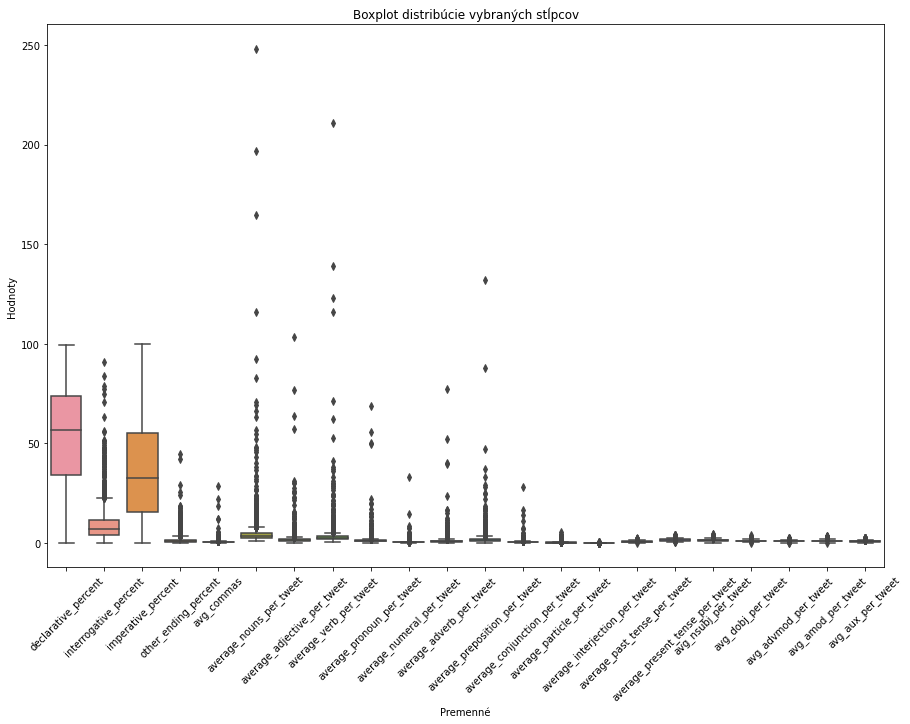

In [36]:
melted_df = pd.melt(X_train, value_vars=columns)

# Teraz použite Seaborn na zobrazenie distribúcií pomocou boxplotu
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=45)
plt.title('Boxplot distribúcie vybraných stĺpcov')
plt.xlabel('Premenné')
plt.ylabel('Hodnoty')
plt.show()

In [37]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

Skalovala som si všetky numericke stpce a to tak, že som to fitla na trenovaci dataset a transormovala na obidvoch, aj na trenovacom aj testovacom

In [38]:
scaler = MinMaxScaler()
scaler.fit(X_train_scaled[columns])
X_train_scaled[columns] = scaler.transform(X_train_scaled[columns])
X_test_scaled[columns] = scaler.transform(X_test_scaled[columns])

Spojenie datasetu s ngramami / tfidf n-gramami / slovami / tfidf slovami

In [39]:
X_train_combined_scaled = hstack([X_train_scaled, ngram_train])
X_test_combined_scaled = hstack([X_test_scaled, ngram_test])
X_train_combined2_scaled = hstack([X_train_scaled, ngram_train_tfidf])
X_test_combined2_scaled = hstack([X_test_scaled, ngram_test_tfidf])
X_train_combined3_scaled = hstack([X_train_scaled, wfreq_train])
X_test_combined3_scaled = hstack([X_test_scaled, wfreq_test])
X_train_combined4_scaled = hstack([X_train_scaled, wfreq_train_tfidf])
X_test_combined4_scaled = hstack([X_test_scaled, wfreq_test_tfidf])

Zobrazili sme si zoskalovane data a vidíme, že sú v rovnakom rozmedzí, však nachádza sa tam množstvo outlierov

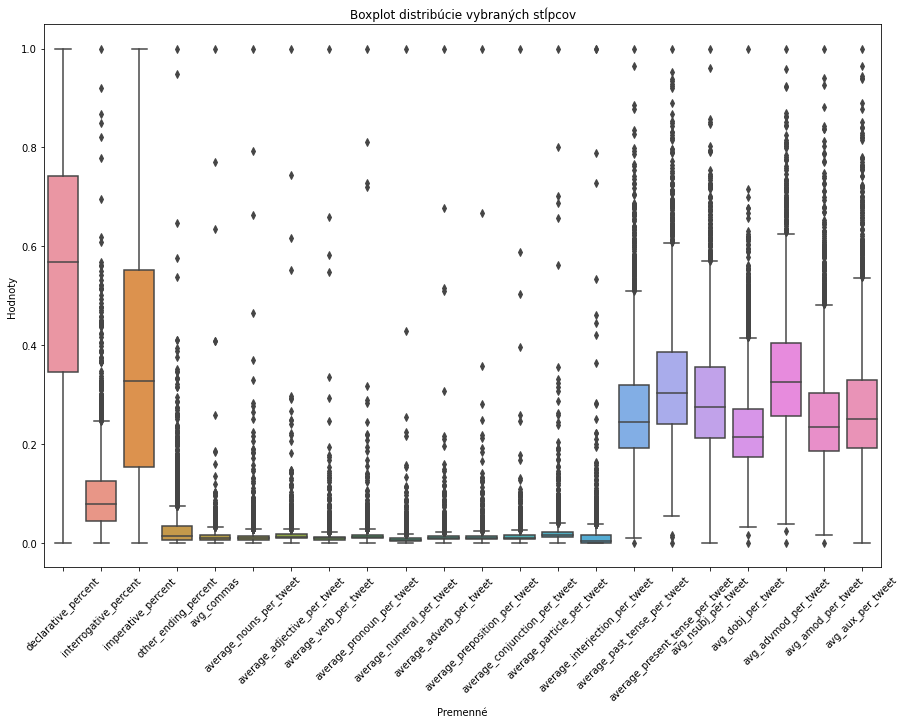

In [40]:
melted_df = pd.melt(X_train_scaled, value_vars=columns)

# Teraz použite Seaborn na zobrazenie distribúcií pomocou boxplotu
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=45)
plt.title('Boxplot distribúcie vybraných stĺpcov')
plt.xlabel('Premenné')
plt.ylabel('Hodnoty')
plt.show()

S ošetrenými outliermi aj aplikovaným škálovaním

In [41]:
X_train_scal_out = X_train_out.copy()
X_test_scal_out = X_test_out.copy()

Zoškálujem si dataset s ošetrenými outliermi

In [42]:
scaler = MinMaxScaler()
scaler.fit(X_train_scaled[columns])
X_train_scal_out[columns] = scaler.transform(X_train_scal_out[columns])
X_test_scal_out[columns] = scaler.transform(X_test_scal_out[columns])

Spojím si dataset s ngramami / tfidf ngramami / slovami / tfidf slovami

In [43]:
X_train_combined_scal_out = hstack([X_train_scal_out, ngram_train])
X_test_combined_scal_out = hstack([X_test_scal_out, ngram_test])
X_train_combined2_scal_out = hstack([X_train_scal_out, ngram_train_tfidf])
X_test_combined2_scal_out = hstack([X_test_scal_out, ngram_test_tfidf])
X_train_combined3_scal_out = hstack([X_train_scal_out, wfreq_train])
X_test_combined3_scal_out = hstack([X_test_scal_out, wfreq_test])
X_train_combined4_scal_out = hstack([X_train_scal_out, wfreq_train_tfidf])
X_test_combined4_scal_out = hstack([X_test_scal_out, wfreq_test_tfidf])

TRENOVANIE 1

Prvé trenovanie som vykonala so všetkými premennými (bez výberu črt) aby som videla aké výsledky môžem dostať. Vykonala som testovanie na 3 modeloch: Random Forest, GBM a SVC. Taktiež na každom modeli som skúsila rôzne varianty datasetu aby som videla s ktorým viem dosiahnúť najlepšie výsledky: bez ošetrenia outlierov a bez škálovania, bez ošetrenia outlierov a bez škálovania a s ngramami, bez ošetrenia outlierov a bez škálovania a s tfidf ngramami, s ošetrením outlierov, s ošetrením outlierov a s ngrami, s ošetrením outlierov a s tfidf ngramami, so škálovaním, so škálovaním a s ngramami, so škálovaním a s tfidf ngramami, s ošetrením outlierov a so škálovaním, s ošetrením outlierov a so škálovaním a s ngramami, s ošetrením outlierov a so škálovaním a s tfidf ngramami.

In [44]:
results_list1_svc=[]#na ukladanie testovacej a trenovacej accuracy

SVC - bez ošetrenia outlierov a skalovania

Trenovanie modelu

In [45]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Predikovanie na trenovacich datach

In [46]:
y_pred_train = svc_model.predict(X_train)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))


Presnosť: 0.3389029003783102
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.39      0.79      0.52       926
           2       0.27      0.32      0.29       861
           3       0.26      0.09      0.14       609
           4       0.31      0.03      0.06       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.34      3172
   macro avg       0.17      0.18      0.14      3172
weighted avg       0.27      0.34      0.26      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predikovanie na testovacich datach

In [47]:
y_pred = svc_model.predict(X_test)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.38      0.77      0.51       383
           2       0.25      0.32      0.28       364
           3       0.15      0.06      0.08       261
           4       0.25      0.02      0.04       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.32      1360
   macro avg       0.15      0.17      0.13      1360
weighted avg       0.23      0.32      0.24      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Uloženie trenovacej a testovacej accuracy do poľa s výsledkami z prveho testovania pre svc

In [48]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Zobrazenie metrik

In [49]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.3f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.316
Recall: 0.17
Precision: 0.15
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

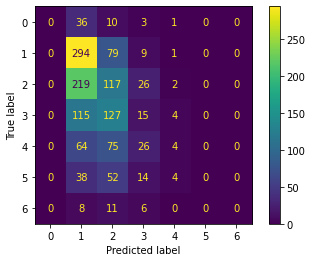

In [50]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - bez ošetrenia outlierov a skalovania a ngram

In [51]:
svc_model = SVC()
svc_model.fit(X_train_combined, y_train)

SVC()

In [52]:
y_pred_train = svc_model.predict(X_train_combined)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.37042875157629257
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.43      0.77      0.55       926
           2       0.29      0.40      0.34       861
           3       0.31      0.14      0.20       609
           4       0.47      0.07      0.12       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.37      3172
   macro avg       0.22      0.20      0.17      3172
weighted avg       0.32      0.37      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
y_pred = svc_model.predict(X_test_combined)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.43      0.74      0.55       383
           2       0.28      0.43      0.34       364
           3       0.20      0.10      0.13       261
           4       0.35      0.05      0.08       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.18      0.19      0.16      1360
weighted avg       0.28      0.35      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.35
Recall: 0.19
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


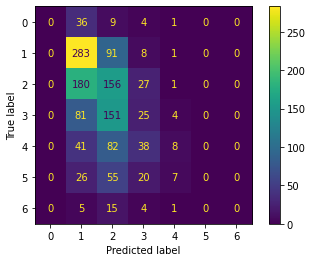

In [56]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - bez ošetrenia outlierov a skalovania a tfidf ngram

In [57]:
svc_model = SVC()
svc_model.fit(X_train_combined2, y_train)

SVC()

In [58]:
y_pred_train = svc_model.predict(X_train_combined2)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3376418663303909
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.39      0.79      0.52       926
           2       0.27      0.32      0.29       861
           3       0.25      0.09      0.13       609
           4       0.29      0.03      0.05       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.34      3172
   macro avg       0.17      0.17      0.14      3172
weighted avg       0.27      0.34      0.26      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
y_pred = svc_model.predict(X_test_combined2)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.38      0.77      0.51       383
           2       0.25      0.32      0.28       364
           3       0.15      0.06      0.08       261
           4       0.25      0.02      0.04       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.32      1360
   macro avg       0.15      0.17      0.13      1360
weighted avg       0.23      0.32      0.24      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))


Accuracy: 0.32
Recall: 0.17
Precision: 0.15
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


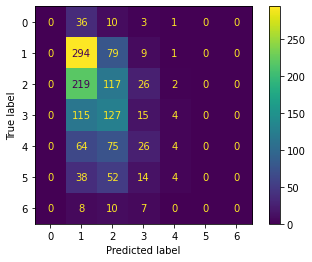

In [62]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - bez ošetrenia outlierov a skalovania a word frequency

In [63]:
svc_model = SVC()
svc_model.fit(X_train_combined3, y_train)

SVC()

In [64]:
y_pred_train = svc_model.predict(X_train_combined3)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.37168978562421184
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.43      0.78      0.55       926
           2       0.30      0.40      0.34       861
           3       0.32      0.14      0.20       609
           4       0.45      0.07      0.12       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.37      3172
   macro avg       0.21      0.20      0.17      3172
weighted avg       0.32      0.37      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
y_pred = svc_model.predict(X_test_combined3)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.43      0.74      0.55       383
           2       0.28      0.43      0.34       364
           3       0.21      0.10      0.14       261
           4       0.33      0.05      0.08       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.18      0.19      0.16      1360
weighted avg       0.28      0.35      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.35
Recall: 0.19
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


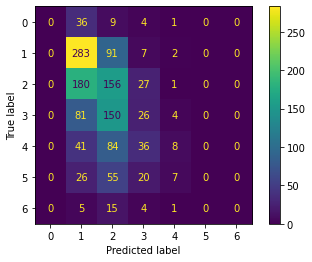

In [68]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - bez ošetrenia outlierov a skalovania a tfidf word frequency

In [69]:
svc_model = SVC()
svc_model.fit(X_train_combined4, y_train)

SVC()

In [70]:
y_pred_train = svc_model.predict(X_train_combined4)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3376418663303909
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.39      0.79      0.52       926
           2       0.27      0.32      0.29       861
           3       0.25      0.09      0.13       609
           4       0.29      0.03      0.05       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.34      3172
   macro avg       0.17      0.17      0.14      3172
weighted avg       0.27      0.34      0.26      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
y_pred = svc_model.predict(X_test_combined4)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.38      0.77      0.51       383
           2       0.25      0.32      0.28       364
           3       0.15      0.06      0.08       261
           4       0.25      0.02      0.04       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.32      1360
   macro avg       0.15      0.17      0.13      1360
weighted avg       0.23      0.32      0.24      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))

Accuracy: 0.32
Recall: 0.17
Precision: 0.15


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


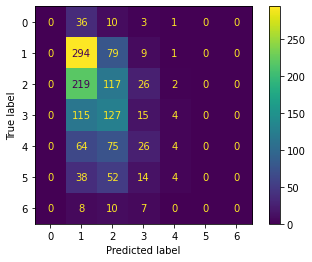

In [74]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov

In [75]:
svc_model = SVC()
svc_model.fit(X_train_out, y_train)

SVC()

In [76]:
y_pred_train = svc_model.predict(X_train_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.39      0.79      0.52       926
           2       0.27      0.33      0.30       861
           3       0.27      0.11      0.15       609
           4       0.31      0.03      0.06       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
y_pred = svc_model.predict(X_test_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.39      0.76      0.52       383
           2       0.25      0.34      0.29       364
           3       0.15      0.07      0.09       261
           4       0.24      0.02      0.04       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.32      1360
   macro avg       0.15      0.17      0.13      1360
weighted avg       0.24      0.32      0.25      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.32
Recall: 0.17
Precision: 0.15
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


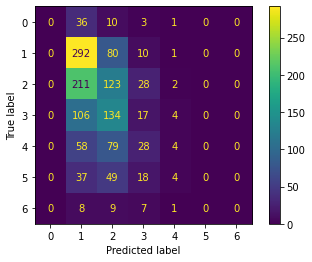

In [80]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov a ngram

In [81]:
svc_model = SVC()
svc_model.fit(X_train_combined_out, y_train)

SVC()

In [82]:
y_pred_train = svc_model.predict(X_train_combined_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.44      0.76      0.56       926
           2       0.30      0.43      0.35       861
           3       0.31      0.14      0.20       609
           4       0.47      0.07      0.12       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.37      3172
   macro avg       0.22      0.20      0.18      3172
weighted avg       0.33      0.37      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
y_pred = svc_model.predict(X_test_combined_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.45      0.73      0.56       383
           2       0.29      0.45      0.35       364
           3       0.20      0.10      0.14       261
           4       0.35      0.05      0.08       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.18      0.19      0.16      1360
weighted avg       0.28      0.35      0.29      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.35
Recall: 0.19
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


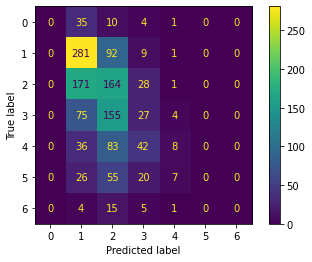

In [86]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov a tfidf ngram

In [87]:
svc_model = SVC()
svc_model.fit(X_train_combined2_out, y_train)

SVC()

In [88]:
y_pred_train = svc_model.predict(X_train_combined2_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.39      0.79      0.52       926
           2       0.27      0.33      0.30       861
           3       0.27      0.10      0.15       609
           4       0.32      0.03      0.06       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
y_pred = svc_model.predict(X_test_combined2_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.39      0.76      0.51       383
           2       0.25      0.34      0.29       364
           3       0.16      0.07      0.09       261
           4       0.25      0.02      0.04       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.32      1360
   macro avg       0.15      0.17      0.13      1360
weighted avg       0.24      0.32      0.25      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.32
Recall: 0.17
Precision: 0.15
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


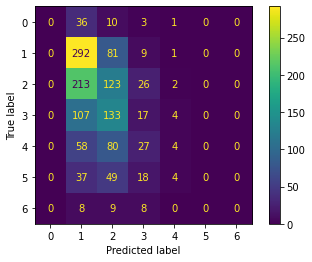

In [92]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov a word frequency

In [93]:
svc_model = SVC()
svc_model.fit(X_train_combined3_out, y_train)

SVC()

In [94]:
y_pred_train = svc_model.predict(X_train_combined3_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.44      0.76      0.56       926
           2       0.30      0.43      0.35       861
           3       0.31      0.15      0.20       609
           4       0.45      0.07      0.12       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.37      3172
   macro avg       0.21      0.20      0.18      3172
weighted avg       0.33      0.37      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
y_pred = svc_model.predict(X_test_combined3_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.44      0.74      0.55       383
           2       0.28      0.45      0.35       364
           3       0.20      0.10      0.13       261
           4       0.35      0.05      0.08       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.18      0.19      0.16      1360
weighted avg       0.28      0.35      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.35
Recall: 0.19
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


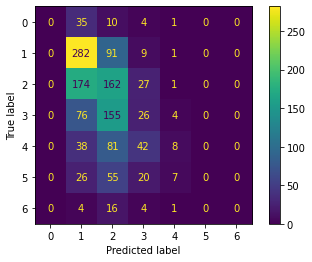

In [98]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrím outlierov a tfidf word frequency

In [99]:
svc_model = SVC()
svc_model.fit(X_train_combined4_out, y_train)

SVC()

In [100]:
y_pred_train = svc_model.predict(X_train_combined4_out)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.39      0.79      0.52       926
           2       0.27      0.33      0.30       861
           3       0.27      0.10      0.15       609
           4       0.32      0.03      0.06       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
y_pred = svc_model.predict(X_test_combined4_out)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.39      0.76      0.51       383
           2       0.25      0.34      0.29       364
           3       0.16      0.07      0.09       261
           4       0.25      0.02      0.04       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.32      1360
   macro avg       0.15      0.17      0.13      1360
weighted avg       0.24      0.32      0.25      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.32
Recall: 0.17
Precision: 0.15
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


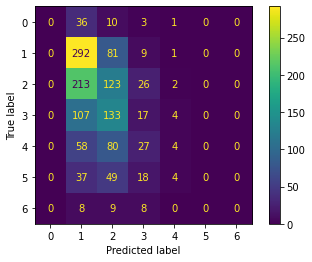

In [104]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim

In [105]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [106]:
y_pred_train = svc_model.predict(X_train_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3376418663303909
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.38      0.80      0.52       926
           2       0.27      0.31      0.29       861
           3       0.26      0.09      0.14       609
           4       0.30      0.03      0.05       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.34      3172
   macro avg       0.17      0.18      0.14      3172
weighted avg       0.27      0.34      0.26      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
y_pred = svc_model.predict(X_test_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.38      0.77      0.50       383
           2       0.25      0.31      0.28       364
           3       0.15      0.06      0.08       261
           4       0.25      0.02      0.04       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.31      1360
   macro avg       0.15      0.17      0.13      1360
weighted avg       0.23      0.31      0.24      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.31
Recall: 0.17
Precision: 0.15
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


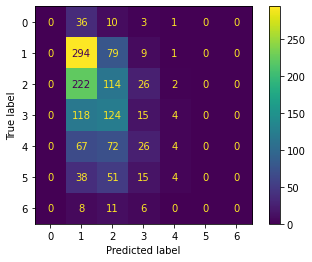

In [110]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim a ngram

In [111]:
svc_model = SVC()
svc_model.fit(X_train_combined_scaled, y_train)

SVC()

In [112]:
y_pred_train = svc_model.predict(X_train_combined_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.37042875157629257
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.43      0.77      0.55       926
           2       0.30      0.41      0.34       861
           3       0.31      0.14      0.19       609
           4       0.47      0.07      0.12       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.37      3172
   macro avg       0.22      0.20      0.17      3172
weighted avg       0.32      0.37      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
y_pred = svc_model.predict(X_test_combined_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.34558823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.43      0.74      0.55       383
           2       0.28      0.43      0.34       364
           3       0.20      0.10      0.13       261
           4       0.35      0.05      0.08       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.18      0.19      0.16      1360
weighted avg       0.28      0.35      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.35
Recall: 0.19
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


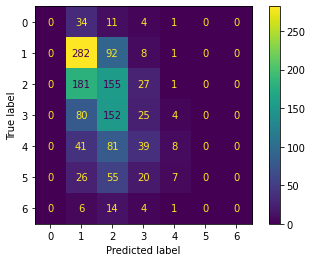

In [116]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim a tfidf ngram

In [117]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scaled, y_train)

SVC()

In [118]:
y_pred_train = svc_model.predict(X_train_combined2_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3373266078184111
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.38      0.80      0.52       926
           2       0.27      0.31      0.29       861
           3       0.26      0.09      0.14       609
           4       0.29      0.03      0.05       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.34      3172
   macro avg       0.17      0.17      0.14      3172
weighted avg       0.27      0.34      0.26      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
y_pred = svc_model.predict(X_test_combined2_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.31323529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.38      0.77      0.50       383
           2       0.25      0.31      0.27       364
           3       0.15      0.06      0.08       261
           4       0.25      0.02      0.04       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.31      1360
   macro avg       0.15      0.17      0.13      1360
weighted avg       0.23      0.31      0.24      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.31
Recall: 0.17
Precision: 0.15
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


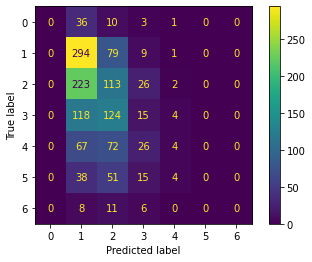

In [122]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim a word frequency

In [123]:
svc_model = SVC()
svc_model.fit(X_train_combined3_scaled, y_train)

SVC()

In [124]:
y_pred_train = svc_model.predict(X_train_combined3_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.371374527112232
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.43      0.77      0.55       926
           2       0.30      0.40      0.34       861
           3       0.32      0.14      0.20       609
           4       0.46      0.07      0.12       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.37      3172
   macro avg       0.21      0.20      0.17      3172
weighted avg       0.32      0.37      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
y_pred = svc_model.predict(X_test_combined3_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.34558823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.43      0.74      0.54       383
           2       0.28      0.42      0.34       364
           3       0.20      0.10      0.13       261
           4       0.35      0.05      0.08       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.18      0.19      0.16      1360
weighted avg       0.28      0.35      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.35
Recall: 0.19
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


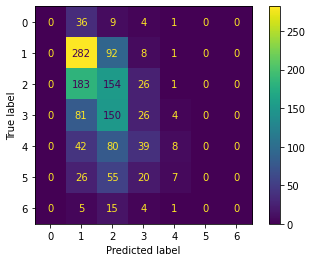

In [128]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - so skalovanim a tfidf word frequency

In [129]:
svc_model = SVC()
svc_model.fit(X_train_combined4_scaled, y_train)

SVC()

In [130]:
y_pred_train = svc_model.predict(X_train_combined4_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3373266078184111
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.38      0.80      0.52       926
           2       0.27      0.31      0.29       861
           3       0.26      0.09      0.14       609
           4       0.29      0.03      0.05       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.34      3172
   macro avg       0.17      0.17      0.14      3172
weighted avg       0.27      0.34      0.26      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
y_pred = svc_model.predict(X_test_combined4_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.31323529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.38      0.77      0.50       383
           2       0.25      0.31      0.27       364
           3       0.15      0.06      0.08       261
           4       0.25      0.02      0.04       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.31      1360
   macro avg       0.15      0.17      0.13      1360
weighted avg       0.23      0.31      0.24      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.31
Recall: 0.17
Precision: 0.15
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


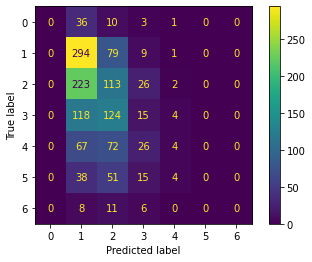

In [134]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim

In [135]:
svc_model = SVC()
svc_model.fit(X_train_scal_out, y_train)

SVC()

In [136]:
y_pred_train = svc_model.predict(X_train_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.34363177805800754
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.39      0.79      0.52       926
           2       0.27      0.33      0.30       861
           3       0.27      0.11      0.15       609
           4       0.31      0.03      0.06       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
y_pred = svc_model.predict(X_test_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3205882352941177
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.39      0.76      0.52       383
           2       0.25      0.34      0.29       364
           3       0.15      0.07      0.09       261
           4       0.24      0.02      0.04       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.32      1360
   macro avg       0.15      0.17      0.13      1360
weighted avg       0.24      0.32      0.25      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.32
Recall: 0.17
Precision: 0.15
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


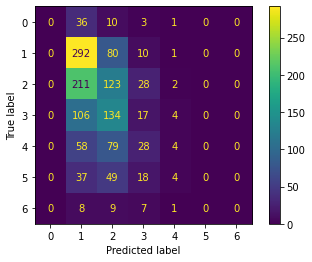

In [140]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim a ngram

In [141]:
svc_model = SVC()
svc_model.fit(X_train_combined_scal_out, y_train)

SVC()

In [142]:
y_pred_train = svc_model.predict(X_train_combined_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3735813366960908
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.44      0.76      0.56       926
           2       0.30      0.43      0.35       861
           3       0.31      0.14      0.20       609
           4       0.47      0.07      0.12       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.37      3172
   macro avg       0.22      0.20      0.18      3172
weighted avg       0.33      0.37      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
y_pred = svc_model.predict(X_test_combined_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.35294117647058826
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.45      0.73      0.56       383
           2       0.29      0.45      0.35       364
           3       0.20      0.10      0.14       261
           4       0.35      0.05      0.08       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.18      0.19      0.16      1360
weighted avg       0.28      0.35      0.29      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.35
Recall: 0.19
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


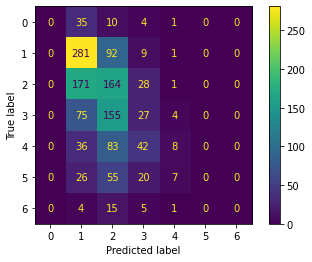

In [146]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim a tfidf ngram

In [147]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scal_out, y_train)

SVC()

In [148]:
y_pred_train = svc_model.predict(X_train_combined2_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.34237074401008827
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.39      0.79      0.52       926
           2       0.27      0.33      0.30       861
           3       0.27      0.10      0.15       609
           4       0.32      0.03      0.06       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
y_pred = svc_model.predict(X_test_combined2_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3205882352941177
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.39      0.76      0.51       383
           2       0.25      0.34      0.29       364
           3       0.16      0.07      0.09       261
           4       0.25      0.02      0.04       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.32      1360
   macro avg       0.15      0.17      0.13      1360
weighted avg       0.24      0.32      0.25      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.32
Recall: 0.17
Precision: 0.15
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


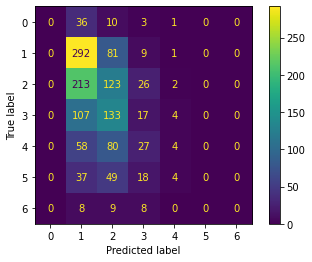

In [152]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim a word frequency

In [153]:
svc_model = SVC()
svc_model.fit(X_train_combined3_scal_out, y_train)

SVC()

In [154]:
y_pred_train = svc_model.predict(X_train_combined3_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3748423707440101
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.44      0.76      0.56       926
           2       0.30      0.43      0.35       861
           3       0.31      0.15      0.20       609
           4       0.45      0.07      0.12       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.37      3172
   macro avg       0.21      0.20      0.18      3172
weighted avg       0.33      0.37      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
y_pred = svc_model.predict(X_test_combined3_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3514705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.44      0.74      0.55       383
           2       0.28      0.45      0.35       364
           3       0.20      0.10      0.13       261
           4       0.35      0.05      0.08       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.18      0.19      0.16      1360
weighted avg       0.28      0.35      0.28      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.35
Recall: 0.19
Precision: 0.18
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


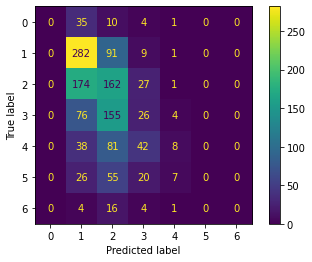

In [158]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - s ošetrim outlierov a skalovanim a tfidf word frequency

In [159]:
svc_model = SVC()
svc_model.fit(X_train_combined4_scal_out, y_train)

SVC()

In [160]:
y_pred_train = svc_model.predict(X_train_combined4_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.34237074401008827
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.39      0.79      0.52       926
           2       0.27      0.33      0.30       861
           3       0.27      0.10      0.15       609
           4       0.32      0.03      0.06       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.34      3172
   macro avg       0.18      0.18      0.15      3172
weighted avg       0.28      0.34      0.27      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [161]:
y_pred = svc_model.predict(X_test_combined4_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3205882352941177
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.39      0.76      0.51       383
           2       0.25      0.34      0.29       364
           3       0.16      0.07      0.09       261
           4       0.25      0.02      0.04       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.32      1360
   macro avg       0.15      0.17      0.13      1360
weighted avg       0.24      0.32      0.25      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [162]:
results_list1_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.32
Recall: 0.17
Precision: 0.15
F1 Score: 0.13


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


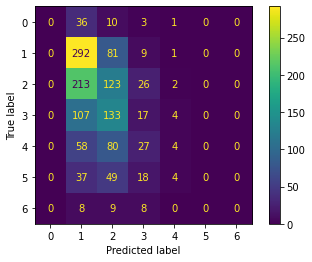

In [164]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [165]:
results_svc1 = pd.DataFrame(results_list1_svc)
print(results_svc1)

    accuracy_train  accuracy_test  precision_train  precision_test  \
0         0.338903       0.316176         0.174536        0.147110   
1         0.370429       0.347059         0.215987        0.179908   
2         0.337642       0.316176         0.170199        0.146969   
3         0.371690       0.347794         0.213779        0.179376   
4         0.337642       0.316176         0.170199        0.146969   
5         0.343632       0.320588         0.177808        0.147565   
6         0.373581       0.352941         0.217219        0.182999   
7         0.342371       0.320588         0.178003        0.149976   
8         0.374842       0.351471         0.214520        0.181872   
9         0.342371       0.320588         0.178003        0.149976   
10        0.337642       0.313971         0.172529        0.146110   
11        0.370429       0.345588         0.215705        0.179330   
12        0.337327       0.313235         0.170488        0.145807   
13        0.371375  

Podľa výsledkov po prvom testovani svc môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi s ngram a s ošetrenými outliermi so skalovanim s ngram. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov a pridanie textovej reprezentácie n-gram. Aj ked sme použili všetký dáta, tak model nevyzerá byť pretrénovaný, kedže trénovacie accuracy nie je priveľmi vysoké oproti trénovacému accuracy. Zatiaľ tento model nevykazuje vysokú presnosť.

RANDOM FOREST - bez ošetrenia outlierov a skalovania

In [166]:
results_list1_rf=[]#na ukladanie trenovacej a testovacej accuracy

Trenovanie modelu na trenovacich datach

In [167]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

Predikovanie na trenovacich datach

In [168]:
y_pred_train = rf_model.predict(X_train)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



Predikovanie na testovacich datach

In [169]:
y_pred = rf_model.predict(X_test)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3985294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.54      0.64      0.58       383
           2       0.34      0.48      0.40       364
           3       0.29      0.28      0.29       261
           4       0.37      0.26      0.31       169
           5       0.29      0.06      0.09       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.40      0.25      0.24      1360
weighted avg       0.40      0.40      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Zobrazenie metrik

In [171]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.25
Precision: 0.40
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

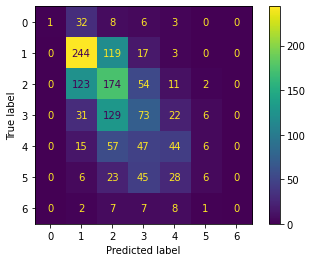

In [172]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - bez ošetrenia outlierov a skalovania a ngram

In [173]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined, y_train)

RandomForestClassifier()

In [174]:
y_pred_train = rf_model.predict(X_train_combined)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [175]:
y_pred = rf_model.predict(X_test_combined)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.38676470588235295
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.52      0.67      0.59       383
           2       0.32      0.47      0.38       364
           3       0.27      0.19      0.22       261
           4       0.34      0.25      0.29       169
           5       0.32      0.06      0.09       108
           6       0.00      0.00      0.00        25

    accuracy                           0.39      1360
   macro avg       0.25      0.23      0.22      1360
weighted avg       0.35      0.39      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.39
Recall: 0.23
Precision: 0.25
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


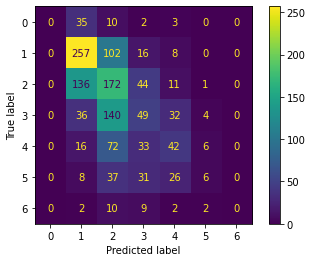

In [178]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - bez ošetrenia outlierov a skalovania a tfidf ngram

In [179]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2, y_train)

RandomForestClassifier()

In [180]:
y_pred_train = rf_model.predict(X_train_combined2)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [181]:
y_pred = rf_model.predict(X_test_combined2)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4088235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.52      0.74      0.61       383
           2       0.35      0.50      0.41       364
           3       0.29      0.21      0.25       261
           4       0.32      0.20      0.24       169
           5       0.38      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.27      0.24      0.22      1360
weighted avg       0.37      0.41      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.27
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


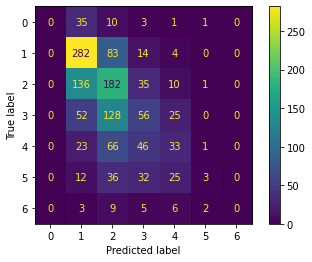

In [184]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - bez ošetrenia outlierov a skalovania a word frequency

In [185]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3, y_train)

RandomForestClassifier()

In [186]:
y_pred_train = rf_model.predict(X_train_combined3)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [187]:
y_pred = rf_model.predict(X_test_combined3)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4022058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.54      0.70      0.61       383
           2       0.33      0.51      0.40       364
           3       0.27      0.20      0.23       261
           4       0.37      0.22      0.28       169
           5       0.50      0.04      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.29      0.24      0.23      1360
weighted avg       0.38      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [189]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.24
Precision: 0.29
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


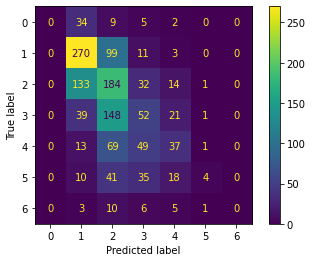

In [190]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - bez ošetrenia outlierov a skalovania a tfidf word frequency

In [191]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4, y_train)

RandomForestClassifier()

In [192]:
y_pred_train = rf_model.predict(X_train_combined4)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [193]:
y_pred = rf_model.predict(X_test_combined4)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40661764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.54      0.72      0.61       383
           2       0.35      0.52      0.41       364
           3       0.27      0.18      0.22       261
           4       0.34      0.21      0.26       169
           5       0.36      0.05      0.08       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.26      0.24      0.23      1360
weighted avg       0.37      0.41      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [194]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [195]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.26
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


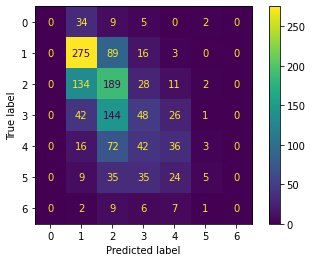

In [196]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov

In [197]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_out, y_train)

RandomForestClassifier()

In [198]:
y_pred_train = rf_model.predict(X_train_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [199]:
y_pred = rf_model.predict(X_test_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7058823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.14      0.25        50
           1       0.74      0.92      0.82       383
           2       0.71      0.84      0.77       364
           3       0.67      0.67      0.67       261
           4       0.60      0.56      0.58       169
           5       0.83      0.23      0.36       108
           6       0.00      0.00      0.00        25

    accuracy                           0.71      1360
   macro avg       0.65      0.48      0.49      1360
weighted avg       0.71      0.71      0.68      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [201]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.71
Recall: 0.48
Precision: 0.65
F1 Score: 0.49


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


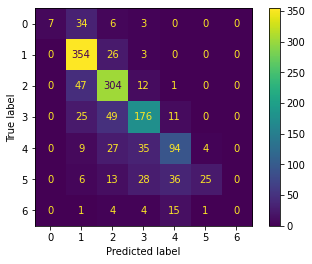

In [202]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov a ngram

In [203]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_out, y_train)

RandomForestClassifier()

In [204]:
y_pred_train = rf_model.predict(X_train_combined_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [205]:
y_pred = rf_model.predict(X_test_combined_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5992647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.69      0.89      0.77       383
           2       0.55      0.74      0.63       364
           3       0.52      0.47      0.49       261
           4       0.55      0.42      0.48       169
           5       0.87      0.12      0.21       108
           6       0.00      0.00      0.00        25

    accuracy                           0.60      1360
   macro avg       0.45      0.38      0.37      1360
weighted avg       0.58      0.60      0.56      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [206]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.60
Recall: 0.38
Precision: 0.45
F1 Score: 0.37


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


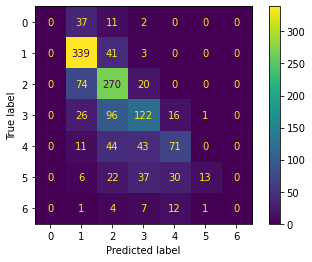

In [208]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov a tfidf ngram

In [209]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_out, y_train)

RandomForestClassifier()

In [210]:
y_pred_train = rf_model.predict(X_train_combined2_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [211]:
y_pred = rf_model.predict(X_test_combined2_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5294117647058824
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.63      0.87      0.73       383
           2       0.47      0.65      0.55       364
           3       0.46      0.35      0.40       261
           4       0.45      0.31      0.37       169
           5       0.50      0.05      0.08       108
           6       0.00      0.00      0.00        25

    accuracy                           0.53      1360
   macro avg       0.36      0.32      0.30      1360
weighted avg       0.49      0.53      0.48      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [212]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [213]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.53
Recall: 0.32
Precision: 0.36
F1 Score: 0.30


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


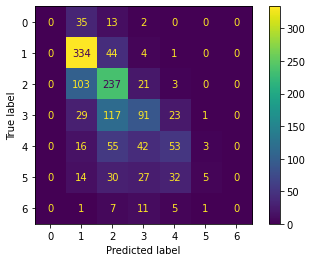

In [214]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov a word frequency

In [215]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_out, y_train)

RandomForestClassifier()

In [216]:
y_pred_train = rf_model.predict(X_train_combined3_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [217]:
y_pred = rf_model.predict(X_test_combined3_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.525
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.65      0.86      0.74       383
           2       0.47      0.68      0.55       364
           3       0.43      0.33      0.38       261
           4       0.42      0.27      0.33       169
           5       0.38      0.06      0.10       108
           6       0.00      0.00      0.00        25

    accuracy                           0.53      1360
   macro avg       0.34      0.31      0.30      1360
weighted avg       0.47      0.53      0.48      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [218]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [219]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.53
Recall: 0.31
Precision: 0.34
F1 Score: 0.30


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


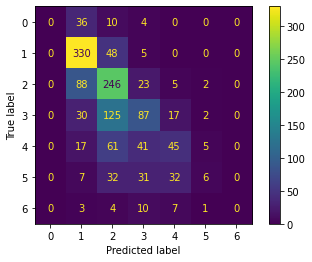

In [220]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrenim outlierov a tfidf word frequency

In [221]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_out, y_train)

RandomForestClassifier()

In [222]:
y_pred_train = rf_model.predict(X_train_combined4_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [223]:
y_pred = rf_model.predict(X_test_combined4_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5352941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.63      0.86      0.73       383
           2       0.48      0.66      0.56       364
           3       0.47      0.38      0.42       261
           4       0.47      0.32      0.38       169
           5       0.60      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.54      1360
   macro avg       0.38      0.32      0.31      1360
weighted avg       0.50      0.54      0.49      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [224]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [225]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.54
Recall: 0.32
Precision: 0.38
F1 Score: 0.31


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


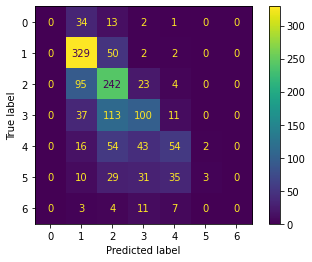

In [226]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim

In [227]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [228]:
y_pred_train = rf_model.predict(X_train_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [229]:
y_pred = rf_model.predict(X_test_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3977941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.50      0.02      0.04        50
           1       0.54      0.63      0.58       383
           2       0.35      0.51      0.41       364
           3       0.28      0.25      0.27       261
           4       0.34      0.26      0.30       169
           5       0.28      0.05      0.08       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.33      0.24      0.24      1360
weighted avg       0.38      0.40      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [230]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [231]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.24
Precision: 0.33
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


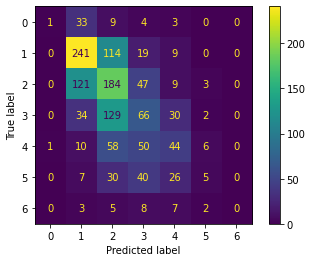

In [232]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim a ngram

In [233]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scaled, y_train)

RandomForestClassifier()

In [234]:
y_pred_train = rf_model.predict(X_train_combined_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [235]:
y_pred = rf_model.predict(X_test_combined_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4088235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.55      0.68      0.61       383
           2       0.35      0.53      0.42       364
           3       0.31      0.25      0.27       261
           4       0.31      0.21      0.25       169
           5       0.50      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.29      0.24      0.23      1360
weighted avg       0.39      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [236]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [237]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.29
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


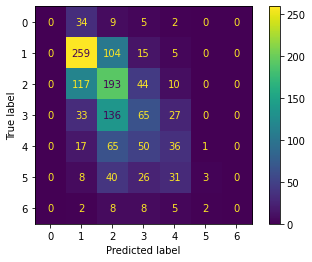

In [238]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim a tfidf ngram

In [239]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scaled, y_train)

RandomForestClassifier()

In [240]:
y_pred_train = rf_model.predict(X_train_combined2_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [241]:
y_pred = rf_model.predict(X_test_combined2_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.56      0.73      0.64       383
           2       0.34      0.51      0.41       364
           3       0.28      0.22      0.25       261
           4       0.36      0.21      0.27       169
           5       0.23      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.25      0.24      0.23      1360
weighted avg       0.37      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [242]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [243]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.25
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


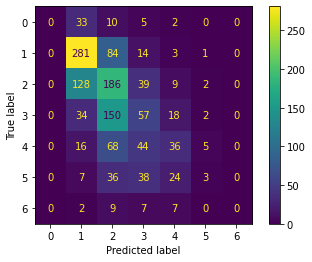

In [244]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim a word frequency

In [245]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_scaled, y_train)

RandomForestClassifier()

In [246]:
y_pred_train = rf_model.predict(X_train_combined3_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [247]:
y_pred = rf_model.predict(X_test_combined3_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.39191176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.53      0.69      0.60       383
           2       0.33      0.48      0.39       364
           3       0.26      0.23      0.25       261
           4       0.33      0.17      0.23       169
           5       0.27      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.39      1360
   macro avg       0.25      0.23      0.22      1360
weighted avg       0.35      0.39      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [248]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [249]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.39
Recall: 0.23
Precision: 0.25
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


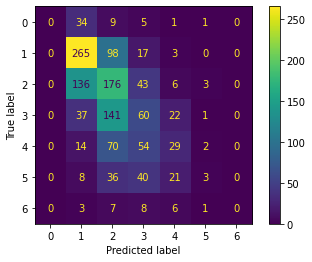

In [250]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - so skalovanim a tfidf word frequency

In [251]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_scaled, y_train)

RandomForestClassifier()

In [252]:
y_pred_train = rf_model.predict(X_train_combined4_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [253]:
y_pred = rf_model.predict(X_test_combined4_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.39191176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.53      0.69      0.60       383
           2       0.33      0.49      0.39       364
           3       0.28      0.21      0.24       261
           4       0.30      0.18      0.23       169
           5       0.25      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.39      1360
   macro avg       0.24      0.23      0.22      1360
weighted avg       0.35      0.39      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [254]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [255]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.39
Recall: 0.23
Precision: 0.24
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


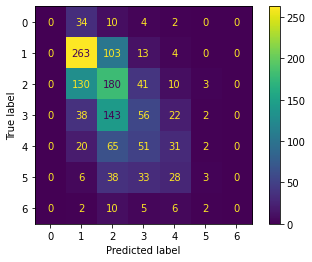

In [256]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim

In [257]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scal_out, y_train)

RandomForestClassifier()

In [258]:
y_pred_train = rf_model.predict(X_train_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [259]:
y_pred = rf_model.predict(X_test_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.700735294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.18        50
           1       0.73      0.94      0.82       383
           2       0.69      0.82      0.75       364
           3       0.67      0.64      0.65       261
           4       0.63      0.58      0.60       169
           5       0.87      0.25      0.39       108
           6       0.00      0.00      0.00        25

    accuracy                           0.70      1360
   macro avg       0.66      0.47      0.49      1360
weighted avg       0.70      0.70      0.67      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [260]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [261]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.70
Recall: 0.47
Precision: 0.66
F1 Score: 0.49


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


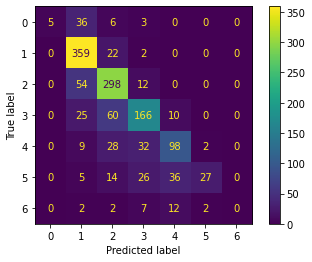

In [262]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim a ngram

In [263]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scal_out, y_train)

RandomForestClassifier()

In [264]:
y_pred_train = rf_model.predict(X_train_combined_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [265]:
y_pred = rf_model.predict(X_test_combined_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.611764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.67      0.89      0.76       383
           2       0.57      0.77      0.66       364
           3       0.61      0.51      0.55       261
           4       0.53      0.40      0.46       169
           5       0.85      0.10      0.18       108
           6       0.00      0.00      0.00        25

    accuracy                           0.61      1360
   macro avg       0.46      0.38      0.37      1360
weighted avg       0.59      0.61      0.57      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [266]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [267]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.61
Recall: 0.38
Precision: 0.46
F1 Score: 0.37


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


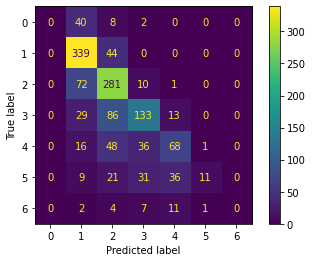

In [268]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim a tfidf ngram

In [269]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scal_out, y_train)

RandomForestClassifier()

In [270]:
y_pred_train = rf_model.predict(X_train_combined2_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [271]:
y_pred = rf_model.predict(X_test_combined2_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5345588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.63      0.86      0.73       383
           2       0.49      0.68      0.57       364
           3       0.45      0.33      0.38       261
           4       0.45      0.34      0.39       169
           5       0.67      0.06      0.10       108
           6       0.00      0.00      0.00        25

    accuracy                           0.53      1360
   macro avg       0.38      0.32      0.31      1360
weighted avg       0.50      0.53      0.49      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [272]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [273]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.53
Recall: 0.32
Precision: 0.38
F1 Score: 0.31


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


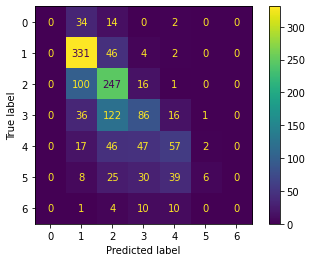

In [274]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim a word frequency

In [275]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_scal_out, y_train)

RandomForestClassifier()

In [276]:
y_pred_train = rf_model.predict(X_train_combined3_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [277]:
y_pred = rf_model.predict(X_test_combined3_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5095588235294117
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.62      0.81      0.70       383
           2       0.45      0.67      0.54       364
           3       0.44      0.33      0.37       261
           4       0.43      0.30      0.35       169
           5       0.50      0.05      0.08       108
           6       0.00      0.00      0.00        25

    accuracy                           0.51      1360
   macro avg       0.35      0.31      0.29      1360
weighted avg       0.47      0.51      0.46      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [278]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [279]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.51
Recall: 0.31
Precision: 0.35
F1 Score: 0.29


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


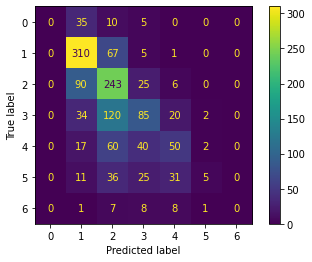

In [280]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - s ošetrením outlierov a skalovanim a tfidf word frequency

In [281]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_scal_out, y_train)

RandomForestClassifier()

In [282]:
y_pred_train = rf_model.predict(X_train_combined4_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [283]:
y_pred = rf_model.predict(X_test_combined4_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5058823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.62      0.85      0.72       383
           2       0.45      0.64      0.53       364
           3       0.39      0.29      0.33       261
           4       0.44      0.28      0.35       169
           5       0.36      0.04      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.51      1360
   macro avg       0.32      0.30      0.28      1360
weighted avg       0.45      0.51      0.46      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [284]:
results_list1_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [285]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.51
Recall: 0.30
Precision: 0.32
F1 Score: 0.28


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


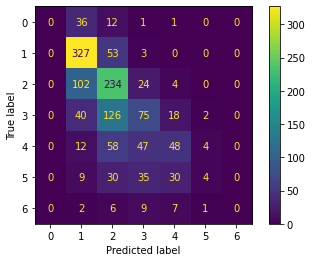

In [286]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [287]:
results_rf1 = pd.DataFrame(results_list1_rf)
print(results_rf1)

    accuracy_train  accuracy_test  precision_train  precision_test  \
0              1.0       0.398529              1.0        0.403403   
1              1.0       0.386765              1.0        0.251722   
2              1.0       0.408824              1.0        0.265561   
3              1.0       0.402206              1.0        0.287158   
4              1.0       0.406618              1.0        0.263270   
5              1.0       0.705882              1.0        0.651244   
6              1.0       0.599265              1.0        0.453991   
7              1.0       0.529412              1.0        0.358797   
8              1.0       0.525000              1.0        0.335120   
9              1.0       0.535294              1.0        0.378922   
10             1.0       0.397794              1.0        0.326879   
11             1.0       0.408824              1.0        0.287760   
12             1.0       0.413971              1.0        0.253891   
13             1.0  

Podľa výsledkov po prvom testovani random forest môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi (bez textových reprezentácií). Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov aj podľa ostatných výsledkov. Pri pridaní textových reprezentácií k dátam sa často accuracy znížilo. Ked si porovnáme accuracy pri trenovacom a testovacom datasete je zrejme, že model sa pretrénoval, však toto je celkom bežné pri stromových algoritmoch a treba to ošetriť hyperparametrami. Zatiaľ tento model vykazuje vyššiu presnosť ako svc.

GRADIENT BOOSTING CLASSIFIER - bez ošetrenia outlierov a skalovania

In [288]:
results_list1_gbm=[]

Trenovanie modelu

In [289]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier()

Predikovanie na trenovacich datach

In [290]:
y_pred_train = gbm_model.predict(X_train)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.7840479192938209
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.70      0.83       142
           1       0.77      0.88      0.82       926
           2       0.69      0.80      0.74       861
           3       0.82      0.69      0.75       609
           4       0.93      0.68      0.79       393
           5       0.95      0.76      0.84       195
           6       1.00      0.98      0.99        46

    accuracy                           0.78      3172
   macro avg       0.88      0.79      0.82      3172
weighted avg       0.80      0.78      0.78      3172



Predikovanie na testovacich datach

In [291]:
y_pred = gbm_model.predict(X_test)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4125
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.14      0.02      0.04        50
           1       0.56      0.64      0.60       383
           2       0.37      0.49      0.42       364
           3       0.33      0.31      0.32       261
           4       0.34      0.27      0.30       169
           5       0.26      0.09      0.14       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.29      0.26      0.26      1360
weighted avg       0.39      0.41      0.39      1360



In [292]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

Zobrazenie metrik

In [293]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.26
Precision: 0.29
F1 Score: 0.26


Vizualizácia výkonnosti modelu

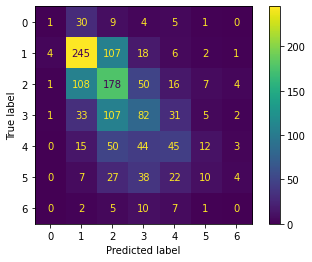

In [294]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - bez ošetrenia outlierov a skalovania a ngram

In [295]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined, y_train)

GradientBoostingClassifier()

In [296]:
y_pred_train = gbm_model.predict(X_train_combined)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8887137452711223
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       142
           1       0.87      0.95      0.91       926
           2       0.83      0.91      0.87       861
           3       0.92      0.84      0.88       609
           4       0.97      0.80      0.88       393
           5       1.00      0.85      0.92       195
           6       1.00      1.00      1.00        46

    accuracy                           0.89      3172
   macro avg       0.94      0.88      0.91      3172
weighted avg       0.90      0.89      0.89      3172



In [297]:
y_pred = gbm_model.predict(X_test_combined)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.12      0.04      0.06        50
           1       0.59      0.69      0.64       383
           2       0.35      0.48      0.41       364
           3       0.31      0.27      0.29       261
           4       0.38      0.24      0.30       169
           5       0.22      0.08      0.12       108
           6       0.04      0.04      0.04        25

    accuracy                           0.41      1360
   macro avg       0.29      0.26      0.26      1360
weighted avg       0.39      0.41      0.39      1360



In [298]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [299]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.26
Precision: 0.29
F1 Score: 0.26


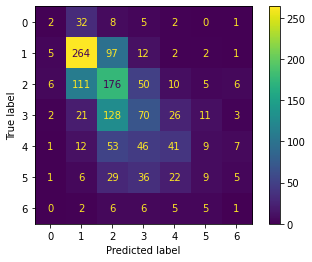

In [300]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()


GRADIENT BOOSTING CLASSIFIER - bez ošetrenia outlierov a skalovania a tfidf ngram

In [301]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2, y_train)

GradientBoostingClassifier()

In [302]:
y_pred_train = gbm_model.predict(X_train_combined2)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.942938209331652
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       142
           1       0.94      0.97      0.95       926
           2       0.91      0.97      0.94       861
           3       0.95      0.94      0.94       609
           4       0.99      0.88      0.93       393
           5       0.99      0.88      0.93       195
           6       1.00      1.00      1.00        46

    accuracy                           0.94      3172
   macro avg       0.97      0.93      0.95      3172
weighted avg       0.94      0.94      0.94      3172



In [303]:
y_pred = gbm_model.predict(X_test_combined2)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4294117647058823
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.18      0.06      0.09        50
           1       0.60      0.70      0.65       383
           2       0.40      0.52      0.45       364
           3       0.35      0.28      0.31       261
           4       0.30      0.27      0.28       169
           5       0.14      0.04      0.06       108
           6       0.00      0.00      0.00        25

    accuracy                           0.43      1360
   macro avg       0.28      0.27      0.26      1360
weighted avg       0.40      0.43      0.41      1360



In [304]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [305]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.27
Precision: 0.28
F1 Score: 0.26


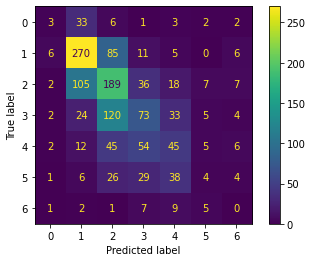

In [306]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - bez ošetrenia outlierov a skalovania a word frequency

In [307]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3, y_train)

GradientBoostingClassifier()

In [308]:
y_pred_train = gbm_model.predict(X_train_combined3)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8852459016393442
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.99      0.77      0.87       142
           1       0.87      0.97      0.92       926
           2       0.81      0.92      0.86       861
           3       0.93      0.82      0.88       609
           4       0.99      0.75      0.85       393
           5       0.99      0.87      0.92       195
           6       1.00      1.00      1.00        46

    accuracy                           0.89      3172
   macro avg       0.94      0.87      0.90      3172
weighted avg       0.89      0.89      0.88      3172



In [309]:
y_pred = gbm_model.predict(X_test_combined3)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4360294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.33      0.08      0.13        50
           1       0.60      0.69      0.64       383
           2       0.38      0.52      0.44       364
           3       0.35      0.30      0.32       261
           4       0.31      0.24      0.27       169
           5       0.35      0.14      0.20       108
           6       0.06      0.04      0.05        25

    accuracy                           0.44      1360
   macro avg       0.34      0.29      0.29      1360
weighted avg       0.42      0.44      0.42      1360



In [310]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [311]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.44
Recall: 0.29
Precision: 0.34
F1 Score: 0.29


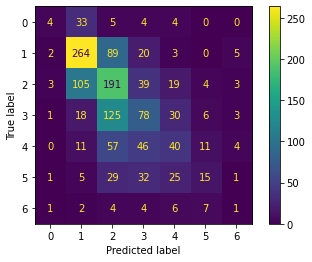

In [312]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - bez ošetrenia outlierov a skalovania a word frequency

In [313]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4, y_train)

GradientBoostingClassifier()

In [314]:
y_pred_train = gbm_model.predict(X_train_combined4)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9363177805800756
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92       142
           1       0.92      0.97      0.95       926
           2       0.90      0.96      0.93       861
           3       0.95      0.91      0.93       609
           4       0.99      0.88      0.93       393
           5       0.99      0.90      0.95       195
           6       1.00      1.00      1.00        46

    accuracy                           0.94      3172
   macro avg       0.97      0.92      0.94      3172
weighted avg       0.94      0.94      0.94      3172



In [315]:
y_pred = gbm_model.predict(X_test_combined4)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42205882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.06      0.02      0.03        50
           1       0.60      0.69      0.64       383
           2       0.37      0.52      0.43       364
           3       0.37      0.27      0.31       261
           4       0.30      0.24      0.27       169
           5       0.24      0.08      0.12       108
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.28      0.26      0.26      1360
weighted avg       0.40      0.42      0.40      1360



In [316]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [317]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.26
Precision: 0.28
F1 Score: 0.26


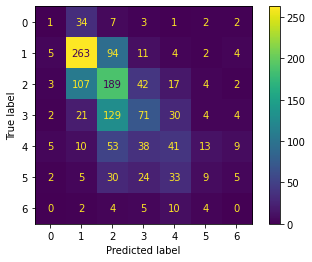

In [318]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov

In [319]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_out, y_train)

GradientBoostingClassifier()

In [320]:
y_pred_train = gbm_model.predict(X_train_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.975094577553594
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       142
           1       0.97      0.99      0.98       926
           2       0.95      0.98      0.97       861
           3       0.99      0.97      0.98       609
           4       1.00      0.96      0.98       393
           5       1.00      0.95      0.97       195
           6       1.00      1.00      1.00        46

    accuracy                           0.98      3172
   macro avg       0.99      0.97      0.98      3172
weighted avg       0.98      0.98      0.98      3172



In [321]:
y_pred = gbm_model.predict(X_test_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8294117647058824
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        50
           1       0.82      0.96      0.88       383
           2       0.83      0.88      0.86       364
           3       0.85      0.82      0.83       261
           4       0.82      0.70      0.76       169
           5       0.83      0.71      0.77       108
           6       0.54      0.28      0.37        25

    accuracy                           0.83      1360
   macro avg       0.81      0.69      0.73      1360
weighted avg       0.83      0.83      0.82      1360



In [322]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [323]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.83
Recall: 0.69
Precision: 0.81
F1 Score: 0.73


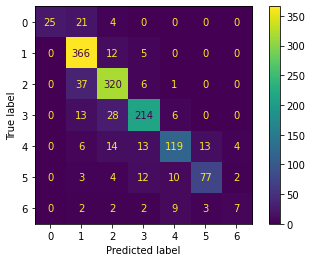

In [324]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a ngram

In [325]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_out, y_train)

GradientBoostingClassifier()

In [326]:
y_pred_train = gbm_model.predict(X_train_combined_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9832912988650694
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       142
           1       0.98      0.99      0.99       926
           2       0.96      0.99      0.98       861
           3       0.99      0.98      0.99       609
           4       1.00      0.97      0.98       393
           5       1.00      0.96      0.98       195
           6       1.00      1.00      1.00        46

    accuracy                           0.98      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.98      0.98      0.98      3172



In [327]:
y_pred = gbm_model.predict(X_test_combined_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8191176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        50
           1       0.84      0.95      0.89       383
           2       0.80      0.90      0.85       364
           3       0.82      0.80      0.81       261
           4       0.80      0.69      0.74       169
           5       0.84      0.61      0.71       108
           6       0.36      0.16      0.22        25

    accuracy                           0.82      1360
   macro avg       0.78      0.66      0.70      1360
weighted avg       0.82      0.82      0.81      1360



In [328]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [329]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.82
Recall: 0.66
Precision: 0.78
F1 Score: 0.70


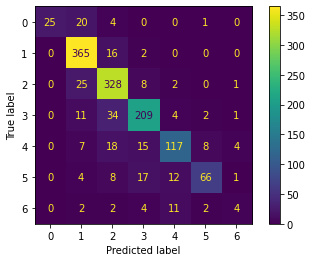

In [330]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a tfidf ngram

In [331]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_out, y_train)

GradientBoostingClassifier()

In [332]:
y_pred_train = gbm_model.predict(X_train_combined2_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9952711223203027
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       142
           1       0.99      1.00      1.00       926
           2       0.99      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       0.99      0.99      0.99       393
           5       1.00      0.98      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       1.00      1.00      1.00      3172



In [333]:
y_pred = gbm_model.predict(X_test_combined2_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7904411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.85      0.44      0.58        50
           1       0.83      0.95      0.88       383
           2       0.76      0.87      0.81       364
           3       0.79      0.75      0.77       261
           4       0.75      0.67      0.71       169
           5       0.86      0.55      0.67       108
           6       0.30      0.12      0.17        25

    accuracy                           0.79      1360
   macro avg       0.73      0.62      0.66      1360
weighted avg       0.79      0.79      0.78      1360



In [334]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [335]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.62
Precision: 0.73
F1 Score: 0.66


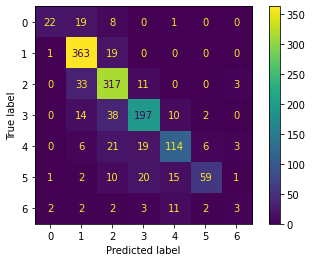

In [336]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a word frequency

In [337]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_out, y_train)

GradientBoostingClassifier()

In [338]:
y_pred_train = gbm_model.predict(X_train_combined3_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9880201765447667
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       142
           1       0.98      1.00      0.99       926
           2       0.99      0.99      0.99       861
           3       0.99      0.99      0.99       609
           4       1.00      0.98      0.99       393
           5       1.00      0.98      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [339]:
y_pred = gbm_model.predict(X_test_combined3_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8014705882352942
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.91      0.42      0.58        50
           1       0.83      0.95      0.89       383
           2       0.78      0.89      0.83       364
           3       0.77      0.77      0.77       261
           4       0.80      0.69      0.74       169
           5       0.89      0.53      0.66       108
           6       0.40      0.16      0.23        25

    accuracy                           0.80      1360
   macro avg       0.77      0.63      0.67      1360
weighted avg       0.80      0.80      0.79      1360



In [340]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [341]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.80
Recall: 0.63
Precision: 0.77
F1 Score: 0.67


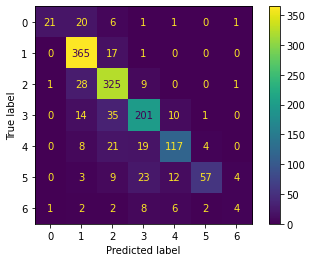

In [342]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a tfidf word frequency

In [343]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_out, y_train)

GradientBoostingClassifier()

In [344]:
y_pred_train = gbm_model.predict(X_train_combined4_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.994640605296343
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       142
           1       0.99      1.00      0.99       926
           2       0.99      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      0.99      1.00       393
           5       1.00      0.98      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [345]:
y_pred = gbm_model.predict(X_test_combined4_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7948529411764705
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.88      0.44      0.59        50
           1       0.83      0.95      0.89       383
           2       0.79      0.88      0.83       364
           3       0.77      0.75      0.76       261
           4       0.77      0.69      0.73       169
           5       0.83      0.51      0.63       108
           6       0.25      0.16      0.20        25

    accuracy                           0.79      1360
   macro avg       0.73      0.63      0.66      1360
weighted avg       0.79      0.79      0.79      1360



In [346]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [347]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.63
Precision: 0.73
F1 Score: 0.66


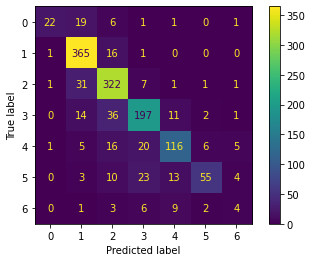

In [348]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim

In [349]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [350]:
y_pred_train = gbm_model.predict(X_train_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.794766708701135
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.72      0.84       142
           1       0.77      0.88      0.82       926
           2       0.70      0.82      0.76       861
           3       0.83      0.70      0.76       609
           4       0.94      0.70      0.81       393
           5       0.97      0.75      0.85       195
           6       1.00      1.00      1.00        46

    accuracy                           0.79      3172
   macro avg       0.89      0.80      0.83      3172
weighted avg       0.81      0.79      0.80      3172



In [351]:
y_pred = gbm_model.predict(X_test_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4051470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.27      0.06      0.10        50
           1       0.56      0.64      0.60       383
           2       0.36      0.49      0.41       364
           3       0.32      0.29      0.30       261
           4       0.32      0.24      0.28       169
           5       0.25      0.09      0.14       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.30      0.26      0.26      1360
weighted avg       0.39      0.41      0.39      1360



In [352]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [353]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.26
Precision: 0.30
F1 Score: 0.26


GRADIENT BOOSTING CLASSIFIER - so skalovanim a ngram

In [354]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scaled, y_train)

GradientBoostingClassifier()

In [355]:
y_pred_train = gbm_model.predict(X_train_combined_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8887137452711223
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89       142
           1       0.87      0.95      0.91       926
           2       0.83      0.91      0.87       861
           3       0.92      0.84      0.88       609
           4       0.97      0.80      0.88       393
           5       1.00      0.85      0.92       195
           6       1.00      1.00      1.00        46

    accuracy                           0.89      3172
   macro avg       0.94      0.88      0.91      3172
weighted avg       0.90      0.89      0.89      3172



In [356]:
y_pred = gbm_model.predict(X_test_combined_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4117647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.11      0.04      0.06        50
           1       0.59      0.68      0.63       383
           2       0.35      0.48      0.41       364
           3       0.31      0.27      0.29       261
           4       0.38      0.25      0.30       169
           5       0.23      0.08      0.12       108
           6       0.04      0.04      0.04        25

    accuracy                           0.41      1360
   macro avg       0.29      0.26      0.26      1360
weighted avg       0.39      0.41      0.39      1360



In [357]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [358]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.26
Precision: 0.29
F1 Score: 0.26


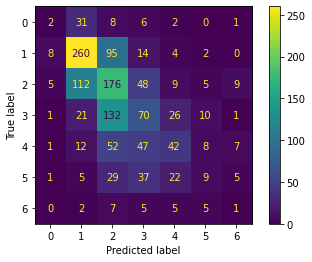

In [359]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a tfidf ngram

In [360]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scaled, y_train)

GradientBoostingClassifier()

In [361]:
y_pred_train = gbm_model.predict(X_train_combined2_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9416771752837326
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90       142
           1       0.94      0.97      0.96       926
           2       0.90      0.98      0.94       861
           3       0.95      0.94      0.95       609
           4       0.98      0.86      0.92       393
           5       0.99      0.88      0.93       195
           6       1.00      1.00      1.00        46

    accuracy                           0.94      3172
   macro avg       0.97      0.92      0.94      3172
weighted avg       0.94      0.94      0.94      3172



In [362]:
y_pred = gbm_model.predict(X_test_combined2_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4235294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.05      0.02      0.03        50
           1       0.60      0.72      0.66       383
           2       0.39      0.48      0.43       364
           3       0.30      0.25      0.28       261
           4       0.32      0.27      0.29       169
           5       0.25      0.09      0.14       108
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.27      0.26      0.26      1360
weighted avg       0.39      0.42      0.40      1360



In [363]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [364]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.26
Precision: 0.27
F1 Score: 0.26


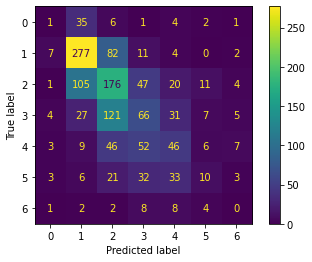

In [365]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a word frequency

In [366]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_scaled, y_train)

GradientBoostingClassifier()

In [367]:
y_pred_train = gbm_model.predict(X_train_combined3_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8880832282471627
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86       142
           1       0.87      0.97      0.91       926
           2       0.81      0.93      0.86       861
           3       0.95      0.82      0.88       609
           4       0.99      0.76      0.86       393
           5       1.00      0.88      0.93       195
           6       1.00      1.00      1.00        46

    accuracy                           0.89      3172
   macro avg       0.94      0.87      0.90      3172
weighted avg       0.90      0.89      0.89      3172



In [368]:
y_pred = gbm_model.predict(X_test_combined3_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42205882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.20      0.06      0.09        50
           1       0.58      0.68      0.62       383
           2       0.38      0.49      0.43       364
           3       0.35      0.31      0.33       261
           4       0.31      0.22      0.26       169
           5       0.28      0.11      0.16       108
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.30      0.27      0.27      1360
weighted avg       0.40      0.42      0.40      1360



In [369]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [370]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.27
Precision: 0.30
F1 Score: 0.27


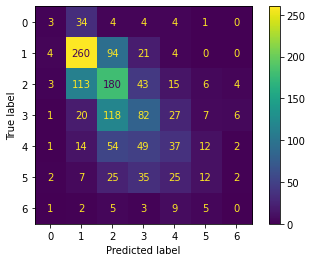

In [371]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a tfidf word frequency

In [372]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_scaled, y_train)

GradientBoostingClassifier()

In [373]:
y_pred_train = gbm_model.predict(X_train_combined4_scaled)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.935687263556116
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       142
           1       0.92      0.97      0.95       926
           2       0.90      0.96      0.93       861
           3       0.95      0.92      0.94       609
           4       0.99      0.87      0.93       393
           5       0.99      0.88      0.93       195
           6       1.00      1.00      1.00        46

    accuracy                           0.94      3172
   macro avg       0.97      0.92      0.94      3172
weighted avg       0.94      0.94      0.94      3172



In [374]:
y_pred = gbm_model.predict(X_test_combined4_scaled)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4389705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.06      0.02      0.03        50
           1       0.61      0.73      0.67       383
           2       0.40      0.52      0.45       364
           3       0.37      0.28      0.32       261
           4       0.31      0.25      0.27       169
           5       0.23      0.08      0.12       108
           6       0.00      0.00      0.00        25

    accuracy                           0.44      1360
   macro avg       0.28      0.27      0.27      1360
weighted avg       0.41      0.44      0.41      1360



In [375]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [376]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.44
Recall: 0.27
Precision: 0.28
F1 Score: 0.27


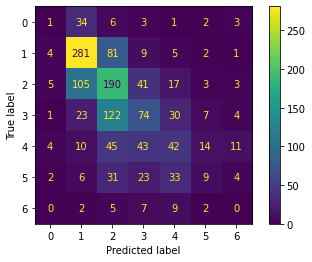

In [377]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a skalovanim

In [378]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scal_out, y_train)

GradientBoostingClassifier()

In [379]:
y_pred_train = gbm_model.predict(X_train_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.975094577553594
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       142
           1       0.97      0.99      0.98       926
           2       0.95      0.98      0.97       861
           3       0.99      0.97      0.98       609
           4       1.00      0.96      0.98       393
           5       1.00      0.95      0.97       195
           6       1.00      1.00      1.00        46

    accuracy                           0.98      3172
   macro avg       0.99      0.97      0.98      3172
weighted avg       0.98      0.98      0.98      3172



In [380]:
y_pred = gbm_model.predict(X_test_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8301470588235295
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        50
           1       0.82      0.96      0.88       383
           2       0.83      0.88      0.86       364
           3       0.85      0.82      0.83       261
           4       0.82      0.70      0.76       169
           5       0.83      0.71      0.77       108
           6       0.54      0.28      0.37        25

    accuracy                           0.83      1360
   macro avg       0.81      0.69      0.73      1360
weighted avg       0.83      0.83      0.82      1360



In [381]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [382]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.83
Recall: 0.69
Precision: 0.81
F1 Score: 0.73


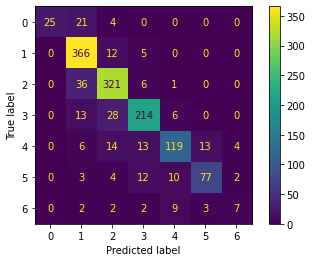

In [383]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a skalovanim a ngram

In [384]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scal_out, y_train)

GradientBoostingClassifier()

In [385]:
y_pred_train = gbm_model.predict(X_train_combined_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9832912988650694
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       142
           1       0.98      0.99      0.99       926
           2       0.96      0.99      0.98       861
           3       0.99      0.98      0.99       609
           4       1.00      0.97      0.98       393
           5       1.00      0.96      0.98       195
           6       1.00      1.00      1.00        46

    accuracy                           0.98      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.98      0.98      0.98      3172



In [386]:
y_pred = gbm_model.predict(X_test_combined_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8183823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.93      0.50      0.65        50
           1       0.84      0.95      0.89       383
           2       0.80      0.90      0.85       364
           3       0.82      0.80      0.81       261
           4       0.79      0.69      0.74       169
           5       0.85      0.61      0.71       108
           6       0.40      0.16      0.23        25

    accuracy                           0.82      1360
   macro avg       0.78      0.66      0.70      1360
weighted avg       0.82      0.82      0.81      1360



In [387]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [388]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.82
Recall: 0.66
Precision: 0.78
F1 Score: 0.70


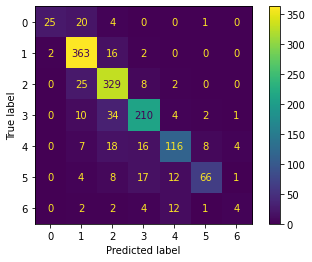

In [389]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a skalovanim a tfidf ngram

In [390]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scal_out, y_train)

GradientBoostingClassifier()

In [391]:
y_pred_train = gbm_model.predict(X_train_combined2_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9952711223203027
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       142
           1       0.99      1.00      1.00       926
           2       0.99      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       0.99      0.99      0.99       393
           5       1.00      0.98      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       1.00      1.00      1.00      3172



In [392]:
y_pred = gbm_model.predict(X_test_combined2_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7845588235294118
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.85      0.44      0.58        50
           1       0.83      0.95      0.88       383
           2       0.76      0.86      0.81       364
           3       0.78      0.75      0.77       261
           4       0.74      0.66      0.70       169
           5       0.88      0.53      0.66       108
           6       0.20      0.12      0.15        25

    accuracy                           0.78      1360
   macro avg       0.72      0.62      0.65      1360
weighted avg       0.78      0.78      0.78      1360



In [393]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [394]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.78
Recall: 0.62
Precision: 0.72
F1 Score: 0.65


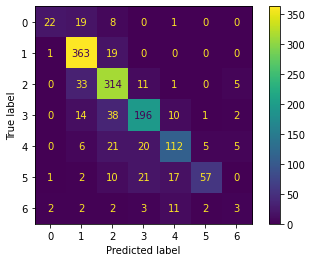

In [395]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a skalovanim a word frequency

In [396]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_scal_out, y_train)

GradientBoostingClassifier()

In [397]:
y_pred_train = gbm_model.predict(X_train_combined3_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9880201765447667
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       142
           1       0.98      1.00      0.99       926
           2       0.99      0.99      0.99       861
           3       0.99      0.99      0.99       609
           4       1.00      0.98      0.99       393
           5       1.00      0.98      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       0.99      0.98      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [398]:
y_pred = gbm_model.predict(X_test_combined3_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7977941176470589
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.92      0.44      0.59        50
           1       0.83      0.95      0.89       383
           2       0.78      0.89      0.83       364
           3       0.77      0.76      0.76       261
           4       0.79      0.68      0.73       169
           5       0.85      0.54      0.66       108
           6       0.36      0.16      0.22        25

    accuracy                           0.80      1360
   macro avg       0.76      0.63      0.67      1360
weighted avg       0.80      0.80      0.79      1360



In [399]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [400]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.80
Recall: 0.63
Precision: 0.76
F1 Score: 0.67


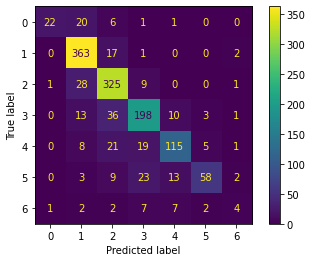

In [401]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GRADIENT BOOSTING CLASSIFIER - s ošetrenim outlierov a skalovanim a tfidf word frequency

In [402]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_scal_out, y_train)

GradientBoostingClassifier()

In [403]:
y_pred_train = gbm_model.predict(X_train_combined4_scal_out)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.994640605296343
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       142
           1       0.99      1.00      0.99       926
           2       0.99      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      0.99      1.00       393
           5       1.00      0.98      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [404]:
y_pred = gbm_model.predict(X_test_combined4_scal_out)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7963235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.85      0.44      0.58        50
           1       0.83      0.95      0.89       383
           2       0.79      0.89      0.84       364
           3       0.78      0.75      0.77       261
           4       0.76      0.69      0.72       169
           5       0.82      0.52      0.64       108
           6       0.29      0.16      0.21        25

    accuracy                           0.80      1360
   macro avg       0.73      0.63      0.66      1360
weighted avg       0.79      0.80      0.79      1360



In [405]:
results_list1_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [406]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.80
Recall: 0.63
Precision: 0.73
F1 Score: 0.66


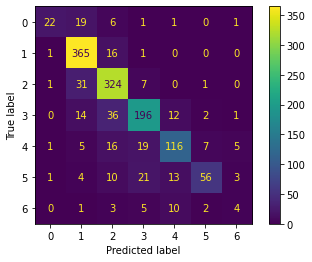

In [407]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [408]:
results_gbm1 = pd.DataFrame(results_list1_gbm)
print(results_gbm1)

    accuracy_train  accuracy_test  precision_train  precision_test  \
0         0.784048       0.412500         0.878588        0.286515   
1         0.888714       0.413971         0.940639        0.287568   
2         0.942938       0.429412         0.967722        0.280154   
3         0.885246       0.436029         0.939979        0.341496   
4         0.936318       0.422059         0.965390        0.275484   
5         0.975095       0.829412         0.986732        0.812373   
6         0.983291       0.819118         0.991154        0.780153   
7         0.995271       0.790441         0.997123        0.733561   
8         0.988020       0.801471         0.993558        0.769270   
9         0.994641       0.794853         0.997247        0.732102   
10        0.794767       0.405147         0.887610        0.297827   
11        0.888714       0.411765         0.940639        0.287621   
12        0.941677       0.423529         0.966160        0.272536   
13        0.888083  

Podľa výsledkov po prvom testovani GBM môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi a skalovaním (bez textových reprezentácií). Je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. Pri pohľade na trenovacú a testovacu accuracy to vyzerá, že model je trochu pretrénovaný, však menej ako pri random forest, to sa neskôr pokúsime zlepšiť. Tento model má zatiaľ najvyššiu presnosť.

VYBER CRT

In [409]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3172 entries, 3877 to 4122
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   average_emoji                           3172 non-null   float64
 1   average_urls                            3172 non-null   float64
 2   average_mentions                        3172 non-null   float64
 3   average_hashtags                        3172 non-null   float64
 4   average_digits                          3172 non-null   float64
 5   average_uppercase                       3172 non-null   float64
 6   average_lowercase                       3172 non-null   float64
 7   average_non_alpha                       3172 non-null   float64
 8   average_quotes_per_tweet                3172 non-null   float64
 9   average_apostrophe_per_tweet            3172 non-null   float64
 10  average_punctuation_per_tweet           3172 non-null   f

SVC - Recursive feature elimination (RFE)

In [410]:

model = SVC(kernel="linear")

# Vytvorí model RFE (Rekurzívna eliminácia prvkov) s použitím lineárneho modelu SVC
rfe = RFE(estimator=model)  # Inicializuj RFE s lineárnym modelom SVC a urč kroky pre každú iteráciu
selector = rfe.fit(X_train, y_train)  # Prispôsob model RFE

# Predpovedaj pomocou selektora RFE priamo na testovacích údajoch
predictions = selector.predict(X_test)  # Použi selektor na predpovedanie

# Vypočítaj skóre presnosti
accuracy = accuracy_score(y_test, predictions)

# Výstup vybraných prvkov a presnosti
print("Vybrané prvky:", X_train.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_svc = X_train.loc[:, selector.support_].copy()
X_test_svc = X_test.loc[:, selector.support_].copy()



Vybrané prvky: Index(['average_emoji', 'average_mentions', 'average_quotes_per_tweet',
       'average_apostrophe_per_tweet', 'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'avg_words_per_tweet', 'average_repeats_per_tweet',
       'average_conjunction_per_tweet', 'average_particle_per_tweet',
       'average_past_tense_per_tweet', 'average_present_tense_per_tweet',
       'avg_nsubj_per_tweet', 'avg_dobj_per_tweet', 'avg_advmod_per_tweet',
       'avg_amod_per_tweet', 'avg_aux_per_tweet', 'average_positive_per_tweet',
       'average_negative_per_tweet', 'average_neutral_per_tweet',
       'average_entities_per_tweet', 'average_negation_per_tweet',
       'average_cognitive_word_per_tweet', 'average_sensory_word_per_tweet'],
      dtype='object')
Skóre presnosti: 0.38529411764705884


SVC - ošetrený outlieri

In [411]:
model = SVC(kernel="linear")

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_out, y_train) 

predictions = selector.predict(X_test_out) 

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_out_svc = X_train_out.loc[:, selector.support_].copy()
X_test_out_svc = X_test_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_urls', 'average_quotes_per_tweet',
       'average_apostrophe_per_tweet',
       'average_multiple_punctuation_per_tweet', 'avg_sentences_per_tweet',
       'average_repeats_per_tweet', 'avg_commas', 'average_pronoun_per_tweet',
       'average_numeral_per_tweet', 'average_adverb_per_tweet',
       'average_preposition_per_tweet', 'average_conjunction_per_tweet',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'average_present_tense_per_tweet', 'avg_nsubj_per_tweet',
       'avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet',
       'avg_aux_per_tweet', 'average_negative_per_tweet',
       'average_negation_per_tweet', 'average_cognitive_word_per_tweet',
       'average_sensory_word_per_tweet'],
      dtype='object')
Skóre presnosti: 0.4742647058823529


SVC-scalovanie

In [412]:
model = SVC(kernel="linear")

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_scaled, y_train)  

predictions = selector.predict(X_test_scaled)  

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scaled.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scaled_svc = X_train_scaled.loc[:, selector.support_].copy()
X_test_scaled_svc = X_test_scaled.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_mentions', 'average_quotes_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'average_repeats_per_tweet', 'interrogative_percent',
       'imperative_percent', 'other_ending_percent', 'average_nouns_per_tweet',
       'average_adjective_per_tweet', 'average_pronoun_per_tweet',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'average_present_tense_per_tweet', 'avg_nsubj_per_tweet',
       'avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet',
       'avg_aux_per_tweet', 'average_negative_per_tweet',
       'average_entities_per_tweet', 'average_negation_per_tweet',
       'average_cognitive_word_per_tweet', 'average_sensory_word_per_tweet'],
      dtype='object')
Skóre presnosti: 0.375


SVC -scalovanie a ošetreny outlieri

In [413]:
model = SVC(kernel="linear")

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_scal_out, y_train) 

predictions = selector.predict(X_test_scal_out) 

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scal_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scal_out_svc = X_train_scal_out.loc[:, selector.support_].copy()
X_test_scal_out_svc = X_test_scal_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_urls', 'average_quotes_per_tweet',
       'average_apostrophe_per_tweet',
       'average_multiple_punctuation_per_tweet', 'avg_sentences_per_tweet',
       'average_repeats_per_tweet', 'avg_commas', 'average_pronoun_per_tweet',
       'average_numeral_per_tweet', 'average_adverb_per_tweet',
       'average_preposition_per_tweet', 'average_conjunction_per_tweet',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'average_present_tense_per_tweet', 'avg_nsubj_per_tweet',
       'avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet',
       'avg_aux_per_tweet', 'average_negative_per_tweet',
       'average_negation_per_tweet', 'average_cognitive_word_per_tweet',
       'average_sensory_word_per_tweet'],
      dtype='object')
Skóre presnosti: 0.4742647058823529


RANDOM FOREST - BEZ OšETRENIA OUTLIEROV A SKALOVANIA

In [414]:
model = RandomForestClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train, y_train)

predictions = selector.predict(X_test) 

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_rf = X_train.loc[:, selector.support_].copy()
X_test_rf = X_test.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_urls', 'average_mentions', 'average_hashtags',
       'average_digits', 'average_uppercase', 'average_lowercase',
       'average_non_alpha', 'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'average_repeats_per_tweet', 'vocabulary_size', 'interrogative_percent',
       'imperative_percent', 'avg_commas', 'average_nouns_per_tweet',
       'average_adverb_per_tweet', 'average_particle_per_tweet',
       'average_past_tense_per_tweet', 'average_neutral_per_tweet',
       'average_entities_per_tweet', 'average_sentiment_score',
       'average_negation_per_tweet', 'average_sensory_word_per_tweet'],
      dtype='object')
Skóre presnosti: 0.3977941176470588


RANDOM FOREST - S OšETRENIM OUTLIEROV 

In [415]:
model = RandomForestClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_out, y_train) 

predictions = selector.predict(X_test_out) 

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_out_rf = X_train_out.loc[:, selector.support_].copy()
X_test_out_rf = X_test_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_uppercase', 'average_stopwords', 'avg_chars_per_tweet',
       'declarative_percent', 'interrogative_percent', 'imperative_percent',
       'avg_commas', 'average_nouns_per_tweet', 'average_adjective_per_tweet',
       'average_verb_per_tweet', 'average_pronoun_per_tweet',
       'average_numeral_per_tweet', 'average_adverb_per_tweet',
       'average_preposition_per_tweet', 'average_conjunction_per_tweet',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'average_present_tense_per_tweet', 'avg_nsubj_per_tweet',
       'avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet',
       'avg_aux_per_tweet', 'average_neutral_per_tweet',
       'average_negation_per_tweet'],
      dtype='object')
Skóre presnosti: 0.7198529411764706


RANDOM FOREST - SKALOVANIE

In [416]:
model = RandomForestClassifier()

rfe = RFE(estimator=model)
selector = rfe.fit(X_train_scaled, y_train) 

predictions = selector.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scaled.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scaled_rf = X_train_scaled.loc[:, selector.support_].copy()
X_test_scaled_rf = X_test_scaled.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_urls', 'average_mentions', 'average_hashtags',
       'average_digits', 'average_uppercase', 'average_lowercase',
       'average_non_alpha', 'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'average_repeats_per_tweet', 'vocabulary_size', 'declarative_percent',
       'avg_commas', 'average_pronoun_per_tweet', 'average_adverb_per_tweet',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'avg_amod_per_tweet', 'average_neutral_per_tweet',
       'average_entities_per_tweet', 'average_sentiment_score',
       'average_negation_per_tweet', 'average_sensory_word_per_tweet'],
      dtype='object')
Skóre presnosti: 0.4007352941176471


RANDOM FOREST - S OšETRENIM OUTLIEROV A SKALOVANIM

In [417]:
model = RandomForestClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_scal_out, y_train)

predictions = selector.predict(X_test_scal_out) 

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scal_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scal_out_rf = X_train_scal_out.loc[:, selector.support_].copy()
X_test_scal_out_rf = X_test_scal_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_uppercase', 'average_lowercase',
       'avg_words_per_tweet', 'declarative_percent', 'interrogative_percent',
       'imperative_percent', 'avg_commas', 'average_nouns_per_tweet',
       'average_adjective_per_tweet', 'average_verb_per_tweet',
       'average_pronoun_per_tweet', 'average_numeral_per_tweet',
       'average_adverb_per_tweet', 'average_preposition_per_tweet',
       'average_conjunction_per_tweet', 'average_particle_per_tweet',
       'average_past_tense_per_tweet', 'average_present_tense_per_tweet',
       'avg_nsubj_per_tweet', 'avg_dobj_per_tweet', 'avg_advmod_per_tweet',
       'avg_amod_per_tweet', 'avg_aux_per_tweet',
       'average_negation_per_tweet'],
      dtype='object')
Skóre presnosti: 0.7198529411764706


GRADIENT BOOSTING CLASSIFIER - BEZ OšETRENIA OUTLIEROV A SKALOVANIA

In [418]:
model = GradientBoostingClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train, y_train) 

predictions = selector.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_gbm = X_train.loc[:, selector.support_].copy()
X_test_gbm = X_test.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_urls', 'average_mentions', 'average_hashtags',
       'average_digits', 'average_uppercase', 'average_lowercase',
       'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'avg_words_per_sentence', 'average_repeats_per_tweet',
       'vocabulary_size', 'imperative_percent', 'other_ending_percent',
       'avg_commas', 'average_nouns_per_tweet',
       'average_conjunction_per_tweet', 'average_particle_per_tweet',
       'average_present_tense_per_tweet', 'average_entities_per_tweet',
       'average_sentiment_score', 'average_negation_per_tweet',
       'average_cognitive_word_per_tweet', 'average_sensory_word_per_tweet'],
      dtype='object')
Skóre presnosti: 0.4007352941176471


GRADIENT BOOSTING CLASSIFIER - S OšETRENIM OUTLIEROV 

In [419]:
model = GradientBoostingClassifier()

rfe = RFE(estimator=model)
selector = rfe.fit(X_train_out, y_train)

predictions = selector.predict(X_test_out) 

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_out_gbm = X_train_out.loc[:, selector.support_].copy()
X_test_out_gbm = X_test_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_urls', 'avg_words_per_sentence',
       'declarative_percent', 'interrogative_percent', 'imperative_percent',
       'other_ending_percent', 'avg_commas', 'average_nouns_per_tweet',
       'average_adjective_per_tweet', 'average_verb_per_tweet',
       'average_pronoun_per_tweet', 'average_numeral_per_tweet',
       'average_adverb_per_tweet', 'average_preposition_per_tweet',
       'average_conjunction_per_tweet', 'average_particle_per_tweet',
       'average_interjection_per_tweet', 'average_past_tense_per_tweet',
       'average_present_tense_per_tweet', 'avg_nsubj_per_tweet',
       'avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet',
       'avg_aux_per_tweet'],
      dtype='object')
Skóre presnosti: 0.8272058823529411


GRADIENT BOOSTING CLASSIFIER - SKALOVANIE

In [420]:
model = GradientBoostingClassifier()

rfe = RFE(estimator=model) 
selector = rfe.fit(X_train_scaled, y_train)

predictions = selector.predict(X_test_scaled) 

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scaled.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scaled_gbm = X_train_scaled.loc[:, selector.support_].copy()
X_test_scaled_gbm = X_test_scaled.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_urls', 'average_mentions', 'average_hashtags',
       'average_digits', 'average_uppercase', 'average_lowercase',
       'average_punctuation_per_tweet',
       'average_multiple_punctuation_per_tweet', 'average_word_length',
       'avg_words_per_sentence', 'average_repeats_per_tweet',
       'vocabulary_size', 'imperative_percent', 'avg_commas',
       'average_nouns_per_tweet', 'average_conjunction_per_tweet',
       'average_particle_per_tweet', 'average_past_tense_per_tweet',
       'average_present_tense_per_tweet', 'average_positive_per_tweet',
       'average_entities_per_tweet', 'average_sentiment_score',
       'average_negation_per_tweet', 'average_sensory_word_per_tweet'],
      dtype='object')
Skóre presnosti: 0.4022058823529412


GRADIENT BOOSTING CLASSIFIER - S OšETRENIM OUTLIEROV A SKALOVANIM

In [421]:
model = GradientBoostingClassifier()

rfe = RFE(estimator=model)
selector = rfe.fit(X_train_scal_out, y_train)

predictions = selector.predict(X_test_scal_out)

accuracy = accuracy_score(y_test, predictions)

print("Vybrané prvky:", X_train_scal_out.columns[selector.support_])
print("Skóre presnosti:", accuracy)
X_train_scal_out_gbm = X_train_scal_out.loc[:, selector.support_].copy()
X_test_scal_out_gbm = X_test_scal_out.loc[:, selector.support_].copy()

Vybrané prvky: Index(['average_emoji', 'average_urls', 'avg_words_per_sentence',
       'declarative_percent', 'interrogative_percent', 'imperative_percent',
       'other_ending_percent', 'avg_commas', 'average_nouns_per_tweet',
       'average_adjective_per_tweet', 'average_verb_per_tweet',
       'average_pronoun_per_tweet', 'average_numeral_per_tweet',
       'average_adverb_per_tweet', 'average_preposition_per_tweet',
       'average_conjunction_per_tweet', 'average_particle_per_tweet',
       'average_interjection_per_tweet', 'average_past_tense_per_tweet',
       'average_present_tense_per_tweet', 'avg_nsubj_per_tweet',
       'avg_dobj_per_tweet', 'avg_advmod_per_tweet', 'avg_amod_per_tweet',
       'avg_aux_per_tweet'],
      dtype='object')
Skóre presnosti: 0.825


Spájanie nových datasetov s n-grammi/slovami

In [422]:

X_train_combined_svc = hstack([X_train_svc, ngram_train])
X_test_combined_svc = hstack([X_test_svc, ngram_test])
X_train_combined2_svc = hstack([X_train_svc, ngram_train_tfidf])
X_test_combined2_svc = hstack([X_test_svc, ngram_test_tfidf])
X_train_combined3_svc = hstack([X_train_svc, wfreq_train])
X_test_combined3_svc = hstack([X_test_svc, wfreq_test])
X_train_combined4_svc = hstack([X_train_svc, wfreq_train_tfidf])
X_test_combined4_svc = hstack([X_test_svc, wfreq_test_tfidf])

X_train_combined_rf = hstack([X_train_rf, ngram_train])
X_test_combined_rf = hstack([X_test_rf, ngram_test])
X_train_combined2_rf = hstack([X_train_rf, ngram_train_tfidf])
X_test_combined2_rf = hstack([X_test_rf, ngram_test_tfidf])
X_train_combined3_rf = hstack([X_train_rf, wfreq_train])
X_test_combined3_rf = hstack([X_test_rf, wfreq_test])
X_train_combined4_rf = hstack([X_train_rf, wfreq_train_tfidf])
X_test_combined4_rf = hstack([X_test_rf, wfreq_test_tfidf])

X_train_combined_gbm = hstack([X_train_gbm, ngram_train])
X_test_combined_gbm = hstack([X_test_gbm, ngram_test])
X_train_combined2_gbm = hstack([X_train_gbm, ngram_train_tfidf])
X_test_combined2_gbm = hstack([X_test_gbm, ngram_test_tfidf])
X_train_combined3_gbm = hstack([X_train_gbm, wfreq_train])
X_test_combined3_gbm = hstack([X_test_gbm, wfreq_test])
X_train_combined4_gbm = hstack([X_train_gbm, wfreq_train_tfidf])
X_test_combined4_gbm = hstack([X_test_gbm, wfreq_test_tfidf])



X_train_combined_out_svc = hstack([X_train_out_svc, ngram_train])
X_test_combined_out_svc = hstack([X_test_out_svc, ngram_test])
X_train_combined2_out_svc = hstack([X_train_out_svc, ngram_train_tfidf])
X_test_combined2_out_svc = hstack([X_test_out_svc, ngram_test_tfidf])
X_train_combined3_out_svc = hstack([X_train_out_svc, wfreq_train])
X_test_combined3_out_svc = hstack([X_test_out_svc, wfreq_test])
X_train_combined4_out_svc = hstack([X_train_out_svc, wfreq_train_tfidf])
X_test_combined4_out_svc = hstack([X_test_out_svc, wfreq_test_tfidf])

X_train_combined_out_rf = hstack([X_train_out_rf, ngram_train])
X_test_combined_out_rf = hstack([X_test_out_rf, ngram_test])
X_train_combined2_out_rf = hstack([X_train_out_rf, ngram_train_tfidf])
X_test_combined2_out_rf = hstack([X_test_out_rf, ngram_test_tfidf])
X_train_combined3_out_rf = hstack([X_train_out_rf, wfreq_train])
X_test_combined3_out_rf = hstack([X_test_out_rf, wfreq_test])
X_train_combined4_out_rf = hstack([X_train_out_rf, wfreq_train_tfidf])
X_test_combined4_out_rf = hstack([X_test_out_rf, wfreq_test_tfidf])

X_train_combined_out_gbm = hstack([X_train_out_gbm, ngram_train])
X_test_combined_out_gbm = hstack([X_test_out_gbm, ngram_test])
X_train_combined2_out_gbm = hstack([X_train_out_gbm, ngram_train_tfidf])
X_test_combined2_out_gbm = hstack([X_test_out_gbm, ngram_test_tfidf])
X_train_combined3_out_gbm = hstack([X_train_out_gbm, wfreq_train])
X_test_combined3_out_gbm = hstack([X_test_out_gbm, wfreq_test])
X_train_combined4_out_gbm = hstack([X_train_out_gbm, wfreq_train_tfidf])
X_test_combined4_out_gbm = hstack([X_test_out_gbm, wfreq_test_tfidf])




X_train_combined_scaled_svc = hstack([X_train_scaled_svc, ngram_train])
X_test_combined_scaled_svc = hstack([X_test_scaled_svc, ngram_test])
X_train_combined2_scaled_svc = hstack([X_train_scaled_svc, ngram_train_tfidf])
X_test_combined2_scaled_svc = hstack([X_test_scaled_svc, ngram_test_tfidf])
X_train_combined3_scaled_svc = hstack([X_train_scaled_svc, wfreq_train])
X_test_combined3_scaled_svc = hstack([X_test_scaled_svc, wfreq_test])
X_train_combined4_scaled_svc = hstack([X_train_scaled_svc, wfreq_train_tfidf])
X_test_combined4_scaled_svc = hstack([X_test_scaled_svc, wfreq_test_tfidf])

X_train_combined_scaled_rf = hstack([X_train_scaled_rf, ngram_train])
X_test_combined_scaled_rf = hstack([X_test_scaled_rf, ngram_test])
X_train_combined2_scaled_rf = hstack([X_train_scaled_rf, ngram_train_tfidf])
X_test_combined2_scaled_rf = hstack([X_test_scaled_rf, ngram_test_tfidf])
X_train_combined3_scaled_rf = hstack([X_train_scaled_rf, wfreq_train])
X_test_combined3_scaled_rf = hstack([X_test_scaled_rf, wfreq_test])
X_train_combined4_scaled_rf = hstack([X_train_scaled_rf, wfreq_train_tfidf])
X_test_combined4_scaled_rf = hstack([X_test_scaled_rf, wfreq_test_tfidf])

X_train_combined_scaled_gbm = hstack([X_train_scaled_gbm, ngram_train])
X_test_combined_scaled_gbm = hstack([X_test_scaled_gbm, ngram_test])
X_train_combined2_scaled_gbm = hstack([X_train_scaled_gbm, ngram_train_tfidf])
X_test_combined2_scaled_gbm = hstack([X_test_scaled_gbm, ngram_test_tfidf])
X_train_combined3_scaled_gbm = hstack([X_train_scaled_gbm, wfreq_train])
X_test_combined3_scaled_gbm = hstack([X_test_scaled_gbm, wfreq_test])
X_train_combined4_scaled_gbm = hstack([X_train_scaled_gbm, wfreq_train_tfidf])
X_test_combined4_scaled_gbm = hstack([X_test_scaled_gbm, wfreq_test_tfidf])




X_train_combined_scal_out_svc = hstack([X_train_scal_out_svc, ngram_train])
X_test_combined_scal_out_svc = hstack([X_test_scal_out_svc, ngram_test])
X_train_combined2_scal_out_svc = hstack([X_train_scal_out_svc, ngram_train_tfidf])
X_test_combined2_scal_out_svc = hstack([X_test_scal_out_svc, ngram_test_tfidf])
X_train_combined3_scal_out_svc = hstack([X_train_scal_out_svc, wfreq_train])
X_test_combined3_scal_out_svc = hstack([X_test_scal_out_svc, wfreq_test])
X_train_combined4_scal_out_svc = hstack([X_train_scal_out_svc, wfreq_train_tfidf])
X_test_combined4_scal_out_svc = hstack([X_test_scal_out_svc, wfreq_test_tfidf])

X_train_combined_scal_out_rf = hstack([X_train_scal_out_rf, ngram_train])
X_test_combined_scal_out_rf = hstack([X_test_scal_out_rf, ngram_test])
X_train_combined2_scal_out_rf = hstack([X_train_scal_out_rf, ngram_train_tfidf])
X_test_combined2_scal_out_rf = hstack([X_test_scal_out_rf, ngram_test_tfidf])
X_train_combined3_scal_out_rf = hstack([X_train_scal_out_rf, wfreq_train])
X_test_combined3_scal_out_rf = hstack([X_test_scal_out_rf, wfreq_test])
X_train_combined4_scal_out_rf = hstack([X_train_scal_out_rf, wfreq_train_tfidf])
X_test_combined4_scal_out_rf = hstack([X_test_scal_out_rf, wfreq_test_tfidf])

X_train_combined_scal_out_gbm = hstack([X_train_scal_out_gbm, ngram_train])
X_test_combined_scal_out_gbm = hstack([X_test_scal_out_gbm, ngram_test])
X_train_combined2_scal_out_gbm = hstack([X_train_scal_out_gbm, ngram_train_tfidf])
X_test_combined2_scal_out_gbm = hstack([X_test_scal_out_gbm, ngram_test_tfidf])
X_train_combined3_scal_out_gbm = hstack([X_train_scal_out_gbm, wfreq_train])
X_test_combined3_scal_out_gbm = hstack([X_test_scal_out_gbm, wfreq_test])
X_train_combined4_scal_out_gbm = hstack([X_train_scal_out_gbm, wfreq_train_tfidf])
X_test_combined4_scal_out_gbm = hstack([X_test_scal_out_gbm, wfreq_test_tfidf])


TRENOVANIE - s vyberom crt

Následne som urobila druhý test, pričom som pre každý model a zároveň každý typ datasetu urobila výber črt vyššie. Tie som používala na trenovanie datasetov. Výber črt som robila RFE metodou a mojím hlavným cieľom bolo týmto zvýšiť accuracy. Inak som postupovala rovnako ako pri prvom testovaní.

In [423]:
results_list2_svc=[]

SVC - Bez ošetrenia outlierov a bez skalovania

Trenovanie modelu

In [424]:
svc_model = SVC()
svc_model.fit(X_train_svc, y_train)

SVC()

Predikovanie na trenovacich datach

In [425]:
y_pred_train = svc_model.predict(X_train_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3802017654476671
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.47      0.71      0.56       926
           2       0.32      0.53      0.40       861
           3       0.28      0.12      0.17       609
           4       0.36      0.05      0.09       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.38      3172
   macro avg       0.20      0.20      0.17      3172
weighted avg       0.32      0.38      0.32      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predikovanie na testovacich datach

In [426]:
y_pred = svc_model.predict(X_test_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.45      0.66      0.53       383
           2       0.29      0.51      0.37       364
           3       0.23      0.10      0.14       261
           4       0.41      0.10      0.16       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.20      0.20      0.17      1360
weighted avg       0.30      0.35      0.30      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [427]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Zobrazenie metrik

In [428]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.3f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.354
Recall: 0.20
Precision: 0.20
F1 Score: 0.17


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

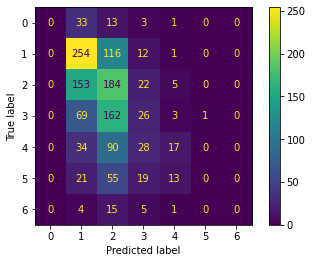

In [429]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S n-gram

In [430]:
svc_model = SVC()
svc_model.fit(X_train_combined_svc, y_train)

SVC()

In [431]:
y_pred_train = svc_model.predict(X_train_combined_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4542875157629256
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.55      0.74      0.63       926
           2       0.37      0.61      0.46       861
           3       0.44      0.22      0.29       609
           4       0.47      0.24      0.32       393
           5       0.73      0.06      0.10       195
           6       1.00      0.02      0.04        46

    accuracy                           0.45      3172
   macro avg       0.51      0.27      0.26      3172
weighted avg       0.46      0.45      0.41      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [432]:
y_pred = svc_model.predict(X_test_combined_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.53      0.70      0.61       383
           2       0.34      0.59      0.43       364
           3       0.29      0.14      0.19       261
           4       0.37      0.20      0.26       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.22      0.23      0.21      1360
weighted avg       0.34      0.41      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [433]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [434]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.22
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


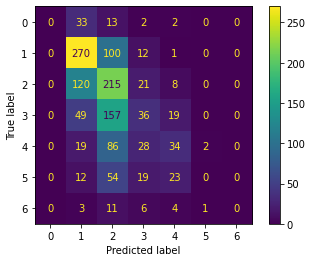

In [435]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S n-gram tfidf

In [436]:
svc_model = SVC()
svc_model.fit(X_train_combined2_svc, y_train)

SVC()

In [437]:
y_pred_train = svc_model.predict(X_train_combined2_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3802017654476671
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.46      0.71      0.56       926
           2       0.32      0.53      0.40       861
           3       0.29      0.14      0.19       609
           4       0.29      0.03      0.05       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.38      3172
   macro avg       0.19      0.20      0.17      3172
weighted avg       0.31      0.38      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [438]:
y_pred = svc_model.predict(X_test_combined2_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.44      0.66      0.53       383
           2       0.29      0.52      0.37       364
           3       0.19      0.09      0.12       261
           4       0.46      0.07      0.11       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.20      0.19      0.16      1360
weighted avg       0.30      0.35      0.29      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [439]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [440]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.35
Recall: 0.19
Precision: 0.20
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


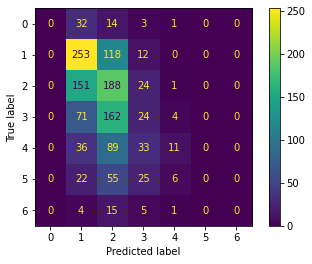

In [441]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S word frequency

In [442]:
svc_model = SVC()
svc_model.fit(X_train_combined3_svc, y_train)

SVC()

In [443]:
y_pred_train = svc_model.predict(X_train_combined3_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.47383354350567464
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.56      0.75      0.64       926
           2       0.38      0.62      0.47       861
           3       0.48      0.25      0.33       609
           4       0.54      0.27      0.36       393
           5       0.88      0.07      0.13       195
           6       1.00      0.04      0.08        46

    accuracy                           0.47      3172
   macro avg       0.55      0.29      0.29      3172
weighted avg       0.49      0.47      0.43      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [444]:
y_pred = svc_model.predict(X_test_combined3_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.52      0.72      0.60       383
           2       0.33      0.55      0.41       364
           3       0.27      0.13      0.18       261
           4       0.35      0.20      0.26       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.21      0.23      0.21      1360
weighted avg       0.33      0.40      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [445]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [446]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.21
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


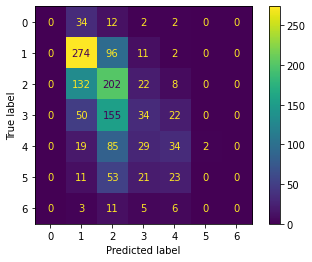

In [447]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S tfidf word frequency

In [448]:
svc_model = SVC()
svc_model.fit(X_train_combined4_svc, y_train)

SVC()

In [449]:
y_pred_train = svc_model.predict(X_train_combined4_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3802017654476671
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.46      0.70      0.56       926
           2       0.32      0.53      0.40       861
           3       0.30      0.14      0.19       609
           4       0.29      0.03      0.05       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.38      3172
   macro avg       0.20      0.20      0.17      3172
weighted avg       0.31      0.38      0.31      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [450]:
y_pred = svc_model.predict(X_test_combined4_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.45      0.66      0.53       383
           2       0.29      0.52      0.37       364
           3       0.19      0.09      0.12       261
           4       0.46      0.07      0.11       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.20      0.19      0.16      1360
weighted avg       0.30      0.35      0.29      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [451]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [452]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.35
Recall: 0.19
Precision: 0.20
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


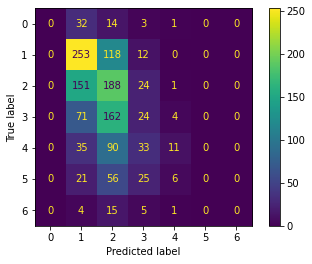

In [453]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov

In [454]:
svc_model = SVC()
svc_model.fit(X_train_out_svc, y_train)

SVC()

In [455]:
y_pred_train = svc_model.predict(X_train_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.59      0.76      0.67       926
           2       0.44      0.58      0.50       861
           3       0.43      0.37      0.40       609
           4       0.50      0.41      0.45       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.50      3172
   macro avg       0.28      0.30      0.29      3172
weighted avg       0.44      0.50      0.46      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [456]:
y_pred = svc_model.predict(X_test_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.59      0.76      0.67       383
           2       0.43      0.58      0.50       364
           3       0.36      0.34      0.35       261
           4       0.44      0.33      0.38       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.48      1360
   macro avg       0.26      0.29      0.27      1360
weighted avg       0.41      0.48      0.44      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [457]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [458]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.48
Recall: 0.29
Precision: 0.26
F1 Score: 0.27


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


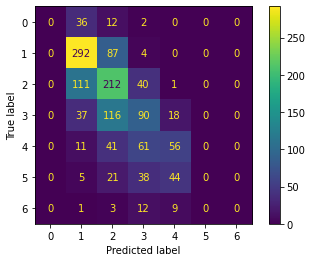

In [459]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov a n-gram

In [460]:
svc_model = SVC()
svc_model.fit(X_train_combined_out_svc, y_train)

SVC()

In [461]:
y_pred_train = svc_model.predict(X_train_combined_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.55      0.74      0.63       926
           2       0.37      0.61      0.46       861
           3       0.44      0.22      0.29       609
           4       0.47      0.24      0.32       393
           5       0.71      0.05      0.10       195
           6       1.00      0.02      0.04        46

    accuracy                           0.45      3172
   macro avg       0.51      0.27      0.26      3172
weighted avg       0.46      0.45      0.41      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [462]:
y_pred = svc_model.predict(X_test_combined_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.53      0.70      0.61       383
           2       0.34      0.59      0.43       364
           3       0.29      0.14      0.19       261
           4       0.37      0.20      0.26       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.22      0.23      0.21      1360
weighted avg       0.34      0.41      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [463]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [464]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.22
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


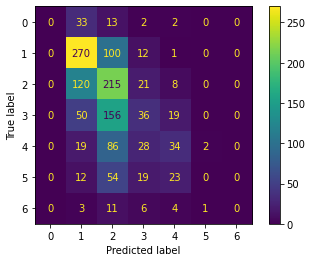

In [465]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov a tfidf n-gram

In [466]:
svc_model = SVC()
svc_model.fit(X_train_combined2_out_svc, y_train)

SVC()

In [467]:
y_pred_train = svc_model.predict(X_train_combined2_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.61      0.77      0.68       926
           2       0.43      0.59      0.50       861
           3       0.41      0.35      0.38       609
           4       0.50      0.38      0.43       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.50      3172
   macro avg       0.28      0.30      0.28      3172
weighted avg       0.44      0.50      0.46      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [468]:
y_pred = svc_model.predict(X_test_combined2_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.61      0.78      0.69       383
           2       0.44      0.60      0.51       364
           3       0.38      0.36      0.37       261
           4       0.43      0.33      0.37       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.49      1360
   macro avg       0.27      0.30      0.28      1360
weighted avg       0.42      0.49      0.45      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [469]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [470]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.49
Recall: 0.30
Precision: 0.27
F1 Score: 0.28


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


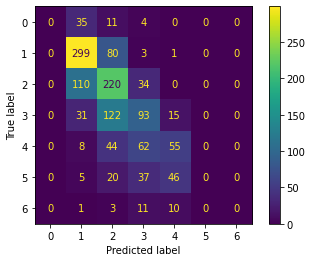

In [471]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov a word frequency

In [472]:
svc_model = SVC()
svc_model.fit(X_train_combined3_out_svc, y_train)

SVC()

In [473]:
y_pred_train = svc_model.predict(X_train_combined3_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.56      0.75      0.64       926
           2       0.38      0.62      0.47       861
           3       0.48      0.25      0.33       609
           4       0.54      0.27      0.36       393
           5       0.88      0.07      0.13       195
           6       1.00      0.04      0.08        46

    accuracy                           0.47      3172
   macro avg       0.55      0.29      0.29      3172
weighted avg       0.49      0.47      0.43      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [474]:
y_pred = svc_model.predict(X_test_combined3_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.52      0.72      0.60       383
           2       0.33      0.55      0.41       364
           3       0.27      0.13      0.18       261
           4       0.35      0.20      0.26       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.21      0.23      0.21      1360
weighted avg       0.33      0.40      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [475]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [476]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.21
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


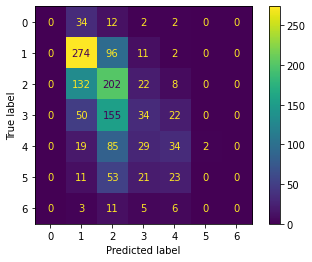

In [477]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrenim outlierov a tfidf word frequency

In [478]:
svc_model = SVC()
svc_model.fit(X_train_combined4_out_svc, y_train)

SVC()

In [479]:
y_pred_train = svc_model.predict(X_train_combined4_out_svc)
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.61      0.77      0.68       926
           2       0.44      0.60      0.51       861
           3       0.41      0.35      0.38       609
           4       0.50      0.39      0.44       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.50      3172
   macro avg       0.28      0.30      0.29      3172
weighted avg       0.44      0.50      0.46      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [480]:
y_pred = svc_model.predict(X_test_combined4_out_svc)
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.61      0.77      0.68       383
           2       0.44      0.62      0.51       364
           3       0.39      0.36      0.38       261
           4       0.43      0.33      0.37       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.49      1360
   macro avg       0.27      0.30      0.28      1360
weighted avg       0.42      0.49      0.45      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [481]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [482]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.49
Recall: 0.30
Precision: 0.27
F1 Score: 0.28


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


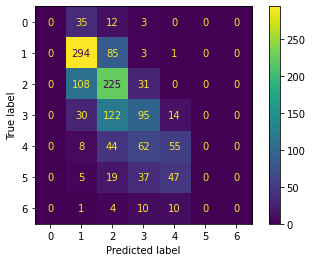

In [483]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním

In [484]:
svc_model = SVC()
svc_model.fit(X_train_scaled_svc, y_train)

SVC()

In [485]:
y_pred_train = svc_model.predict(X_train_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3682219419924338
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.44      0.77      0.56       926
           2       0.31      0.41      0.35       861
           3       0.26      0.17      0.20       609
           4       0.50      0.00      0.01       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.37      3172
   macro avg       0.21      0.19      0.16      3172
weighted avg       0.32      0.37      0.30      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [486]:
y_pred = svc_model.predict(X_test_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3602941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.45      0.79      0.57       383
           2       0.30      0.41      0.34       364
           3       0.21      0.15      0.18       261
           4       0.00      0.00      0.00       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.36      1360
   macro avg       0.14      0.19      0.16      1360
weighted avg       0.25      0.36      0.29      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [487]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [488]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.36
Recall: 0.19
Precision: 0.14
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


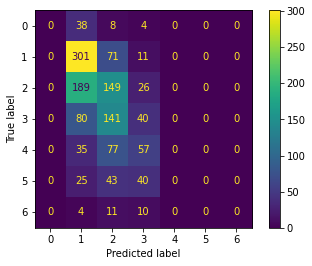

In [489]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním a n-grammi

In [490]:
svc_model = SVC()
svc_model.fit(X_train_combined_scaled_svc, y_train)

SVC()

In [491]:
y_pred_train = svc_model.predict(X_train_combined_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.45397225725094575
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.55      0.74      0.63       926
           2       0.37      0.61      0.46       861
           3       0.44      0.22      0.29       609
           4       0.47      0.24      0.32       393
           5       0.71      0.05      0.10       195
           6       1.00      0.02      0.04        46

    accuracy                           0.45      3172
   macro avg       0.51      0.27      0.26      3172
weighted avg       0.46      0.45      0.41      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [492]:
y_pred = svc_model.predict(X_test_combined_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4073529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.53      0.70      0.61       383
           2       0.34      0.59      0.43       364
           3       0.29      0.14      0.19       261
           4       0.37      0.20      0.26       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.22      0.23      0.21      1360
weighted avg       0.34      0.41      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [493]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [494]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.22
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


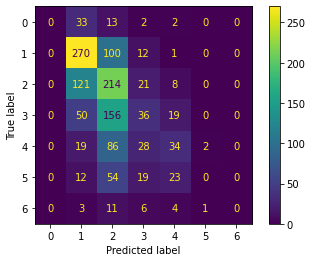

In [495]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním a tfidf n-gram

In [496]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scaled_svc, y_train)

SVC()

In [497]:
y_pred_train = svc_model.predict(X_train_combined2_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3871374527112232
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.48      0.76      0.59       926
           2       0.32      0.49      0.39       861
           3       0.25      0.17      0.21       609
           4       0.50      0.00      0.01       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.39      3172
   macro avg       0.22      0.20      0.17      3172
weighted avg       0.34      0.39      0.32      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [498]:
y_pred = svc_model.predict(X_test_combined2_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3735294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.49      0.77      0.60       383
           2       0.30      0.48      0.37       364
           3       0.20      0.15      0.17       261
           4       0.00      0.00      0.00       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.37      1360
   macro avg       0.14      0.20      0.16      1360
weighted avg       0.26      0.37      0.30      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [499]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [500]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.37
Recall: 0.20
Precision: 0.14
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


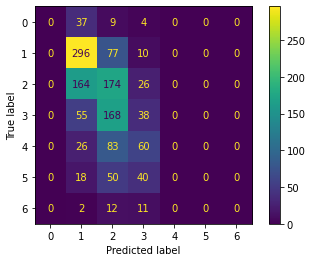

In [501]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním a word frequency

In [502]:
svc_model = SVC()
svc_model.fit(X_train_combined3_scaled_svc, y_train)

SVC()

In [503]:
y_pred_train = svc_model.predict(X_train_combined3_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4735182849936948
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.56      0.75      0.64       926
           2       0.38      0.62      0.47       861
           3       0.48      0.25      0.33       609
           4       0.54      0.27      0.36       393
           5       0.88      0.07      0.13       195
           6       1.00      0.04      0.08        46

    accuracy                           0.47      3172
   macro avg       0.55      0.29      0.29      3172
weighted avg       0.49      0.47      0.43      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [504]:
y_pred = svc_model.predict(X_test_combined3_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.52      0.72      0.60       383
           2       0.33      0.55      0.41       364
           3       0.27      0.13      0.18       261
           4       0.35      0.20      0.26       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.21      0.23      0.21      1360
weighted avg       0.33      0.40      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [505]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [506]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.21
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


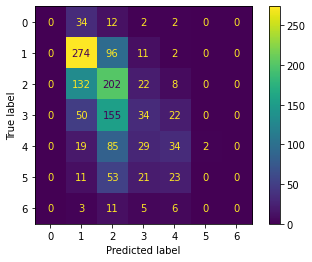

In [507]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - So škálovaním a tfidf word frequency

In [508]:
svc_model = SVC()
svc_model.fit(X_train_combined4_scaled_svc, y_train)

SVC()

In [509]:
y_pred_train = svc_model.predict(X_train_combined4_scaled_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.3896595208070618
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.48      0.77      0.59       926
           2       0.33      0.48      0.39       861
           3       0.26      0.18      0.21       609
           4       0.00      0.00      0.00       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.39      3172
   macro avg       0.15      0.20      0.17      3172
weighted avg       0.28      0.39      0.32      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [510]:
y_pred = svc_model.predict(X_test_combined4_scaled_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.37279411764705883
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.49      0.78      0.60       383
           2       0.30      0.47      0.37       364
           3       0.20      0.15      0.17       261
           4       0.00      0.00      0.00       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.37      1360
   macro avg       0.14      0.20      0.16      1360
weighted avg       0.26      0.37      0.30      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [511]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [512]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.37
Recall: 0.20
Precision: 0.14
F1 Score: 0.16


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


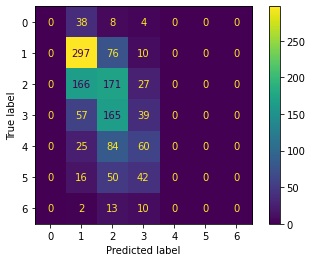

In [513]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním

In [514]:
svc_model = SVC()
svc_model.fit(X_train_scal_out_svc, y_train)

SVC()

In [515]:
y_pred_train = svc_model.predict(X_train_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.5015762925598991
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.59      0.76      0.67       926
           2       0.44      0.58      0.50       861
           3       0.43      0.37      0.40       609
           4       0.50      0.41      0.45       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.50      3172
   macro avg       0.28      0.30      0.29      3172
weighted avg       0.44      0.50      0.46      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [516]:
y_pred = svc_model.predict(X_test_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.47794117647058826
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.59      0.76      0.67       383
           2       0.43      0.58      0.50       364
           3       0.36      0.34      0.35       261
           4       0.44      0.33      0.38       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.48      1360
   macro avg       0.26      0.29      0.27      1360
weighted avg       0.41      0.48      0.44      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [517]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [518]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.48
Recall: 0.29
Precision: 0.26
F1 Score: 0.27


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


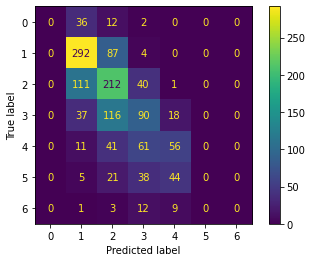

In [519]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním a s n-gram

In [520]:
svc_model = SVC()
svc_model.fit(X_train_combined_scal_out_svc, y_train)

SVC()

In [521]:
y_pred_train = svc_model.predict(X_train_combined_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.45397225725094575
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.55      0.74      0.63       926
           2       0.37      0.61      0.46       861
           3       0.44      0.22      0.29       609
           4       0.47      0.24      0.32       393
           5       0.71      0.05      0.10       195
           6       1.00      0.02      0.04        46

    accuracy                           0.45      3172
   macro avg       0.51      0.27      0.26      3172
weighted avg       0.46      0.45      0.41      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [522]:
y_pred = svc_model.predict(X_test_combined_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40808823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.53      0.70      0.61       383
           2       0.34      0.59      0.43       364
           3       0.29      0.14      0.19       261
           4       0.37      0.20      0.26       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.22      0.23      0.21      1360
weighted avg       0.34      0.41      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [523]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [524]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.23
Precision: 0.22
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


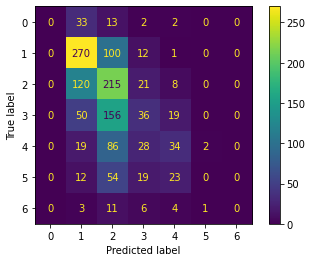

In [525]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním a s tfidf n-gram

In [526]:
svc_model = SVC()
svc_model.fit(X_train_combined2_scal_out_svc, y_train)

SVC()

In [527]:
y_pred_train = svc_model.predict(X_train_combined2_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.49968474148802017
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.61      0.77      0.68       926
           2       0.43      0.59      0.50       861
           3       0.41      0.35      0.38       609
           4       0.50      0.38      0.43       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.50      3172
   macro avg       0.28      0.30      0.28      3172
weighted avg       0.44      0.50      0.46      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [528]:
y_pred = svc_model.predict(X_test_combined2_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4904411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.61      0.78      0.69       383
           2       0.44      0.60      0.51       364
           3       0.38      0.36      0.37       261
           4       0.43      0.33      0.37       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.49      1360
   macro avg       0.27      0.30      0.28      1360
weighted avg       0.42      0.49      0.45      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [529]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [530]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.49
Recall: 0.30
Precision: 0.27
F1 Score: 0.28


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


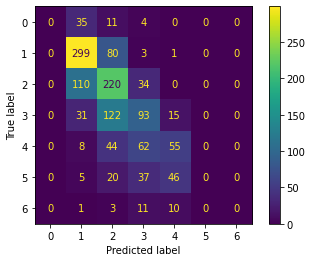

In [531]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním a s word frequency

In [532]:
svc_model = SVC()
svc_model.fit(X_train_combined3_scal_out_svc, y_train)

SVC()

In [533]:
y_pred_train = svc_model.predict(X_train_combined3_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4735182849936948
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.56      0.75      0.64       926
           2       0.38      0.62      0.47       861
           3       0.48      0.25      0.33       609
           4       0.54      0.27      0.36       393
           5       0.88      0.07      0.13       195
           6       1.00      0.04      0.08        46

    accuracy                           0.47      3172
   macro avg       0.55      0.29      0.29      3172
weighted avg       0.49      0.47      0.43      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [534]:
y_pred = svc_model.predict(X_test_combined3_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.52      0.72      0.60       383
           2       0.33      0.55      0.41       364
           3       0.27      0.13      0.18       261
           4       0.35      0.20      0.26       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.21      0.23      0.21      1360
weighted avg       0.33      0.40      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [535]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [536]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.21
F1 Score: 0.21


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


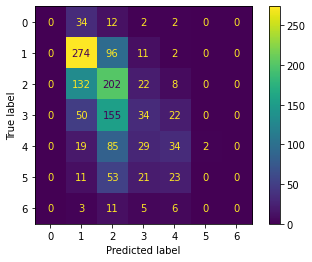

In [537]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

SVC - S ošetrením outlierov a so škálovaním a s tfidf word frequency

In [538]:
svc_model = SVC()
svc_model.fit(X_train_combined4_scal_out_svc, y_train)

SVC()

In [539]:
y_pred_train = svc_model.predict(X_train_combined4_scal_out_svc)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.5028373266078184
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.61      0.77      0.68       926
           2       0.44      0.60      0.51       861
           3       0.41      0.35      0.38       609
           4       0.50      0.39      0.44       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.50      3172
   macro avg       0.28      0.30      0.29      3172
weighted avg       0.44      0.50      0.46      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [540]:
y_pred = svc_model.predict(X_test_combined4_scal_out_svc)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4919117647058823
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.61      0.77      0.68       383
           2       0.44      0.62      0.51       364
           3       0.39      0.36      0.38       261
           4       0.43      0.33      0.37       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.49      1360
   macro avg       0.27      0.30      0.28      1360
weighted avg       0.42      0.49      0.45      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [541]:
results_list2_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [542]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.49
Recall: 0.30
Precision: 0.27
F1 Score: 0.28


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


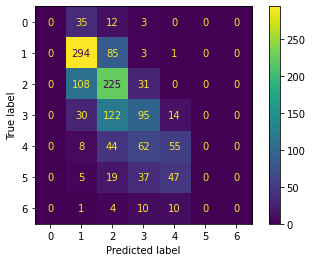

In [543]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [544]:
results_svc2 = pd.DataFrame(results_list2_svc)
print(results_svc2)

    accuracy_train  accuracy_test  precision_train  precision_test  \
0         0.380202       0.353676         0.202892        0.196810   
1         0.454288       0.408088         0.508908        0.219371   
2         0.380202       0.350000         0.194931        0.198106   
3         0.473834       0.400000         0.547967        0.211086   
4         0.380202       0.350000         0.195258        0.198200   
5         0.501576       0.477941         0.280318        0.260723   
6         0.453972       0.408088         0.505843        0.219297   
7         0.499685       0.490441         0.278290        0.266524   
8         0.473518       0.400000         0.547877        0.211086   
9         0.502837       0.491912         0.280757        0.268400   
10        0.368222       0.360294         0.214714        0.136955   
11        0.453972       0.407353         0.505843        0.218998   
12        0.387137       0.373529         0.222616        0.142815   
13        0.473518  

Podľa výsledkov po druhom testovani svc môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi a škálovaním a tfidf frekvenciou slov. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. V porovnaní s prvým textom sa accuracy mierne zvýšilo.

RANDOM FOREST - Bez ošetrenia outlierov a bez skalovania

In [545]:
results_list2_rf=[]

Trenovanie modelu

In [546]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_rf, y_train)

RandomForestClassifier()

Predikovanie na trenovacich datach

In [547]:
y_pred_train = rf_model.predict(X_train_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



Predikovanie na testovacich datach

In [548]:
y_pred = rf_model.predict(X_test_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.39926470588235297
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.54      0.64      0.59       383
           2       0.35      0.49      0.41       364
           3       0.29      0.28      0.29       261
           4       0.32      0.23      0.27       169
           5       0.21      0.06      0.09       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.39      0.25      0.24      1360
weighted avg       0.40      0.40      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [549]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Zobrazenie metrik

In [550]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.25
Precision: 0.39
F1 Score: 0.24


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

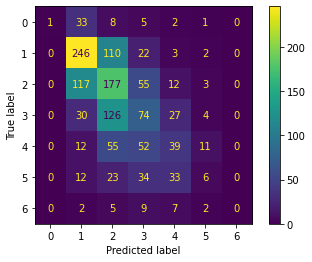

In [551]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S n-gram

In [552]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_rf, y_train)

RandomForestClassifier()

In [553]:
y_pred_train = rf_model.predict(X_train_combined_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [554]:
y_pred = rf_model.predict(X_test_combined_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.39558823529411763
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.53      0.67      0.59       383
           2       0.34      0.51      0.41       364
           3       0.27      0.21      0.24       261
           4       0.32      0.22      0.26       169
           5       0.20      0.02      0.03       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.24      0.23      0.22      1360
weighted avg       0.35      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [555]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [556]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.24
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


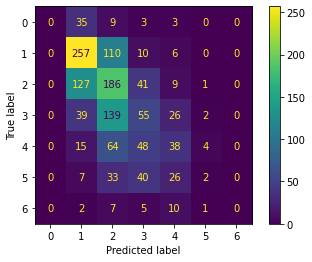

In [557]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S n-gram tfidf

In [558]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_rf, y_train)

RandomForestClassifier()

In [559]:
y_pred_train = rf_model.predict(X_train_combined2_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [560]:
y_pred = rf_model.predict(X_test_combined2_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4073529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.51      0.71      0.59       383
           2       0.35      0.49      0.41       364
           3       0.30      0.22      0.26       261
           4       0.36      0.24      0.29       169
           5       0.33      0.04      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.27      0.24      0.23      1360
weighted avg       0.37      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [561]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [562]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.27
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


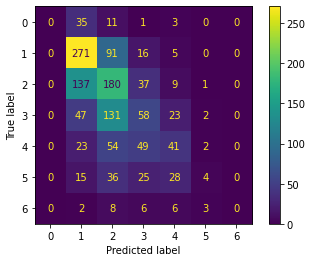

In [563]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S word frequency

In [564]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_rf, y_train)

RandomForestClassifier()

In [565]:
y_pred_train = rf_model.predict(X_train_combined3_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [566]:
y_pred = rf_model.predict(X_test_combined3_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.54      0.69      0.61       383
           2       0.34      0.51      0.41       364
           3       0.28      0.22      0.24       261
           4       0.30      0.17      0.22       169
           5       0.45      0.05      0.08       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.27      0.23      0.22      1360
weighted avg       0.37      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [567]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [568]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.27
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


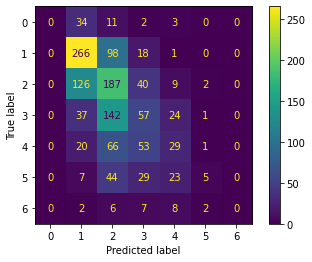

In [569]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S tfidf word frequency

In [570]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_rf, y_train)

RandomForestClassifier()

In [571]:
y_pred_train = rf_model.predict(X_train_combined4_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [572]:
y_pred = rf_model.predict(X_test_combined4_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40441176470588236
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.52      0.72      0.60       383
           2       0.34      0.48      0.40       364
           3       0.28      0.22      0.25       261
           4       0.38      0.23      0.29       169
           5       0.31      0.04      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.26      0.24      0.23      1360
weighted avg       0.36      0.40      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [573]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [574]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.24
Precision: 0.26
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


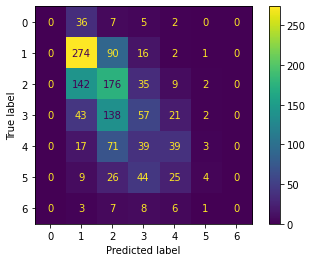

In [575]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov

In [576]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_out_rf, y_train)

RandomForestClassifier()

In [577]:
y_pred_train = rf_model.predict(X_train_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [578]:
y_pred = rf_model.predict(X_test_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7102941176470589
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.14      0.25        50
           1       0.74      0.92      0.82       383
           2       0.67      0.82      0.74       364
           3       0.72      0.67      0.69       261
           4       0.68      0.57      0.62       169
           5       0.80      0.34      0.48       108
           6       1.00      0.04      0.08        25

    accuracy                           0.71      1360
   macro avg       0.80      0.50      0.52      1360
weighted avg       0.73      0.71      0.69      1360



In [579]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [580]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.71
Recall: 0.50
Precision: 0.80
F1 Score: 0.52


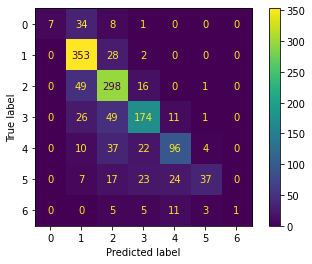

In [581]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov a n-gram

In [582]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_out_rf, y_train)

RandomForestClassifier()

In [583]:
y_pred_train = rf_model.predict(X_train_combined_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [584]:
y_pred = rf_model.predict(X_test_combined_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.6080882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.68      0.89      0.77       383
           2       0.58      0.77      0.66       364
           3       0.56      0.50      0.53       261
           4       0.51      0.41      0.46       169
           5       0.67      0.07      0.13       108
           6       0.00      0.00      0.00        25

    accuracy                           0.61      1360
   macro avg       0.43      0.38      0.36      1360
weighted avg       0.57      0.61      0.56      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [585]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [586]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.61
Recall: 0.38
Precision: 0.43
F1 Score: 0.36


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


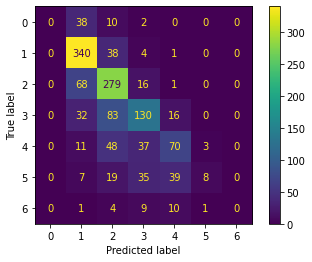

In [587]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov a tfidf n-gram

In [588]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_out_rf, y_train)

RandomForestClassifier()

In [589]:
y_pred_train = rf_model.predict(X_train_combined2_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [590]:
y_pred = rf_model.predict(X_test_combined2_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5176470588235295
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.61      0.87      0.72       383
           2       0.45      0.63      0.52       364
           3       0.45      0.34      0.39       261
           4       0.49      0.30      0.37       169
           5       0.62      0.05      0.09       108
           6       0.00      0.00      0.00        25

    accuracy                           0.52      1360
   macro avg       0.37      0.31      0.30      1360
weighted avg       0.49      0.52      0.47      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [591]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [592]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.52
Recall: 0.31
Precision: 0.37
F1 Score: 0.30


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


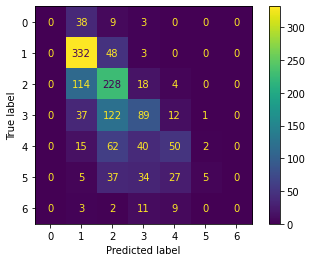

In [593]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov a word frequency

In [594]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_out_rf, y_train)

RandomForestClassifier()

In [595]:
y_pred_train = rf_model.predict(X_train_combined3_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [596]:
y_pred = rf_model.predict(X_test_combined3_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5080882352941176
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.63      0.81      0.71       383
           2       0.44      0.65      0.53       364
           3       0.43      0.36      0.39       261
           4       0.44      0.28      0.34       169
           5       0.40      0.04      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.51      1360
   macro avg       0.33      0.30      0.29      1360
weighted avg       0.46      0.51      0.46      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [597]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [598]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.51
Recall: 0.30
Precision: 0.33
F1 Score: 0.29


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


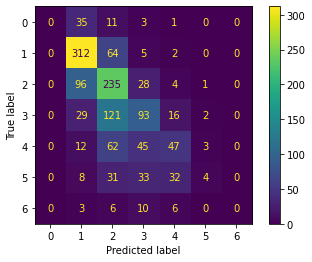

In [599]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrenim outlierov a tfidf word frequency

In [600]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_out_rf, y_train)

RandomForestClassifier()

In [601]:
y_pred_train = rf_model.predict(X_train_combined4_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [602]:
y_pred = rf_model.predict(X_test_combined4_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5117647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.62      0.88      0.72       383
           2       0.47      0.61      0.53       364
           3       0.41      0.33      0.36       261
           4       0.42      0.28      0.34       169
           5       0.27      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.51      1360
   macro avg       0.31      0.30      0.29      1360
weighted avg       0.45      0.51      0.46      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [603]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [604]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.51
Recall: 0.30
Precision: 0.31
F1 Score: 0.29


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


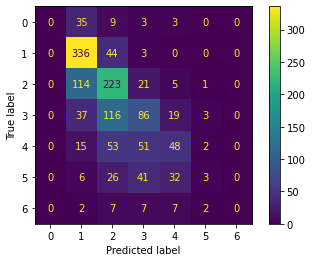

In [605]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním

In [606]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled_rf, y_train)

RandomForestClassifier()

In [607]:
y_pred_train = rf_model.predict(X_train_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [608]:
y_pred = rf_model.predict(X_test_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40588235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.56      0.67      0.61       383
           2       0.35      0.47      0.40       364
           3       0.29      0.28      0.28       261
           4       0.33      0.27      0.29       169
           5       0.30      0.06      0.11       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.40      0.25      0.25      1360
weighted avg       0.41      0.41      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [609]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [610]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.25
Precision: 0.40
F1 Score: 0.25


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


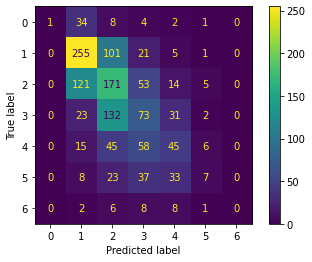

In [611]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním a n-gram

In [612]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scaled_rf, y_train)

RandomForestClassifier()

In [613]:
y_pred_train = rf_model.predict(X_train_combined_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [614]:
y_pred = rf_model.predict(X_test_combined_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3889705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.52      0.66      0.58       383
           2       0.33      0.48      0.39       364
           3       0.28      0.25      0.26       261
           4       0.34      0.22      0.27       169
           5       0.12      0.01      0.02       108
           6       0.00      0.00      0.00        25

    accuracy                           0.39      1360
   macro avg       0.23      0.23      0.22      1360
weighted avg       0.34      0.39      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [615]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [616]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.39
Recall: 0.23
Precision: 0.23
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


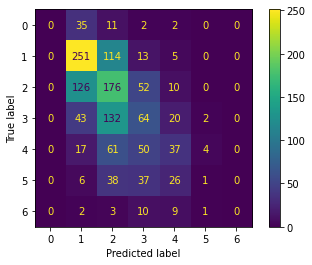

In [617]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním a tfidf n-gram

In [618]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scaled_rf, y_train)

RandomForestClassifier()

In [619]:
y_pred_train = rf_model.predict(X_train_combined2_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [620]:
y_pred = rf_model.predict(X_test_combined2_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3948529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.52      0.72      0.60       383
           2       0.33      0.48      0.39       364
           3       0.26      0.17      0.21       261
           4       0.36      0.25      0.29       169
           5       0.25      0.02      0.03       108
           6       0.00      0.00      0.00        25

    accuracy                           0.39      1360
   macro avg       0.24      0.23      0.22      1360
weighted avg       0.35      0.39      0.35      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [621]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [622]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.39
Recall: 0.23
Precision: 0.24
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


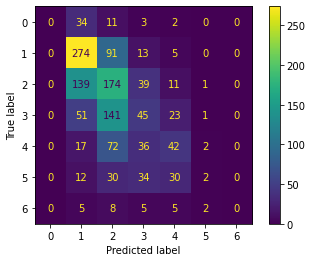

In [623]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním a word frequency

In [624]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_scaled_rf, y_train)

RandomForestClassifier()

In [625]:
y_pred_train = rf_model.predict(X_train_combined3_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [626]:
y_pred = rf_model.predict(X_test_combined3_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.39558823529411763
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.53      0.67      0.60       383
           2       0.33      0.52      0.41       364
           3       0.26      0.20      0.22       261
           4       0.37      0.21      0.27       169
           5       0.33      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.26      0.23      0.22      1360
weighted avg       0.36      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [627]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [628]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.23
Precision: 0.26
F1 Score: 0.22


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


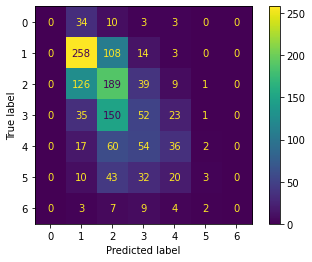

In [629]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - So škálovaním a tfidf word frequency

In [630]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_scaled_rf, y_train)

RandomForestClassifier()

In [631]:
y_pred_train = rf_model.predict(X_train_combined4_scaled_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [632]:
y_pred = rf_model.predict(X_test_combined4_scaled_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4125
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.55      0.73      0.63       383
           2       0.35      0.53      0.42       364
           3       0.26      0.18      0.21       261
           4       0.34      0.23      0.28       169
           5       0.36      0.04      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.27      0.24      0.23      1360
weighted avg       0.37      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [633]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [634]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.24
Precision: 0.27
F1 Score: 0.23


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


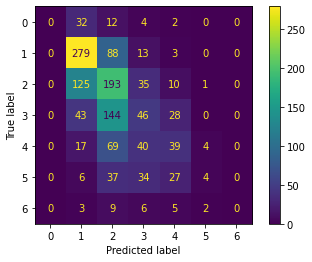

In [635]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním

In [636]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scal_out_rf, y_train)

RandomForestClassifier()

In [637]:
y_pred_train = rf_model.predict(X_train_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [638]:
y_pred = rf_model.predict(X_test_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7176470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.21        50
           1       0.73      0.92      0.82       383
           2       0.69      0.82      0.75       364
           3       0.74      0.67      0.71       261
           4       0.66      0.60      0.63       169
           5       0.87      0.36      0.51       108
           6       0.00      0.00      0.00        25

    accuracy                           0.72      1360
   macro avg       0.67      0.50      0.52      1360
weighted avg       0.72      0.72      0.69      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [639]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [640]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.72
Recall: 0.50
Precision: 0.67
F1 Score: 0.52


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


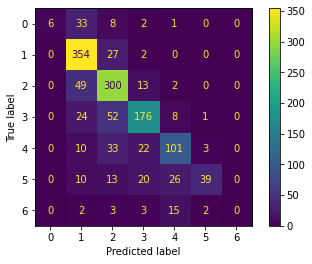

In [641]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním a s n-gram

In [642]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined_scal_out_rf, y_train)

RandomForestClassifier()

In [643]:
y_pred_train = rf_model.predict(X_train_combined_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [644]:
y_pred = rf_model.predict(X_test_combined_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5941176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.67      0.87      0.76       383
           2       0.54      0.75      0.63       364
           3       0.58      0.48      0.52       261
           4       0.50      0.41      0.45       169
           5       1.00      0.06      0.12       108
           6       0.00      0.00      0.00        25

    accuracy                           0.59      1360
   macro avg       0.47      0.37      0.36      1360
weighted avg       0.59      0.59      0.55      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [645]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [646]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.59
Recall: 0.37
Precision: 0.47
F1 Score: 0.36


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


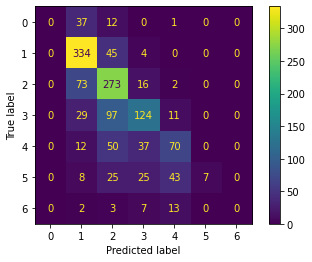

In [647]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním a s tfidf-ngram

In [648]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined2_scal_out_rf, y_train)

RandomForestClassifier()

In [649]:
y_pred_train = rf_model.predict(X_train_combined2_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [650]:
y_pred = rf_model.predict(X_test_combined2_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5235294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.60      0.86      0.71       383
           2       0.47      0.63      0.54       364
           3       0.46      0.36      0.41       261
           4       0.48      0.33      0.39       169
           5       0.60      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.52      1360
   macro avg       0.37      0.32      0.30      1360
weighted avg       0.49      0.52      0.47      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [651]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [652]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.52
Recall: 0.32
Precision: 0.37
F1 Score: 0.30


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


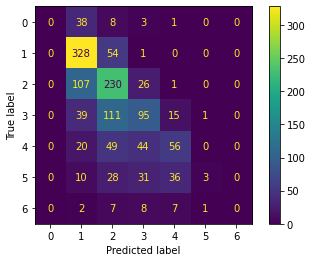

In [653]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním a s word frequency

In [654]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined3_scal_out_rf, y_train)

RandomForestClassifier()

In [655]:
y_pred_train = rf_model.predict(X_train_combined3_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [656]:
y_pred = rf_model.predict(X_test_combined3_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5213235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.64      0.86      0.73       383
           2       0.47      0.66      0.55       364
           3       0.41      0.31      0.35       261
           4       0.43      0.32      0.37       169
           5       0.36      0.04      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.52      1360
   macro avg       0.33      0.31      0.30      1360
weighted avg       0.47      0.52      0.47      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [657]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [658]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.52
Recall: 0.31
Precision: 0.33
F1 Score: 0.30


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


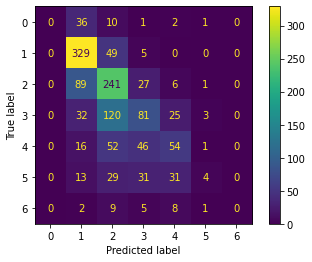

In [659]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

RANDOM FOREST - S ošetrením outlierov a so škálovaním a s tfidf word frequency

In [660]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_combined4_scal_out_rf, y_train)

RandomForestClassifier()

In [661]:
y_pred_train = rf_model.predict(X_train_combined4_scal_out_rf)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [662]:
y_pred = rf_model.predict(X_test_combined4_scal_out_rf)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.5198529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.61      0.84      0.71       383
           2       0.46      0.66      0.54       364
           3       0.47      0.34      0.40       261
           4       0.48      0.32      0.38       169
           5       0.33      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.52      1360
   macro avg       0.34      0.31      0.30      1360
weighted avg       0.47      0.52      0.47      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [663]:
results_list2_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [664]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.52
Recall: 0.31
Precision: 0.34
F1 Score: 0.30


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


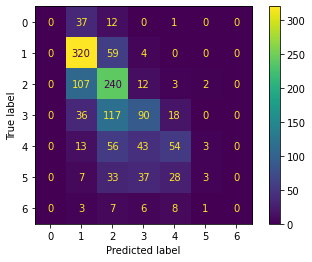

In [665]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [666]:
results_rf2 = pd.DataFrame(results_list2_rf)
print(results_rf2)

    accuracy_train  accuracy_test  precision_train  precision_test  \
0              1.0       0.399265              1.0        0.387747   
1              1.0       0.395588              1.0        0.238132   
2              1.0       0.407353              1.0        0.265073   
3              1.0       0.400000              1.0        0.272630   
4              1.0       0.404412              1.0        0.260965   
5              1.0       0.710294              1.0        0.801088   
6              1.0       0.608088              1.0        0.428529   
7              1.0       0.517647              1.0        0.374829   
8              1.0       0.508088              1.0        0.333922   
9              1.0       0.511765              1.0        0.311783   
10             1.0       0.405882              1.0        0.403780   
11             1.0       0.388971              1.0        0.228149   
12             1.0       0.394853              1.0        0.244040   
13             1.0  

Podľa výsledkov po druhom testovani random forest môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi so skalovanim. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. V porovnaní s prvým testom sa accuracy mierne zvýšilo. Aj ked sme zníšili počet črt, tak model je stále pretrénovaný.

GRADIENT BOOSTING CLASSIFIER - Bez ošetrenia outlierov a bez skalovania

In [667]:
results_list2_gbm=[]

Trenovanie modelu

In [668]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_gbm, y_train)

GradientBoostingClassifier()

Predikovanie na trenovacich datach

In [669]:
y_pred_train = gbm_model.predict(X_train_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.7484237074401009
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.99      0.65      0.79       142
           1       0.74      0.85      0.79       926
           2       0.65      0.77      0.71       861
           3       0.76      0.64      0.70       609
           4       0.88      0.66      0.75       393
           5       0.94      0.73      0.82       195
           6       1.00      0.96      0.98        46

    accuracy                           0.75      3172
   macro avg       0.85      0.75      0.79      3172
weighted avg       0.76      0.75      0.75      3172



Predikovanie na testovacich datach

In [670]:
y_pred = gbm_model.predict(X_test_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40147058823529413
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.16      0.06      0.09        50
           1       0.56      0.64      0.60       383
           2       0.37      0.48      0.42       364
           3       0.30      0.30      0.30       261
           4       0.31      0.21      0.25       169
           5       0.25      0.09      0.14       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.28      0.25      0.25      1360
weighted avg       0.38      0.40      0.38      1360



In [671]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

Zobrazenie metrik

In [672]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.40
Recall: 0.25
Precision: 0.28
F1 Score: 0.25


Vizualizácia výkonnosti modelu

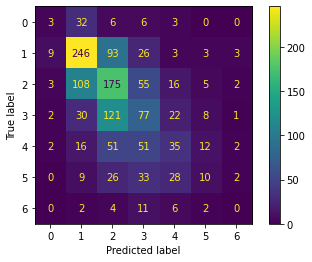

In [673]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S n-gram

In [674]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_gbm, y_train)

GradientBoostingClassifier()

In [675]:
y_pred_train = gbm_model.predict(X_train_combined_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8887137452711223
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87       142
           1       0.87      0.96      0.91       926
           2       0.82      0.92      0.87       861
           3       0.94      0.84      0.89       609
           4       0.96      0.79      0.87       393
           5       1.00      0.85      0.92       195
           6       1.00      0.98      0.99        46

    accuracy                           0.89      3172
   macro avg       0.94      0.87      0.90      3172
weighted avg       0.90      0.89      0.89      3172



In [676]:
y_pred = gbm_model.predict(X_test_combined_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4125
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.17      0.04      0.06        50
           1       0.58      0.68      0.63       383
           2       0.34      0.46      0.39       364
           3       0.32      0.28      0.30       261
           4       0.37      0.27      0.31       169
           5       0.26      0.11      0.15       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.29      0.26      0.26      1360
weighted avg       0.39      0.41      0.39      1360



In [677]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [678]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.26
Precision: 0.29
F1 Score: 0.26


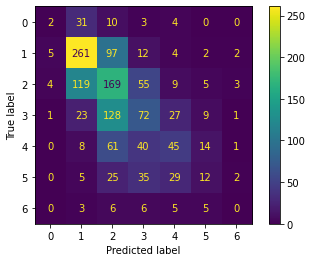

In [679]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S n-gram tfidf

In [680]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_gbm, y_train)

GradientBoostingClassifier()

In [681]:
y_pred_train = gbm_model.predict(X_train_combined2_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9369482976040353
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91       142
           1       0.93      0.98      0.96       926
           2       0.90      0.96      0.93       861
           3       0.94      0.94      0.94       609
           4       0.98      0.87      0.92       393
           5       0.99      0.84      0.91       195
           6       1.00      1.00      1.00        46

    accuracy                           0.94      3172
   macro avg       0.96      0.92      0.94      3172
weighted avg       0.94      0.94      0.94      3172



In [682]:
y_pred = gbm_model.predict(X_test_combined2_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4235294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.19      0.08      0.11        50
           1       0.59      0.70      0.64       383
           2       0.38      0.49      0.43       364
           3       0.33      0.26      0.29       261
           4       0.33      0.29      0.31       169
           5       0.17      0.06      0.09       108
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.28      0.27      0.27      1360
weighted avg       0.39      0.42      0.40      1360



In [683]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [684]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.27
Precision: 0.28
F1 Score: 0.27


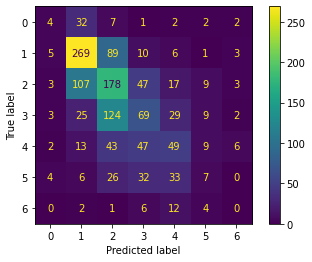

In [685]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S word frequency

In [686]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_gbm, y_train)

GradientBoostingClassifier()

In [687]:
y_pred_train = gbm_model.predict(X_train_combined3_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8865069356872636
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.99      0.73      0.84       142
           1       0.87      0.97      0.92       926
           2       0.81      0.92      0.86       861
           3       0.94      0.82      0.87       609
           4       0.99      0.76      0.86       393
           5       1.00      0.89      0.94       195
           6       1.00      1.00      1.00        46

    accuracy                           0.89      3172
   macro avg       0.94      0.87      0.90      3172
weighted avg       0.90      0.89      0.89      3172



In [688]:
y_pred = gbm_model.predict(X_test_combined3_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42867647058823527
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.18      0.04      0.07        50
           1       0.59      0.71      0.65       383
           2       0.37      0.49      0.42       364
           3       0.34      0.30      0.32       261
           4       0.32      0.24      0.27       169
           5       0.37      0.13      0.19       108
           6       0.00      0.00      0.00        25

    accuracy                           0.43      1360
   macro avg       0.31      0.27      0.27      1360
weighted avg       0.41      0.43      0.41      1360



In [689]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [690]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.27
Precision: 0.31
F1 Score: 0.27


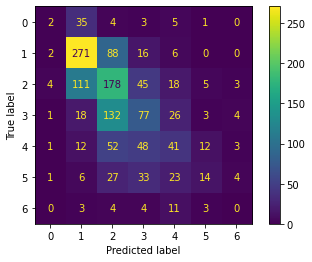

In [691]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S tfidf word frequency

In [692]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_gbm, y_train)

GradientBoostingClassifier()

In [693]:
y_pred_train = gbm_model.predict(X_train_combined4_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9353720050441362
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91       142
           1       0.92      0.97      0.95       926
           2       0.90      0.96      0.93       861
           3       0.95      0.92      0.94       609
           4       0.99      0.88      0.93       393
           5       0.99      0.89      0.94       195
           6       1.00      1.00      1.00        46

    accuracy                           0.94      3172
   macro avg       0.97      0.92      0.94      3172
weighted avg       0.94      0.94      0.94      3172



In [694]:
y_pred = gbm_model.predict(X_test_combined4_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42720588235294116
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.12      0.04      0.06        50
           1       0.59      0.72      0.65       383
           2       0.39      0.51      0.44       364
           3       0.35      0.29      0.32       261
           4       0.28      0.22      0.25       169
           5       0.21      0.07      0.11       108
           6       0.00      0.00      0.00        25

    accuracy                           0.43      1360
   macro avg       0.28      0.26      0.26      1360
weighted avg       0.39      0.43      0.40      1360



In [695]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [696]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.26
Precision: 0.28
F1 Score: 0.26


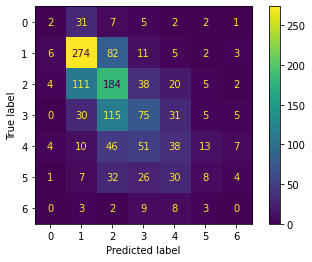

In [697]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrenim outlierov

In [698]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_out_gbm, y_train)

GradientBoostingClassifier()

In [699]:
y_pred_train = gbm_model.predict(X_train_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.969735182849937
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       142
           1       0.95      0.99      0.97       926
           2       0.96      0.97      0.97       861
           3       0.97      0.96      0.97       609
           4       1.00      0.96      0.98       393
           5       1.00      0.95      0.98       195
           6       1.00      1.00      1.00        46

    accuracy                           0.97      3172
   macro avg       0.98      0.96      0.97      3172
weighted avg       0.97      0.97      0.97      3172



In [700]:
y_pred = gbm_model.predict(X_test_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8294117647058824
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.96      0.48      0.64        50
           1       0.81      0.96      0.88       383
           2       0.85      0.88      0.86       364
           3       0.85      0.82      0.83       261
           4       0.82      0.70      0.76       169
           5       0.84      0.70      0.76       108
           6       0.50      0.28      0.36        25

    accuracy                           0.83      1360
   macro avg       0.80      0.69      0.73      1360
weighted avg       0.83      0.83      0.82      1360



In [701]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [702]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.83
Recall: 0.69
Precision: 0.80
F1 Score: 0.73


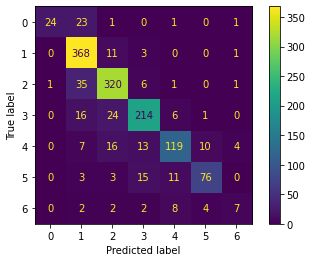

In [703]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrenim outlierov a n-gram

In [704]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_out_gbm, y_train)

GradientBoostingClassifier()

In [705]:
y_pred_train = gbm_model.predict(X_train_combined_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9864438839848676
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       142
           1       0.98      0.99      0.99       926
           2       0.98      0.99      0.98       861
           3       0.99      0.98      0.99       609
           4       1.00      0.98      0.99       393
           5       1.00      0.97      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [706]:
y_pred = gbm_model.predict(X_test_combined_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.93      0.52      0.67        50
           1       0.83      0.95      0.89       383
           2       0.80      0.89      0.84       364
           3       0.82      0.79      0.80       261
           4       0.79      0.70      0.74       169
           5       0.83      0.59      0.69       108
           6       0.40      0.16      0.23        25

    accuracy                           0.81      1360
   macro avg       0.77      0.66      0.69      1360
weighted avg       0.81      0.81      0.81      1360



In [707]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [708]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.81
Recall: 0.66
Precision: 0.77
F1 Score: 0.69


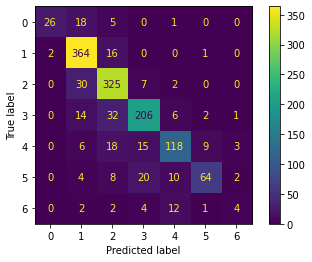

In [709]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrenim outlierov a tfidf n-gram

In [710]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_out_gbm, y_train)

GradientBoostingClassifier()

In [711]:
y_pred_train = gbm_model.predict(X_train_combined2_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9930643127364439
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       142
           1       0.99      1.00      0.99       926
           2       0.99      1.00      0.99       861
           3       1.00      1.00      1.00       609
           4       1.00      0.98      0.99       393
           5       1.00      0.97      0.98       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [712]:
y_pred = gbm_model.predict(X_test_combined2_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7897058823529411
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.83      0.40      0.54        50
           1       0.83      0.94      0.88       383
           2       0.76      0.88      0.81       364
           3       0.79      0.77      0.78       261
           4       0.78      0.66      0.71       169
           5       0.82      0.55      0.66       108
           6       0.25      0.12      0.16        25

    accuracy                           0.79      1360
   macro avg       0.72      0.62      0.65      1360
weighted avg       0.79      0.79      0.78      1360



In [713]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [714]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.62
Precision: 0.72
F1 Score: 0.65


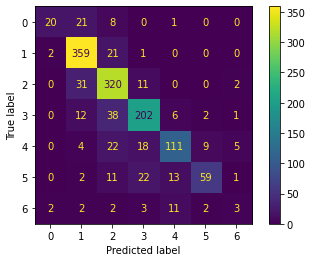

In [715]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrenim outlierov a word frequency

In [716]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_out_gbm, y_train)

GradientBoostingClassifier()

In [717]:
y_pred_train = gbm_model.predict(X_train_combined3_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9883354350567465
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       142
           1       0.98      1.00      0.99       926
           2       0.98      0.99      0.99       861
           3       1.00      0.98      0.99       609
           4       1.00      0.98      0.99       393
           5       1.00      0.98      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [718]:
y_pred = gbm_model.predict(X_test_combined3_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7963235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.91      0.42      0.58        50
           1       0.82      0.95      0.88       383
           2       0.77      0.88      0.82       364
           3       0.77      0.76      0.77       261
           4       0.79      0.69      0.74       169
           5       0.87      0.54      0.66       108
           6       0.67      0.16      0.26        25

    accuracy                           0.80      1360
   macro avg       0.80      0.63      0.67      1360
weighted avg       0.80      0.80      0.79      1360



In [719]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [720]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.80
Recall: 0.63
Precision: 0.80
F1 Score: 0.67


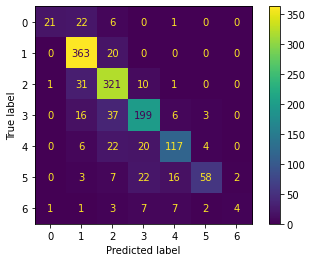

In [721]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrenim outlierov a tfidf word frequency

In [722]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_out_gbm, y_train)

GradientBoostingClassifier()

In [723]:
y_pred_train = gbm_model.predict(X_train_combined4_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9940100882723834
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       142
           1       0.99      1.00      1.00       926
           2       0.99      1.00      0.99       861
           3       1.00      1.00      1.00       609
           4       1.00      0.98      0.99       393
           5       1.00      0.98      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [724]:
y_pred = gbm_model.predict(X_test_combined4_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7897058823529411
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.81      0.44      0.57        50
           1       0.83      0.95      0.88       383
           2       0.78      0.87      0.82       364
           3       0.77      0.76      0.77       261
           4       0.80      0.66      0.72       169
           5       0.82      0.55      0.66       108
           6       0.20      0.16      0.18        25

    accuracy                           0.79      1360
   macro avg       0.72      0.63      0.66      1360
weighted avg       0.79      0.79      0.78      1360



In [725]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [726]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.63
Precision: 0.72
F1 Score: 0.66


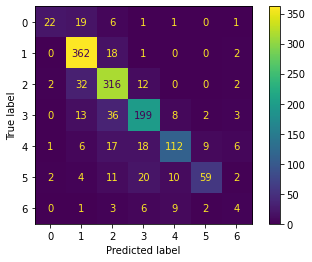

In [727]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - So škálovaním

In [728]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scaled_gbm, y_train)

GradientBoostingClassifier()

In [729]:
y_pred_train = gbm_model.predict(X_train_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.755359394703657
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.99      0.65      0.78       142
           1       0.74      0.85      0.79       926
           2       0.66      0.79      0.72       861
           3       0.77      0.66      0.71       609
           4       0.88      0.65      0.75       393
           5       0.96      0.70      0.81       195
           6       1.00      1.00      1.00        46

    accuracy                           0.76      3172
   macro avg       0.86      0.76      0.80      3172
weighted avg       0.77      0.76      0.76      3172



In [730]:
y_pred = gbm_model.predict(X_test_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.39338235294117646
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.12      0.04      0.06        50
           1       0.57      0.64      0.60       383
           2       0.36      0.48      0.41       364
           3       0.29      0.27      0.28       261
           4       0.29      0.21      0.25       169
           5       0.17      0.06      0.09       108
           6       0.00      0.00      0.00        25

    accuracy                           0.39      1360
   macro avg       0.26      0.24      0.24      1360
weighted avg       0.36      0.39      0.37      1360



In [731]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [732]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.39
Recall: 0.24
Precision: 0.26
F1 Score: 0.24


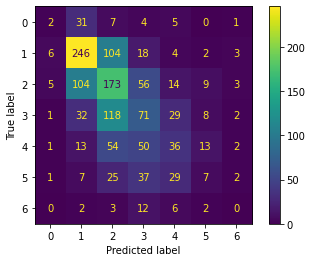

In [733]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - So škálovaním a n-gram

In [734]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scaled_gbm, y_train)

GradientBoostingClassifier()

In [735]:
y_pred_train = gbm_model.predict(X_train_combined_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8843001261034048
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88       142
           1       0.87      0.95      0.91       926
           2       0.82      0.91      0.86       861
           3       0.92      0.84      0.88       609
           4       0.96      0.76      0.85       393
           5       0.99      0.86      0.92       195
           6       1.00      1.00      1.00        46

    accuracy                           0.88      3172
   macro avg       0.94      0.87      0.90      3172
weighted avg       0.89      0.88      0.88      3172



In [736]:
y_pred = gbm_model.predict(X_test_combined_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.21      0.08      0.12        50
           1       0.58      0.69      0.63       383
           2       0.35      0.46      0.40       364
           3       0.34      0.30      0.32       261
           4       0.33      0.25      0.28       169
           5       0.20      0.08      0.12       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.29      0.26      0.27      1360
weighted avg       0.39      0.41      0.39      1360



In [737]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [738]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.41
Recall: 0.26
Precision: 0.29
F1 Score: 0.27


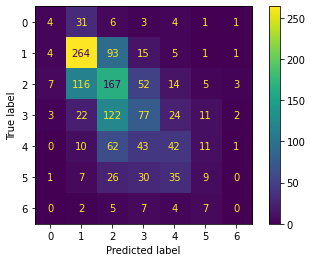

In [739]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - So škálovaním a tfidf n-gram

In [740]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scaled_gbm, y_train)

GradientBoostingClassifier()

In [741]:
y_pred_train = gbm_model.predict(X_train_combined2_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9501891551071879
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       142
           1       0.94      0.98      0.96       926
           2       0.93      0.97      0.95       861
           3       0.95      0.95      0.95       609
           4       0.98      0.89      0.93       393
           5       0.99      0.88      0.93       195
           6       1.00      1.00      1.00        46

    accuracy                           0.95      3172
   macro avg       0.97      0.94      0.95      3172
weighted avg       0.95      0.95      0.95      3172



In [742]:
y_pred = gbm_model.predict(X_test_combined2_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42867647058823527
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.14      0.06      0.08        50
           1       0.60      0.73      0.66       383
           2       0.38      0.49      0.43       364
           3       0.35      0.28      0.31       261
           4       0.28      0.24      0.26       169
           5       0.19      0.07      0.11       108
           6       0.00      0.00      0.00        25

    accuracy                           0.43      1360
   macro avg       0.28      0.27      0.26      1360
weighted avg       0.40      0.43      0.40      1360



In [743]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [744]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.27
Precision: 0.28
F1 Score: 0.26


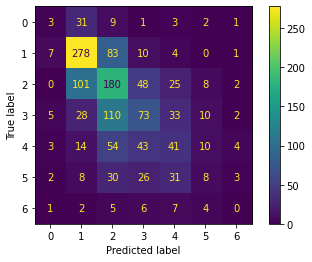

In [745]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - So škálovaním a word frequency

In [746]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_scaled_gbm, y_train)

GradientBoostingClassifier()

In [747]:
y_pred_train = gbm_model.predict(X_train_combined3_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8833543505674654
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85       142
           1       0.87      0.97      0.92       926
           2       0.80      0.92      0.86       861
           3       0.95      0.82      0.88       609
           4       0.99      0.75      0.85       393
           5       0.99      0.86      0.92       195
           6       1.00      0.98      0.99        46

    accuracy                           0.88      3172
   macro avg       0.94      0.86      0.89      3172
weighted avg       0.89      0.88      0.88      3172



In [748]:
y_pred = gbm_model.predict(X_test_combined3_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4227941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.17      0.04      0.06        50
           1       0.59      0.68      0.63       383
           2       0.36      0.49      0.41       364
           3       0.34      0.28      0.31       261
           4       0.33      0.27      0.30       169
           5       0.33      0.13      0.19       108
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.30      0.27      0.27      1360
weighted avg       0.40      0.42      0.40      1360



In [749]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [750]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.42
Recall: 0.27
Precision: 0.30
F1 Score: 0.27


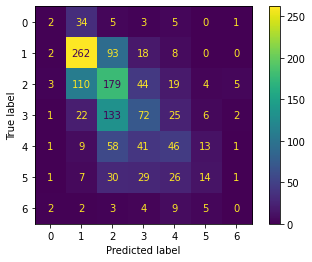

In [751]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - So škálovaním a tfidf word frequency

In [752]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_scaled_gbm, y_train)

GradientBoostingClassifier()

In [753]:
y_pred_train = gbm_model.predict(X_train_combined4_scaled_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9334804539722572
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       142
           1       0.92      0.97      0.95       926
           2       0.88      0.96      0.92       861
           3       0.96      0.91      0.93       609
           4       0.99      0.85      0.92       393
           5       0.99      0.92      0.95       195
           6       1.00      1.00      1.00        46

    accuracy                           0.93      3172
   macro avg       0.96      0.93      0.94      3172
weighted avg       0.94      0.93      0.93      3172



In [754]:
y_pred = gbm_model.predict(X_test_combined4_scaled_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.42573529411764705
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.08      0.04      0.05        50
           1       0.59      0.70      0.64       383
           2       0.38      0.51      0.43       364
           3       0.36      0.27      0.31       261
           4       0.31      0.25      0.28       169
           5       0.26      0.09      0.14       108
           6       0.05      0.04      0.04        25

    accuracy                           0.43      1360
   macro avg       0.29      0.27      0.27      1360
weighted avg       0.40      0.43      0.40      1360



In [755]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [756]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.43
Recall: 0.27
Precision: 0.29
F1 Score: 0.27


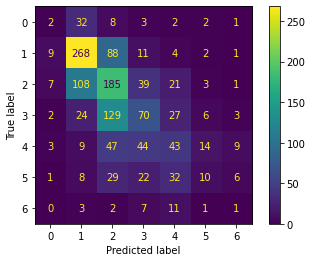

In [757]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrením outlierov a so škálovaním

In [758]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [759]:
y_pred_train = gbm_model.predict(X_train_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.969735182849937
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       142
           1       0.95      0.99      0.97       926
           2       0.96      0.97      0.97       861
           3       0.97      0.96      0.97       609
           4       1.00      0.96      0.98       393
           5       1.00      0.95      0.98       195
           6       1.00      1.00      1.00        46

    accuracy                           0.97      3172
   macro avg       0.98      0.96      0.97      3172
weighted avg       0.97      0.97      0.97      3172



In [760]:
y_pred = gbm_model.predict(X_test_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8316176470588236
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        50
           1       0.81      0.96      0.88       383
           2       0.85      0.89      0.87       364
           3       0.85      0.82      0.83       261
           4       0.81      0.70      0.75       169
           5       0.84      0.70      0.76       108
           6       0.55      0.24      0.33        25

    accuracy                           0.83      1360
   macro avg       0.81      0.69      0.73      1360
weighted avg       0.83      0.83      0.83      1360



In [761]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [762]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.83
Recall: 0.69
Precision: 0.81
F1 Score: 0.73


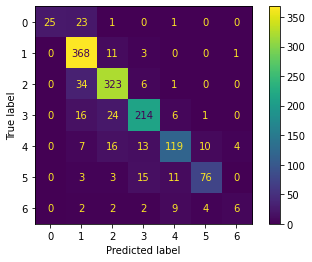

In [763]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrením outlierov a so škálovaním a n-gram

In [764]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [765]:
y_pred_train = gbm_model.predict(X_train_combined_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9864438839848676
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       142
           1       0.98      0.99      0.99       926
           2       0.98      0.99      0.98       861
           3       0.99      0.98      0.99       609
           4       1.00      0.98      0.99       393
           5       1.00      0.97      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [766]:
y_pred = gbm_model.predict(X_test_combined_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.8125
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.93      0.52      0.67        50
           1       0.83      0.95      0.89       383
           2       0.80      0.89      0.84       364
           3       0.81      0.79      0.80       261
           4       0.79      0.69      0.74       169
           5       0.83      0.59      0.69       108
           6       0.36      0.16      0.22        25

    accuracy                           0.81      1360
   macro avg       0.77      0.66      0.69      1360
weighted avg       0.81      0.81      0.80      1360



In [767]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [768]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.81
Recall: 0.66
Precision: 0.77
F1 Score: 0.69


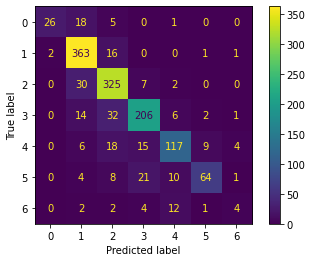

In [769]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrením outlierov a so škálovaním a tfidf n-gram

In [770]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined2_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [771]:
y_pred_train = gbm_model.predict(X_train_combined2_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9930643127364439
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       142
           1       0.99      1.00      0.99       926
           2       0.99      1.00      0.99       861
           3       1.00      1.00      1.00       609
           4       1.00      0.98      0.99       393
           5       1.00      0.97      0.98       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [772]:
y_pred = gbm_model.predict(X_test_combined2_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7919117647058823
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.83      0.40      0.54        50
           1       0.83      0.94      0.88       383
           2       0.76      0.88      0.81       364
           3       0.79      0.77      0.78       261
           4       0.78      0.66      0.72       169
           5       0.85      0.57      0.69       108
           6       0.27      0.12      0.17        25

    accuracy                           0.79      1360
   macro avg       0.73      0.62      0.65      1360
weighted avg       0.79      0.79      0.78      1360



In [773]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [774]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.62
Precision: 0.73
F1 Score: 0.65


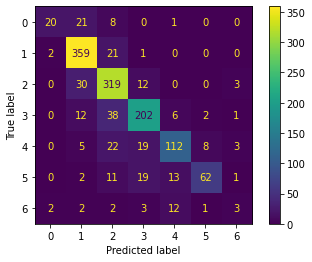

In [775]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrením outlierov a so škálovaním a word frequency

In [776]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined3_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [777]:
y_pred_train = gbm_model.predict(X_train_combined3_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9883354350567465
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       142
           1       0.98      1.00      0.99       926
           2       0.98      0.99      0.99       861
           3       1.00      0.98      0.99       609
           4       1.00      0.98      0.99       393
           5       1.00      0.98      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [778]:
y_pred = gbm_model.predict(X_test_combined3_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7889705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.91      0.42      0.58        50
           1       0.82      0.95      0.88       383
           2       0.77      0.88      0.82       364
           3       0.77      0.74      0.76       261
           4       0.78      0.69      0.73       169
           5       0.86      0.53      0.66       108
           6       0.29      0.16      0.21        25

    accuracy                           0.79      1360
   macro avg       0.74      0.62      0.66      1360
weighted avg       0.79      0.79      0.78      1360



In [779]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [780]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.62
Precision: 0.74
F1 Score: 0.66


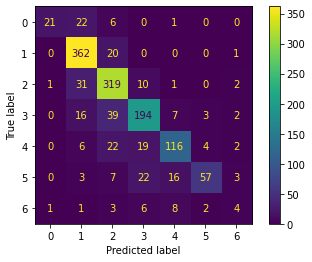

In [781]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

GBM - S ošetrením outlierov a so škálovaním a tfidf word frequency

In [782]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_combined4_scal_out_gbm, y_train)

GradientBoostingClassifier()

In [783]:
y_pred_train = gbm_model.predict(X_train_combined4_scal_out_gbm)
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9940100882723834
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       142
           1       0.99      1.00      1.00       926
           2       0.99      1.00      0.99       861
           3       1.00      1.00      1.00       609
           4       1.00      0.98      0.99       393
           5       1.00      0.98      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       1.00      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [784]:
y_pred = gbm_model.predict(X_test_combined4_scal_out_gbm)
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.7933823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.84      0.42      0.56        50
           1       0.83      0.95      0.88       383
           2       0.78      0.88      0.82       364
           3       0.79      0.77      0.78       261
           4       0.79      0.67      0.72       169
           5       0.82      0.55      0.66       108
           6       0.22      0.16      0.19        25

    accuracy                           0.79      1360
   macro avg       0.72      0.63      0.66      1360
weighted avg       0.79      0.79      0.78      1360



In [785]:
results_list2_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [786]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' pre nevyvážené triedy, 'binary' pre binárnu klasifikáciu
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}".format(accuracy))
print("Recall: {:.2f}".format(recall))
print("Precision: {:.2f}".format(precision))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 0.79
Recall: 0.63
Precision: 0.72
F1 Score: 0.66


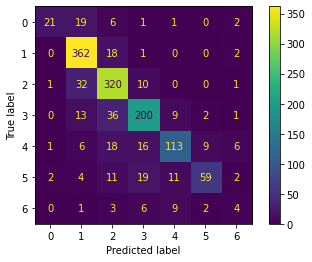

In [787]:
matrix1=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix1).plot()

In [788]:
results_gbm2 = pd.DataFrame(results_list2_gbm)
print(results_gbm2)

    accuracy_train  accuracy_test  precision_train  precision_test  \
0         0.748424       0.401471         0.851518        0.276840   
1         0.888714       0.412500         0.941463        0.290205   
2         0.936948       0.423529         0.963078        0.284373   
3         0.886507       0.428676         0.942982        0.309663   
4         0.935372       0.427206         0.965003        0.277391   
5         0.969735       0.829412         0.983821        0.802209   
6         0.986444       0.813971         0.992686        0.771527   
7         0.993064       0.789706         0.996068        0.723100   
8         0.988335       0.796324         0.993886        0.800020   
9         0.994010       0.789706         0.996682        0.716195   
10        0.755359       0.393382         0.858061        0.256809   
11        0.884300       0.413971         0.937002        0.287018   
12        0.950189       0.428676         0.970926        0.279230   
13        0.883354  

Podľa výsledkov po druhom testovani gbm môžeme vidieť, že najlepší výsledok mal dataset s ošetrenými outliermi a skalovaním. Takže je zrejme, že najväčší vplyv na úspešnosť malo ošetrenie outlierov. V porovnaní s prvým testom sa accuray moc nezmenilo. Aj ked sme zníšili počet črt, tak model je stále pretrénovaný.

HYPERPARAMETRE

Teraz vykonáme testovanie 3, pričom použijeme datasety s výberom črt. Preddefinujeme si hyperparametre, ktoré bude gridsearch skúšať a bude hľadať tú najlepšiu kombináciu aby dosiahol čím najvýšie accuracy. Potom s týmito parametrami si spustíme predikciu na trenovacej aj testovacej sade.

SVC - bez osetrenia outlierov a skalovania

In [789]:
results_list3_svc=[]

Určenie hyperparametrov, ktore budeme v grid search skúšať

In [790]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.5, 1.0, 1.5],
}

Grid search - vyskúša každú kombináciu hyperparametrov a vypíše tu najlepšiu pre accuracy

In [791]:
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Najlepšie parametre: {'C': 100, 'coef0': 1.5, 'gamma': 'scale', 'kernel': 'poly'}
Najlepšie skóre: 0.3988097071462281


Predikovanie na trenovacich datach

In [792]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_svc)

In [793]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.47225725094577553
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.03       142
           1       0.56      0.70      0.62       926
           2       0.40      0.61      0.48       861
           3       0.42      0.30      0.35       609
           4       0.48      0.27      0.35       393
           5       0.75      0.14      0.23       195
           6       1.00      0.11      0.20        46

    accuracy                           0.47      3172
   macro avg       0.66      0.31      0.32      3172
weighted avg       0.52      0.47      0.44      3172



Predikovanie na testovacich datach

In [794]:
y_pred = best_model.predict(X_test_svc)

In [795]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [796]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40661764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.55      0.67      0.60       383
           2       0.36      0.57      0.44       364
           3       0.29      0.21      0.24       261
           4       0.28      0.18      0.22       169
           5       0.27      0.04      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.25      0.24      0.22      1360
weighted avg       0.36      0.41      0.37      1360



Vizualizácia výkonnosti modelu

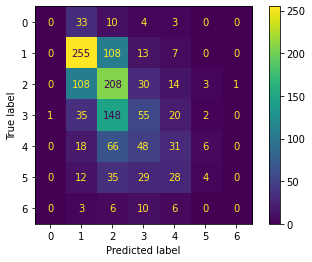

In [797]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - bez osetrenia outlierov a skalovania a ngram

In [798]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.5, kernel='poly')

In [799]:
y_pred_train = model.predict(X_train_combined_svc)

In [800]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9930643127364439
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       142
           1       0.98      0.99      0.99       926
           2       1.00      0.98      0.99       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       0.99      0.99      0.99      3172



In [801]:
y_pred = model.predict(X_test_combined_svc)

In [802]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [803]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3639705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.16      0.24      0.19        50
           1       0.53      0.61      0.56       383
           2       0.35      0.32      0.33       364
           3       0.30      0.28      0.29       261
           4       0.25      0.27      0.26       169
           5       0.23      0.16      0.19       108
           6       0.08      0.08      0.08        25

    accuracy                           0.36      1360
   macro avg       0.27      0.28      0.27      1360
weighted avg       0.36      0.36      0.36      1360



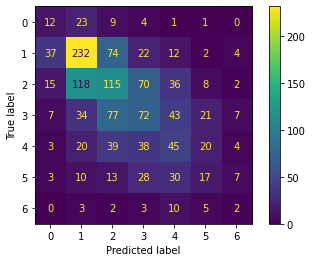

In [804]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - bez osetrenia outlierov a skalovania a tfidf ngram

In [805]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.5, kernel='poly')

In [806]:
y_pred_train = model.predict(X_train_combined2_svc)

In [807]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.7972887767969735
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.99      0.52      0.68       142
           1       0.80      0.89      0.84       926
           2       0.74      0.85      0.79       861
           3       0.77      0.78      0.78       609
           4       0.89      0.69      0.78       393
           5       0.96      0.66      0.78       195
           6       1.00      0.57      0.72        46

    accuracy                           0.80      3172
   macro avg       0.88      0.71      0.77      3172
weighted avg       0.81      0.80      0.79      3172



In [808]:
y_pred = model.predict(X_test_combined2_svc)

In [809]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [810]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4375
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.38      0.06      0.10        50
           1       0.60      0.71      0.65       383
           2       0.41      0.50      0.45       364
           3       0.34      0.34      0.34       261
           4       0.29      0.26      0.27       169
           5       0.17      0.06      0.08       108
           6       0.00      0.00      0.00        25

    accuracy                           0.44      1360
   macro avg       0.31      0.27      0.27      1360
weighted avg       0.41      0.44      0.41      1360



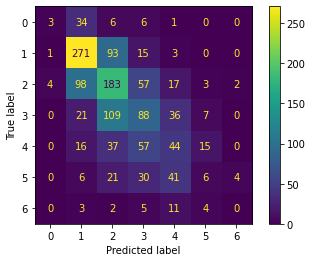

In [811]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - bez osetrenia outlierov a skalovania a word frequency

In [812]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.5, kernel='poly')

In [813]:
y_pred_train = model.predict(X_train_combined3_svc)

In [814]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [815]:
y_pred = model.predict(X_test_combined3_svc)

In [816]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })


In [817]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3963235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.21      0.22      0.21        50
           1       0.58      0.64      0.61       383
           2       0.38      0.41      0.39       364
           3       0.32      0.27      0.29       261
           4       0.23      0.25      0.24       169
           5       0.27      0.20      0.23       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.28      0.28      0.28      1360
weighted avg       0.38      0.40      0.39      1360



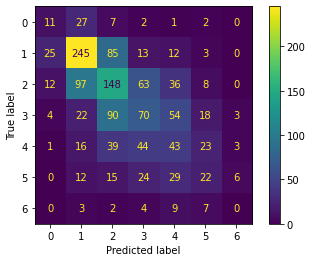

In [818]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - bez osetrenia outlierov a skalovania a tfidf word frequency

In [819]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.5, kernel='poly')

In [820]:
y_pred_train = model.predict(X_train_combined4_svc)

In [821]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.8565573770491803
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.98      0.63      0.76       142
           1       0.82      0.92      0.87       926
           2       0.82      0.88      0.85       861
           3       0.87      0.86      0.86       609
           4       0.94      0.77      0.85       393
           5       0.99      0.78      0.88       195
           6       1.00      0.72      0.84        46

    accuracy                           0.86      3172
   macro avg       0.92      0.80      0.84      3172
weighted avg       0.86      0.86      0.86      3172



In [822]:
y_pred = model.predict(X_test_combined4_svc)

In [823]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [824]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4360294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.14      0.04      0.06        50
           1       0.60      0.72      0.65       383
           2       0.42      0.50      0.46       364
           3       0.32      0.31      0.32       261
           4       0.27      0.22      0.25       169
           5       0.31      0.15      0.20       108
           6       0.00      0.00      0.00        25

    accuracy                           0.44      1360
   macro avg       0.29      0.28      0.28      1360
weighted avg       0.41      0.44      0.42      1360



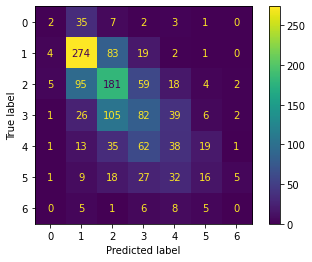

In [825]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov

In [826]:
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_out_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Najlepšie parametre: {'C': 100, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'rbf'}
Najlepšie skóre: 0.505051789661939


In [827]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_out_svc)

In [828]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.5744010088272383
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.03       142
           1       0.67      0.80      0.73       926
           2       0.51      0.66      0.58       861
           3       0.51      0.46      0.48       609
           4       0.55      0.50      0.52       393
           5       0.85      0.15      0.25       195
           6       1.00      0.02      0.04        46

    accuracy                           0.57      3172
   macro avg       0.73      0.37      0.38      3172
weighted avg       0.61      0.57      0.54      3172



In [829]:
y_pred = best_model.predict(X_test_out_svc)

In [830]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [831]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.49117647058823527
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.62      0.78      0.69       383
           2       0.45      0.57      0.50       364
           3       0.38      0.36      0.37       261
           4       0.41      0.37      0.39       169
           5       0.50      0.06      0.10       108
           6       0.00      0.00      0.00        25

    accuracy                           0.49      1360
   macro avg       0.34      0.30      0.29      1360
weighted avg       0.46      0.49      0.45      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


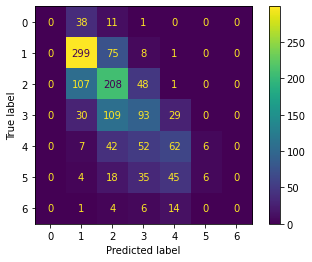

In [832]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC -  s osetrenim outlierov a ngram

In [833]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, gamma='auto')

In [834]:
y_pred_train = model.predict(X_train_combined_out_svc)

In [835]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [836]:
y_pred = model.predict(X_test_combined_out_svc)

In [837]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [838]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.28161764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.28      1.00      0.44       383
           2       0.00      0.00      0.00       364
           3       0.00      0.00      0.00       261
           4       0.00      0.00      0.00       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.28      1360
   macro avg       0.04      0.14      0.06      1360
weighted avg       0.08      0.28      0.12      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


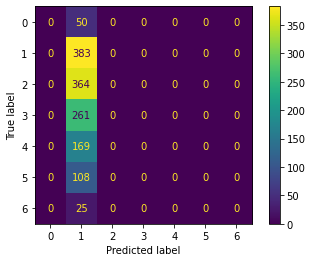

In [839]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC -  s osetrenim outlierov a tfidf ngram

In [840]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, gamma='auto')

In [841]:
y_pred_train = model.predict(X_train_combined2_out_svc)

In [842]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.48612862547288777
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.60      0.77      0.67       926
           2       0.42      0.58      0.49       861
           3       0.37      0.30      0.33       609
           4       0.48      0.39      0.43       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.49      3172
   macro avg       0.27      0.29      0.27      3172
weighted avg       0.42      0.49      0.45      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [843]:
y_pred = model.predict(X_test_combined2_out_svc)

In [844]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [845]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4772058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.61      0.77      0.68       383
           2       0.42      0.60      0.49       364
           3       0.35      0.29      0.32       261
           4       0.44      0.34      0.38       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.48      1360
   macro avg       0.26      0.29      0.27      1360
weighted avg       0.40      0.48      0.43      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


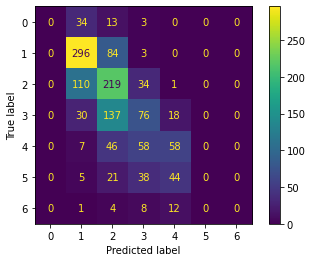

In [846]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a word frequency

In [847]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, gamma='auto')

In [848]:
y_pred_train = model.predict(X_train_combined3_out_svc)

In [849]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [850]:
y_pred = model.predict(X_test_combined3_out_svc)

In [851]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [852]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.34558823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.54      0.50      0.52       383
           2       0.28      0.75      0.40       364
           3       0.44      0.03      0.06       261
           4       0.00      0.00      0.00       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.18      0.18      0.14      1360
weighted avg       0.31      0.35      0.26      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


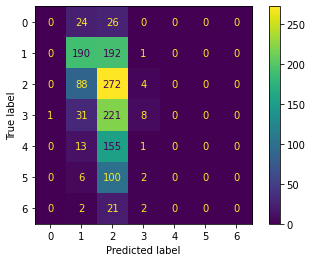

In [853]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a tfidf word frequency

In [854]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, gamma='auto')

In [855]:
y_pred_train = model.predict(X_train_combined4_out_svc)

In [856]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4703656998738966
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.58      0.77      0.66       926
           2       0.40      0.56      0.47       861
           3       0.36      0.29      0.32       609
           4       0.47      0.30      0.37       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.47      3172
   macro avg       0.26      0.27      0.26      3172
weighted avg       0.41      0.47      0.43      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [857]:
y_pred = model.predict(X_test_combined4_out_svc)

In [858]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [859]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.46838235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.59      0.77      0.67       383
           2       0.41      0.59      0.48       364
           3       0.35      0.30      0.32       261
           4       0.45      0.29      0.35       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.47      1360
   macro avg       0.26      0.28      0.26      1360
weighted avg       0.40      0.47      0.42      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


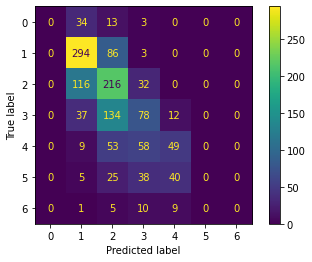

In [860]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim

In [861]:
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_scaled_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Najlepšie parametre: {'C': 100, 'coef0': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
Najlepšie skóre: 0.39124021957823096


In [862]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_scaled_svc)

In [863]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4501891551071879
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.01       142
           1       0.54      0.72      0.61       926
           2       0.39      0.56      0.46       861
           3       0.37      0.28      0.32       609
           4       0.48      0.23      0.31       393
           5       0.54      0.11      0.18       195
           6       0.00      0.00      0.00        46

    accuracy                           0.45      3172
   macro avg       0.47      0.27      0.27      3172
weighted avg       0.47      0.45      0.41      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [864]:
y_pred = best_model.predict(X_test_scaled_svc)

In [865]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [866]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.38088235294117645
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.52      0.68      0.59       383
           2       0.33      0.52      0.40       364
           3       0.23      0.16      0.19       261
           4       0.29      0.14      0.18       169
           5       0.19      0.05      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.38      1360
   macro avg       0.22      0.22      0.21      1360
weighted avg       0.33      0.38      0.34      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


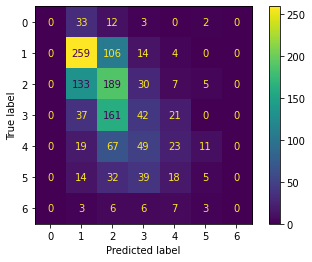

In [867]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim a ngram

In [868]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scaled_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.0, kernel='poly')

In [869]:
y_pred_train = model.predict(X_train_combined_scaled_svc)

In [870]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9858133669609079
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       142
           1       0.97      0.99      0.98       926
           2       0.98      0.98      0.98       861
           3       0.99      0.98      0.99       609
           4       1.00      0.99      0.99       393
           5       1.00      0.99      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           0.99      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       0.99      0.99      0.99      3172



In [871]:
y_pred = model.predict(X_test_combined_scaled_svc)

In [872]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [873]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.3683823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.15      0.24      0.19        50
           1       0.54      0.61      0.58       383
           2       0.36      0.35      0.35       364
           3       0.29      0.25      0.27       261
           4       0.24      0.25      0.25       169
           5       0.25      0.17      0.20       108
           6       0.07      0.08      0.07        25

    accuracy                           0.37      1360
   macro avg       0.27      0.28      0.27      1360
weighted avg       0.36      0.37      0.36      1360



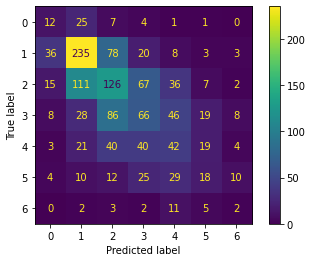

In [874]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim a tfidf ngram

In [875]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scaled_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.0, kernel='poly')

In [876]:
y_pred_train = model.predict(X_train_combined2_scaled_svc)

In [877]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9397856242118537
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       142
           1       0.94      0.96      0.95       926
           2       0.91      0.94      0.92       861
           3       0.94      0.92      0.93       609
           4       0.98      0.91      0.94       393
           5       0.99      0.93      0.96       195
           6       1.00      0.96      0.98        46

    accuracy                           0.94      3172
   macro avg       0.96      0.94      0.95      3172
weighted avg       0.94      0.94      0.94      3172



In [878]:
y_pred = model.predict(X_test_combined2_scaled_svc)

In [879]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [880]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.43676470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.23      0.20      0.21        50
           1       0.59      0.66      0.62       383
           2       0.42      0.48      0.44       364
           3       0.37      0.32      0.34       261
           4       0.32      0.33      0.32       169
           5       0.30      0.19      0.24       108
           6       0.00      0.00      0.00        25

    accuracy                           0.44      1360
   macro avg       0.32      0.31      0.31      1360
weighted avg       0.42      0.44      0.43      1360



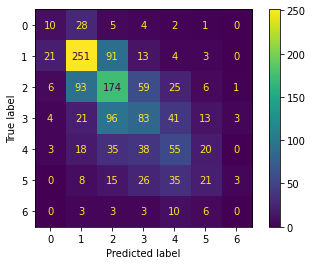

In [881]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim a word frequency

In [882]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_scaled_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.0, kernel='poly')

In [883]:
y_pred_train = model.predict(X_train_combined3_scaled_svc)

In [884]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9996847414880202
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [885]:
y_pred = model.predict(X_test_combined3_scaled_svc)

In [886]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [887]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.40294117647058825
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.17      0.18      0.17        50
           1       0.57      0.65      0.61       383
           2       0.40      0.41      0.41       364
           3       0.33      0.28      0.31       261
           4       0.25      0.26      0.25       169
           5       0.25      0.19      0.21       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.28      0.28      0.28      1360
weighted avg       0.39      0.40      0.39      1360



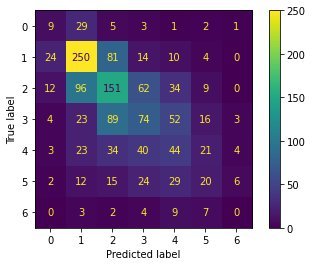

In [888]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - so skalovanim a tfidf word frequency

In [889]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_scaled_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, coef0=1.0, kernel='poly')

In [890]:
y_pred_train = model.predict(X_train_combined4_scaled_svc)

In [891]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.9836065573770492
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       142
           1       0.96      1.00      0.98       926
           2       0.98      0.97      0.98       861
           3       0.99      0.98      0.99       609
           4       1.00      0.98      0.99       393
           5       1.00      0.99      0.99       195
           6       1.00      1.00      1.00        46

    accuracy                           0.98      3172
   macro avg       0.99      0.99      0.99      3172
weighted avg       0.98      0.98      0.98      3172



In [892]:
y_pred = model.predict(X_test_combined4_scaled_svc)

In [893]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

In [894]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4176470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.19      0.18      0.19        50
           1       0.58      0.66      0.62       383
           2       0.41      0.46      0.43       364
           3       0.33      0.29      0.31       261
           4       0.26      0.25      0.25       169
           5       0.30      0.19      0.24       108
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.30      0.29      0.29      1360
weighted avg       0.40      0.42      0.41      1360



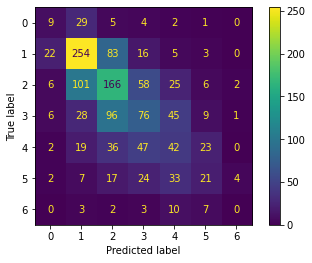

In [895]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim 

In [896]:
model = SVC()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
grid_search.fit(X_train_scal_out_svc, y_train)
print("Najlepšie parametre:", grid_search.best_params_)
print("Najlepšie skóre:", grid_search.best_score_)

Najlepšie parametre: {'C': 100, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'rbf'}
Najlepšie skóre: 0.505051789661939


In [897]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train_scal_out_svc)

In [898]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.5744010088272383
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.03       142
           1       0.67      0.80      0.73       926
           2       0.51      0.66      0.58       861
           3       0.51      0.46      0.48       609
           4       0.55      0.50      0.52       393
           5       0.85      0.15      0.25       195
           6       1.00      0.02      0.04        46

    accuracy                           0.57      3172
   macro avg       0.73      0.37      0.38      3172
weighted avg       0.61      0.57      0.54      3172



In [899]:
y_pred = best_model.predict(X_test_scal_out_svc)

In [900]:
results_list3_svc.append({
        'best_score': grid_search.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [901]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.49117647058823527
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.62      0.78      0.69       383
           2       0.45      0.57      0.50       364
           3       0.38      0.36      0.37       261
           4       0.41      0.37      0.39       169
           5       0.50      0.06      0.10       108
           6       0.00      0.00      0.00        25

    accuracy                           0.49      1360
   macro avg       0.34      0.30      0.29      1360
weighted avg       0.46      0.49      0.45      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


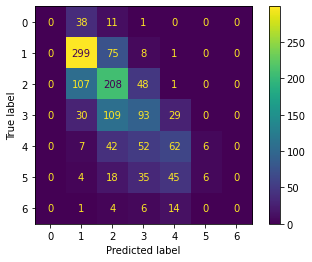

In [902]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim a ngram

In [903]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scal_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, gamma='auto')

In [904]:
y_pred_train = model.predict(X_train_combined_scal_out_svc)

In [905]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [906]:
y_pred = model.predict(X_test_combined_scal_out_svc)

In [907]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [908]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.28161764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.28      1.00      0.44       383
           2       0.00      0.00      0.00       364
           3       0.00      0.00      0.00       261
           4       0.00      0.00      0.00       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.28      1360
   macro avg       0.04      0.14      0.06      1360
weighted avg       0.08      0.28      0.12      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


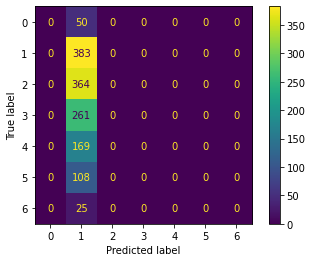

In [909]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim a tfidf n-gram

In [910]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scal_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, gamma='auto')

In [911]:
y_pred_train = model.predict(X_train_combined2_scal_out_svc)

In [912]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.48612862547288777
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.60      0.77      0.67       926
           2       0.42      0.58      0.49       861
           3       0.37      0.30      0.33       609
           4       0.48      0.39      0.43       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.49      3172
   macro avg       0.27      0.29      0.27      3172
weighted avg       0.42      0.49      0.45      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [913]:
y_pred = model.predict(X_test_combined2_scal_out_svc)

In [914]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [915]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.4772058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.61      0.77      0.68       383
           2       0.42      0.60      0.49       364
           3       0.35      0.29      0.32       261
           4       0.44      0.34      0.38       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.48      1360
   macro avg       0.26      0.29      0.27      1360
weighted avg       0.40      0.48      0.43      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


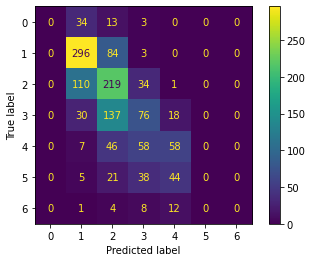

In [916]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim a word frequency

In [917]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_scal_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, gamma='auto')

In [918]:
y_pred_train = model.predict(X_train_combined3_scal_out_svc)

In [919]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [920]:
y_pred = model.predict(X_test_combined3_scal_out_svc)

In [921]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [922]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.34558823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.54      0.50      0.52       383
           2       0.28      0.75      0.40       364
           3       0.44      0.03      0.06       261
           4       0.00      0.00      0.00       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.35      1360
   macro avg       0.18      0.18      0.14      1360
weighted avg       0.31      0.35      0.26      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


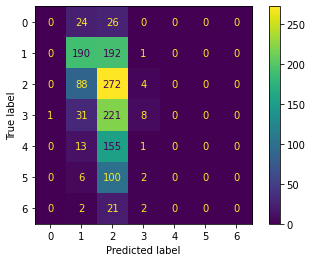

In [923]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

SVC - s osetrenim outlierov a so skalovanim a tfidf word frequency

In [924]:
model = SVC( **grid_search.best_params_)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_scal_out_svc, y_train)
# print("Najlepšie parametre:", grid_search.best_params_)
# print("Najlepšie skóre:", grid_search.best_score_)

SVC(C=100, gamma='auto')

In [925]:
y_pred_train = model.predict(X_train_combined4_scal_out_svc)

In [926]:
print("Presnosť:", accuracy_score(y_train, y_pred_train))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train))

Presnosť: 0.4703656998738966
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       142
           1       0.58      0.77      0.66       926
           2       0.40      0.56      0.47       861
           3       0.36      0.29      0.32       609
           4       0.47      0.30      0.37       393
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00        46

    accuracy                           0.47      3172
   macro avg       0.26      0.27      0.26      3172
weighted avg       0.41      0.47      0.43      3172



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [927]:
y_pred = model.predict(X_test_combined4_scal_out_svc)

In [928]:
results_list3_svc.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train),
    'accuracy_test': accuracy_score(y_test, y_pred),
    'precision_train': precision_score(y_train, y_pred_train, average='macro'),
    'precision_test': precision_score(y_test, y_pred, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train, average='macro'),
 'recall_test': recall_score(y_test, y_pred, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train, average='macro'),
 'f1_test': f1_score(y_test, y_pred, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [929]:
print("Presnosť:", accuracy_score(y_test, y_pred))
print("Klasifikačný report:\n", classification_report(y_test, y_pred))

Presnosť: 0.46838235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.59      0.77      0.67       383
           2       0.41      0.59      0.48       364
           3       0.35      0.30      0.32       261
           4       0.45      0.29      0.35       169
           5       0.00      0.00      0.00       108
           6       0.00      0.00      0.00        25

    accuracy                           0.47      1360
   macro avg       0.26      0.28      0.26      1360
weighted avg       0.40      0.47      0.42      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


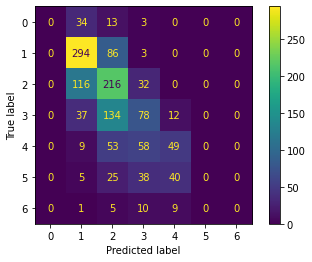

In [930]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix).plot()

In [931]:
results_svc3 = pd.DataFrame(results_list3_svc)
print(results_svc3)

    best_score  accuracy_train  accuracy_test  precision_train  \
0     0.398810        0.472257       0.406618         0.658409   
1          NaN        0.993064       0.363971         0.995571   
2          NaN        0.797289       0.437500         0.879013   
3          NaN        1.000000       0.396324         1.000000   
4          NaN        0.856557       0.436029         0.917502   
5     0.505052        0.574401       0.491176         0.727312   
6          NaN        1.000000       0.281618         1.000000   
7          NaN        0.486129       0.477206         0.267808   
8          NaN        1.000000       0.345588         1.000000   
9          NaN        0.470366       0.468382         0.259377   
10    0.391240        0.450189       0.380882         0.472673   
11         NaN        0.985813       0.368382         0.990185   
12         NaN        0.939786       0.436765         0.962340   
13         NaN        0.999685       0.402941         0.999846   
14        

Najlepšie výsledky sme dosiahli s verziou ošetrenie outlierov a s verziou ošetrenie outlierov a škálovaním. Dosiahli sme mierne zlepšenie oproti druhému testovaniu. Avšak mnoho verzií znížilo svoju presnosť, pretože sme nerobili na nich gridsearch a neboli to teda dobré parametre pre ne.

RANDOM FOREST - bez osetrenia outlierov a skalovania

In [932]:
results_list3_rf=[]

Určenie hyperparametrov, ktore budeme v grid search skúšať

In [933]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Počet stromov v lese
    'max_depth': [None, 10, 20, 30, 40],  # Maximálna hĺbka stromu
    'min_samples_split': [2, 5, 10],  # Minimálny počet vzoriek potrebný na rozdelenie uzla
    'min_samples_leaf': [1, 2, 4]  # Minimálny počet vzoriek potrebný v listovom uzle
}

Grid search - bude skúšať všetky kombinácie hyperparametrov a vyberie tie najlepšie pre accuracy

In [934]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Najlepší skóre: 0.41773268089122934


Predikovanie na trenovacich datach

In [935]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_rf)

In [936]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9114123581336696
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.24      0.39       142
           1       0.87      1.00      0.93       926
           2       0.91      0.98      0.94       861
           3       0.95      0.96      0.96       609
           4       0.94      0.89      0.92       393
           5       0.98      0.78      0.87       195
           6       1.00      0.02      0.04        46

    accuracy                           0.91      3172
   macro avg       0.95      0.70      0.72      3172
weighted avg       0.92      0.91      0.90      3172



Predikovanie na testovacich datach

In [937]:
y_pred_rf = best_rf_model.predict(X_test_rf)

In [938]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [939]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4022058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.57      0.63      0.59       383
           2       0.35      0.52      0.42       364
           3       0.27      0.25      0.26       261
           4       0.35      0.27      0.30       169
           5       0.33      0.04      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.41      0.25      0.24      1360
weighted avg       0.41      0.40      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

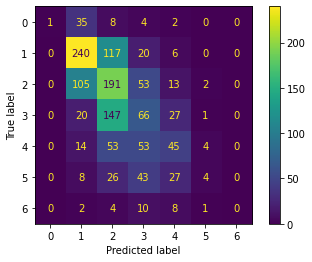

In [940]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - bez osetrenia outlierov a skalovania s ngram

In [941]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [942]:
y_pred_train_rf = model.predict(X_train_combined_rf)

In [943]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9511349306431274
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.54      0.70       142
           1       0.92      1.00      0.96       926
           2       0.95      1.00      0.98       861
           3       0.97      1.00      0.98       609
           4       0.97      0.96      0.96       393
           5       1.00      0.87      0.93       195
           6       1.00      0.04      0.08        46

    accuracy                           0.95      3172
   macro avg       0.97      0.77      0.80      3172
weighted avg       0.95      0.95      0.94      3172



In [944]:
y_pred_rf = model.predict(X_test_combined_rf)

In [945]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [946]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.41102941176470587
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.57      0.66      0.61       383
           2       0.35      0.57      0.43       364
           3       0.27      0.21      0.24       261
           4       0.35      0.22      0.27       169
           5       0.57      0.04      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.30      0.24      0.23      1360
weighted avg       0.40      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


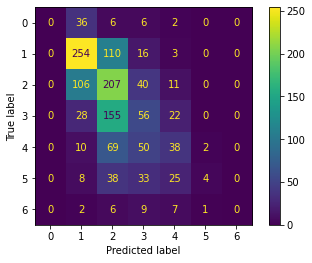

In [947]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - bez osetrenia outlierov a skalovania a tfidf gram

In [948]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [949]:
y_pred_train_rf = model.predict(X_train_combined2_rf)

In [950]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9709962168978562
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85       142
           1       0.94      1.00      0.97       926
           2       0.97      1.00      0.99       861
           3       0.99      1.00      0.99       609
           4       0.99      0.98      0.98       393
           5       1.00      0.93      0.96       195
           6       1.00      0.37      0.54        46

    accuracy                           0.97      3172
   macro avg       0.98      0.86      0.90      3172
weighted avg       0.97      0.97      0.97      3172



In [951]:
y_pred_rf = model.predict(X_test_combined2_rf)

In [952]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [953]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4102941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.56      0.72      0.63       383
           2       0.34      0.55      0.42       364
           3       0.26      0.17      0.21       261
           4       0.34      0.23      0.27       169
           5       0.40      0.02      0.04       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.27      0.24      0.22      1360
weighted avg       0.37      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


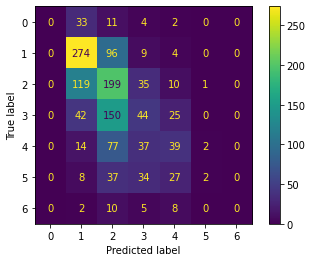

In [954]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - bez osetrenia outlierov a skalovania a word frequency

In [955]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [956]:
y_pred_train_rf = model.predict(X_train_combined3_rf)

In [957]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.944829760403531
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.41      0.58       142
           1       0.90      1.00      0.95       926
           2       0.94      1.00      0.97       861
           3       0.98      0.99      0.99       609
           4       0.97      0.95      0.96       393
           5       1.00      0.87      0.93       195
           6       1.00      0.09      0.16        46

    accuracy                           0.94      3172
   macro avg       0.97      0.76      0.79      3172
weighted avg       0.95      0.94      0.93      3172



In [958]:
y_pred_rf = model.predict(X_test_combined3_rf)

In [959]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [960]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.40955882352941175
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.56      0.69      0.62       383
           2       0.35      0.58      0.44       364
           3       0.28      0.19      0.22       261
           4       0.28      0.16      0.20       169
           5       0.27      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.25      0.24      0.22      1360
weighted avg       0.36      0.41      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


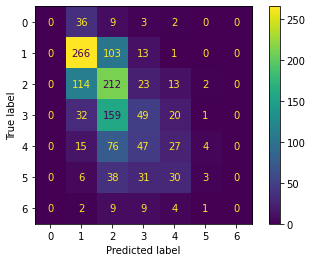

In [961]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - bez osetrenia outlierov a skalovania a tfidf word frequency

In [962]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [963]:
y_pred_train_rf = model.predict(X_train_combined4_rf)

In [964]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9627994955863808
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78       142
           1       0.93      1.00      0.96       926
           2       0.97      1.00      0.99       861
           3       0.98      1.00      0.99       609
           4       0.98      0.97      0.97       393
           5       1.00      0.91      0.95       195
           6       1.00      0.26      0.41        46

    accuracy                           0.96      3172
   macro avg       0.98      0.82      0.87      3172
weighted avg       0.96      0.96      0.96      3172



In [965]:
y_pred_rf = model.predict(X_test_combined4_rf)

In [966]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [967]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4088235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.55      0.72      0.62       383
           2       0.33      0.52      0.41       364
           3       0.29      0.20      0.24       261
           4       0.36      0.23      0.28       169
           5       0.25      0.02      0.03       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.25      0.24      0.23      1360
weighted avg       0.36      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


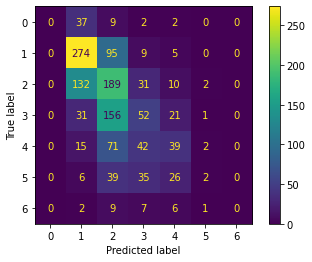

In [968]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov

In [969]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_out_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Najlepší skóre: 0.7295124071636157


In [970]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_out_rf)

In [971]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [972]:
y_pred_rf = best_rf_model.predict(X_test_out_rf)

In [973]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

In [974]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.7139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.10      0.18        50
           1       0.74      0.94      0.83       383
           2       0.69      0.81      0.74       364
           3       0.70      0.67      0.69       261
           4       0.68      0.57      0.62       169
           5       0.84      0.38      0.52       108
           6       1.00      0.04      0.08        25

    accuracy                           0.71      1360
   macro avg       0.81      0.50      0.52      1360
weighted avg       0.73      0.71      0.69      1360



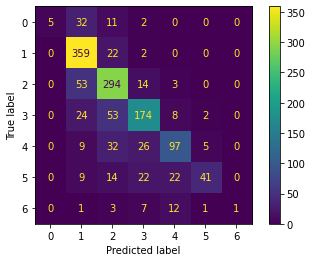

In [975]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov a ngram

In [976]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30)

In [977]:
y_pred_train_rf = model.predict(X_train_combined_out_rf)

In [978]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [979]:
y_pred_rf = model.predict(X_test_combined_out_rf)

In [980]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [981]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.6058823529411764
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.67      0.86      0.75       383
           2       0.54      0.77      0.64       364
           3       0.64      0.49      0.56       261
           4       0.54      0.44      0.48       169
           5       0.85      0.10      0.18       108
           6       0.00      0.00      0.00        25

    accuracy                           0.61      1360
   macro avg       0.46      0.38      0.37      1360
weighted avg       0.59      0.61      0.56      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


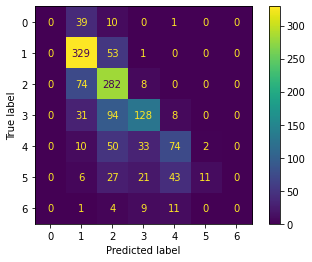

In [982]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov a tfidf ngram

In [983]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30)

In [984]:
y_pred_train_rf = model.predict(X_train_combined2_out_rf)

In [985]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [986]:
y_pred_rf = model.predict(X_test_combined2_out_rf)

In [987]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [988]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5235294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.61      0.87      0.71       383
           2       0.47      0.63      0.54       364
           3       0.44      0.33      0.38       261
           4       0.49      0.32      0.39       169
           5       0.69      0.08      0.15       108
           6       0.00      0.00      0.00        25

    accuracy                           0.52      1360
   macro avg       0.38      0.32      0.31      1360
weighted avg       0.50      0.52      0.48      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


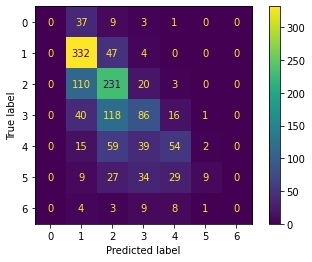

In [989]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov a word frequency

In [990]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30)

In [991]:
y_pred_train_rf = model.predict(X_train_combined3_out_rf)

In [992]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [993]:
y_pred_rf = model.predict(X_test_combined3_out_rf)

In [994]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [995]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.4963235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.62      0.84      0.72       383
           2       0.45      0.64      0.53       364
           3       0.37      0.30      0.33       261
           4       0.38      0.21      0.27       169
           5       0.31      0.04      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.50      1360
   macro avg       0.30      0.29      0.27      1360
weighted avg       0.44      0.50      0.45      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


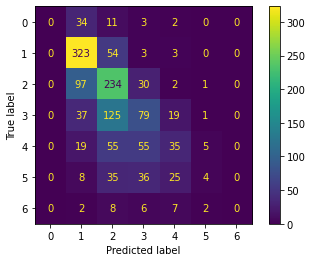

In [996]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenim outlierov a tfidf word frequency

In [997]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(max_depth=30)

In [998]:
y_pred_train_rf = model.predict(X_train_combined4_out_rf)

In [999]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1000]:
y_pred_rf = model.predict(X_test_combined4_out_rf)

In [1001]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1002]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5227941176470589
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.62      0.84      0.71       383
           2       0.47      0.66      0.55       364
           3       0.44      0.34      0.38       261
           4       0.50      0.33      0.40       169
           5       0.62      0.05      0.09       108
           6       0.00      0.00      0.00        25

    accuracy                           0.52      1360
   macro avg       0.38      0.32      0.30      1360
weighted avg       0.49      0.52      0.48      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


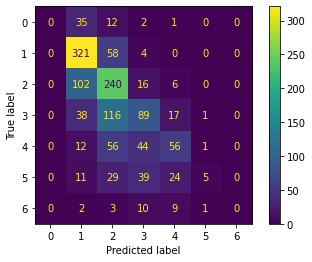

In [1003]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim

In [1004]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_scaled_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Najlepší skóre: 0.42183064656350133


In [1005]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_scaled_rf)

In [1006]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9987389659520807
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      0.96      0.98        46

    accuracy                           1.00      3172
   macro avg       1.00      0.99      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1007]:
y_pred_rf = best_rf_model.predict(X_test_scaled_rf)

In [1008]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1009]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.40955882352941175
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04        50
           1       0.57      0.64      0.61       383
           2       0.36      0.53      0.43       364
           3       0.28      0.25      0.26       261
           4       0.33      0.27      0.30       169
           5       0.26      0.05      0.08       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.40      0.25      0.25      1360
weighted avg       0.41      0.41      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


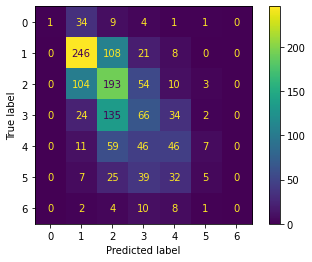

In [1010]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim a ngram

In [1011]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scaled_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [1012]:
y_pred_train_rf = model.predict(X_train_combined_scaled_rf)

In [1013]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1014]:
y_pred_rf = model.predict(X_test_combined_scaled_rf)

In [1015]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1016]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.40588235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.56      0.66      0.60       383
           2       0.35      0.53      0.42       364
           3       0.27      0.23      0.25       261
           4       0.34      0.25      0.29       169
           5       0.30      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.26      0.24      0.23      1360
weighted avg       0.37      0.41      0.37      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


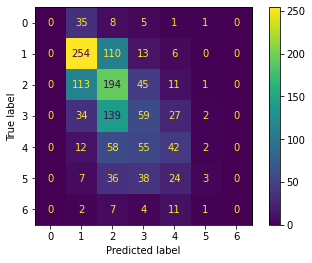

In [1017]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim a tfidf ngram

In [1018]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scaled_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [1019]:
y_pred_train_rf = model.predict(X_train_combined2_scaled_rf)

In [1020]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1021]:
y_pred_rf = model.predict(X_test_combined2_scaled_rf)

In [1022]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1023]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.39558823529411763
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.53      0.69      0.60       383
           2       0.32      0.50      0.39       364
           3       0.29      0.19      0.23       261
           4       0.33      0.22      0.26       169
           5       0.33      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.26      0.23      0.22      1360
weighted avg       0.36      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


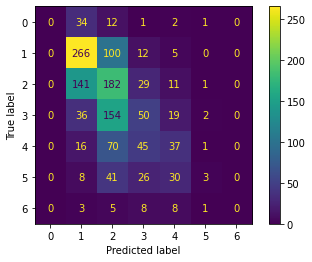

In [1024]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim a word frequency

In [1025]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_scaled_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [1026]:
y_pred_train_rf = model.predict(X_train_combined3_scaled_rf)

In [1027]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1028]:
y_pred_rf = model.predict(X_test_combined3_scaled_rf)

In [1029]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1030]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.3963235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.56      0.67      0.61       383
           2       0.32      0.54      0.40       364
           3       0.25      0.17      0.21       261
           4       0.36      0.23      0.28       169
           5       0.33      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.26      0.23      0.22      1360
weighted avg       0.36      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


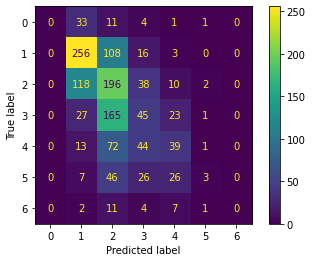

In [1031]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - so skalovanim a tfidf word frequency

In [1032]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_scaled_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [1033]:
y_pred_train_rf = model.predict(X_train_combined4_scaled_rf)

In [1034]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1035]:
y_pred_rf = model.predict(X_test_combined4_scaled_rf)

In [1036]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1037]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.40147058823529413
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.55      0.73      0.63       383
           2       0.33      0.50      0.40       364
           3       0.22      0.16      0.18       261
           4       0.38      0.24      0.29       169
           5       0.33      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.26      0.24      0.22      1360
weighted avg       0.36      0.40      0.36      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


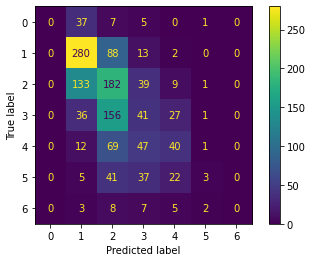

In [1038]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim

In [1039]:
model = RandomForestClassifier()
grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_rf.fit(X_train_scal_out_rf, y_train)
print("Najlepší hyperparametre:", grid_search_rf.best_params_)
print("Najlepší skóre:", grid_search_rf.best_score_)

Najlepší hyperparametre: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Najlepší skóre: 0.7266713033110608


In [1040]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train_scal_out_rf)

In [1041]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 0.9990542244640606
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      0.99      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1042]:
y_pred_rf = best_rf_model.predict(X_test_scal_out_rf)

In [1043]:
results_list3_rf.append({
        'best_score': grid_search_rf.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1044]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.7279411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.14      0.25        50
           1       0.75      0.94      0.83       383
           2       0.73      0.84      0.78       364
           3       0.69      0.68      0.68       261
           4       0.67      0.60      0.64       169
           5       0.86      0.35      0.50       108
           6       0.00      0.00      0.00        25

    accuracy                           0.73      1360
   macro avg       0.67      0.51      0.53      1360
weighted avg       0.73      0.73      0.70      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


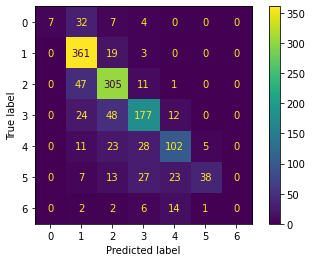

In [1045]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim a ngram

In [1046]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scal_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [1047]:
y_pred_train_rf = model.predict(X_train_combined_scal_out_rf)

In [1048]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1049]:
y_pred_rf = model.predict(X_test_combined_scal_out_rf)

In [1050]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1051]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.6132352941176471
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.68      0.88      0.77       383
           2       0.57      0.78      0.66       364
           3       0.61      0.51      0.56       261
           4       0.51      0.42      0.46       169
           5       1.00      0.07      0.14       108
           6       0.00      0.00      0.00        25

    accuracy                           0.61      1360
   macro avg       0.48      0.38      0.37      1360
weighted avg       0.60      0.61      0.57      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


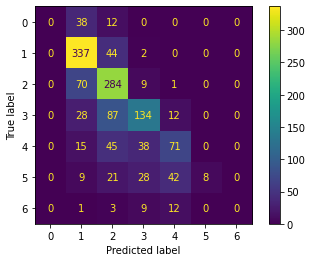

In [1052]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim a tfidf ngram

In [1053]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scal_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [1054]:
y_pred_train_rf = model.predict(X_train_combined2_scal_out_rf)

In [1055]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1056]:
y_pred_rf = model.predict(X_test_combined2_scal_out_rf)

In [1057]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1058]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5441176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.64      0.87      0.74       383
           2       0.49      0.70      0.57       364
           3       0.48      0.37      0.41       261
           4       0.47      0.32      0.38       169
           5       0.57      0.04      0.07       108
           6       0.00      0.00      0.00        25

    accuracy                           0.54      1360
   macro avg       0.38      0.33      0.31      1360
weighted avg       0.51      0.54      0.49      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


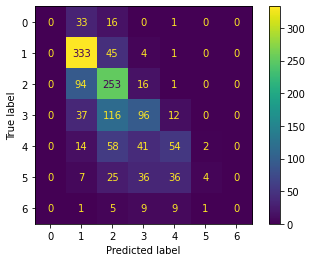

In [1059]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim a word frequency

In [1060]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_scal_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [1061]:
y_pred_train_rf = model.predict(X_train_combined3_scal_out_rf)

In [1062]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1063]:
y_pred_rf = model.predict(X_test_combined3_scal_out_rf)

In [1064]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1065]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5257352941176471
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.66      0.84      0.74       383
           2       0.47      0.69      0.56       364
           3       0.41      0.33      0.37       261
           4       0.44      0.28      0.35       169
           5       0.60      0.06      0.10       108
           6       0.00      0.00      0.00        25

    accuracy                           0.53      1360
   macro avg       0.37      0.31      0.30      1360
weighted avg       0.49      0.53      0.48      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


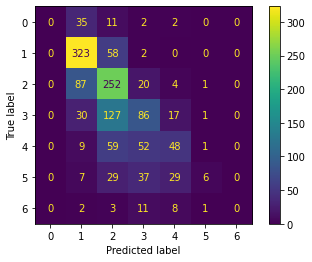

In [1066]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

RANDOM FOREST - s osetrenymi outliermi a skalovanim a tfidf word frequency

In [1067]:
model = RandomForestClassifier(**grid_search_rf.best_params_)
# grid_search_rf = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_scal_out_rf, y_train)
# print("Najlepší hyperparametre:", grid_search_rf.best_params_)
# print("Najlepší skóre:", grid_search_rf.best_score_)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [1068]:
y_pred_train_rf = model.predict(X_train_combined4_scal_out_rf)

In [1069]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_rf))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_rf))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1070]:
y_pred_rf = model.predict(X_test_combined4_scal_out_rf)

In [1071]:
results_list3_rf.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_rf),
    'accuracy_test': accuracy_score(y_test, y_pred_rf),
    'precision_train': precision_score(y_train, y_pred_train_rf, average='macro'),
    'precision_test': precision_score(y_test, y_pred_rf, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_rf, average='macro'),
 'recall_test': recall_score(y_test, y_pred_rf, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_rf, average='macro'),
 'f1_test': f1_score(y_test, y_pred_rf, average='macro')
        
    })


/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1072]:
print("Presnosť:", accuracy_score(y_test, y_pred_rf))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_rf))

Presnosť: 0.5316176470588235
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.64      0.87      0.74       383
           2       0.48      0.67      0.56       364
           3       0.43      0.34      0.38       261
           4       0.47      0.32      0.38       169
           5       0.60      0.03      0.05       108
           6       0.00      0.00      0.00        25

    accuracy                           0.53      1360
   macro avg       0.37      0.32      0.30      1360
weighted avg       0.50      0.53      0.48      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


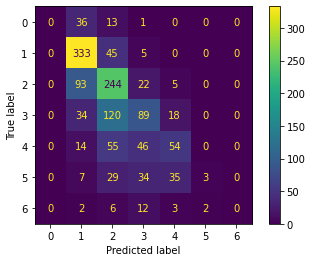

In [1073]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(matrix_rf).plot()

In [1074]:
results_rf3 = pd.DataFrame(results_list3_rf)
print(results_rf3)

    best_score  accuracy_train  accuracy_test  precision_train  \
0     0.417733        0.911412       0.402206         0.949822   
1          NaN        0.951135       0.411029         0.972675   
2          NaN        0.970996       0.410294         0.984776   
3          NaN        0.944830       0.409559         0.971094   
4          NaN        0.962799       0.408824         0.980044   
5     0.729512        1.000000       0.713971         1.000000   
6          NaN        1.000000       0.605882         1.000000   
7          NaN        1.000000       0.523529         1.000000   
8          NaN        1.000000       0.496324         1.000000   
9          NaN        1.000000       0.522794         1.000000   
10    0.421831        0.998739       0.409559         0.999386   
11         NaN        1.000000       0.405882         1.000000   
12         NaN        1.000000       0.395588         1.000000   
13         NaN        1.000000       0.396324         1.000000   
14        

Najlepšie výsledky sme dosiahli s verziou ošetrenie outlierov a škálovaním. Dosiahli sme podobnú presnosť ako v druhom testovaní. Avšak mnoho verzií znížilo svoju presnosť, pretože sme nerobili na nich gridsearch a neboli to teda dobré parametre pre ne.

GRADIENT BOOSTING CLASSIFIER - bez osetrenia outlierov a skalovania

In [1075]:
results_list3_gbm=[]

Určenie hyperparametrov, ktore budeme v grid search skúšať

In [1076]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Počet stromov v lese
    'max_depth': [None, 10, 20, 30, 40],  # Maximálna hĺbka stromu
    'min_samples_split': [2, 5, 10],  # Minimálny počet vzoriek potrebný na rozdelenie uzla
    'min_samples_leaf': [1, 2, 4]  # Minimálny počet vzoriek potrebný v listovom uzle
}

Grid search - vyskuša všetky kombinacie hyperparametrov a vyberie najlepší z nich podľa accuracy

In [1077]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Najlepší skóre: 0.4038535482749199


Predikovanie na trenovacich datach

In [1078]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_gbm)

In [1079]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



Predikovanie na testovacich datach

In [1080]:
y_pred_gbm = best_gbm_model.predict(X_test_gbm)

In [1081]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1082]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4161764705882353
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.22      0.04      0.07        50
           1       0.55      0.63      0.59       383
           2       0.35      0.49      0.41       364
           3       0.34      0.35      0.35       261
           4       0.37      0.24      0.29       169
           5       0.39      0.13      0.19       108
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.32      0.27      0.27      1360
weighted avg       0.40      0.42      0.40      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vizualizácia výkonnosti modelu

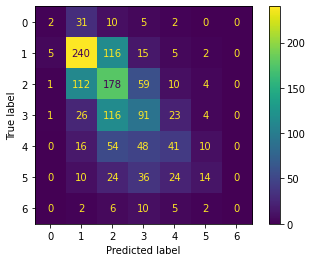

In [1083]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - bez osetrenia outlierov a skalovania a ngram

In [1084]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=30, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200)

In [1085]:
y_pred_train_gbm = model.predict(X_train_combined_gbm)

In [1086]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1087]:
y_pred_gbm = model.predict(X_test_combined_gbm)

In [1088]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1089]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4117647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.25      0.04      0.07        50
           1       0.55      0.70      0.62       383
           2       0.34      0.46      0.39       364
           3       0.33      0.26      0.29       261
           4       0.35      0.30      0.32       169
           5       0.17      0.06      0.08       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.28      0.26      0.25      1360
weighted avg       0.38      0.41      0.38      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


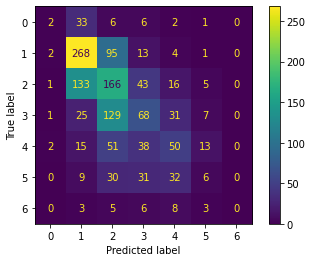

In [1090]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - bez osetrenia outlierov a skalovania a tfidf ngram

In [1091]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=30, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200)

In [1092]:
y_pred_train_gbm = model.predict(X_train_combined2_gbm)

In [1093]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1094]:
y_pred_gbm = model.predict(X_test_combined2_gbm)

In [1095]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1096]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.19      0.06      0.09        50
           1       0.54      0.73      0.62       383
           2       0.35      0.43      0.39       364
           3       0.28      0.24      0.26       261
           4       0.29      0.22      0.25       169
           5       0.26      0.07      0.12       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.27      0.25      0.25      1360
weighted avg       0.36      0.40      0.37      1360



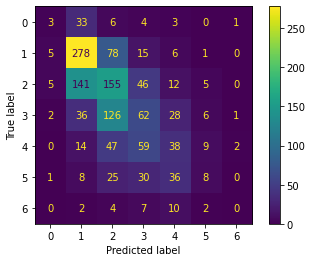

In [1097]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - bez osetrenia outlierov a skalovania a word frequency

In [1098]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=30, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200)

In [1099]:
y_pred_train_gbm = model.predict(X_train_combined3_gbm)

In [1100]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1101]:
y_pred_gbm = model.predict(X_test_combined3_gbm)

In [1102]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1103]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4183823529411765
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.50      0.08      0.14        50
           1       0.56      0.72      0.63       383
           2       0.35      0.46      0.40       364
           3       0.31      0.28      0.30       261
           4       0.32      0.21      0.26       169
           5       0.32      0.10      0.15       108
           6       0.33      0.08      0.13        25

    accuracy                           0.42      1360
   macro avg       0.39      0.28      0.29      1360
weighted avg       0.40      0.42      0.39      1360



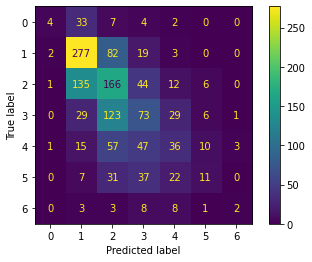

In [1104]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - bez osetrenia outlierov a skalovania a tfidf word frequency

In [1105]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=30, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200)

In [1106]:
y_pred_train_gbm = model.predict(X_train_combined4_gbm)

In [1107]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1108]:
y_pred_gbm = model.predict(X_test_combined4_gbm)

In [1109]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1110]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4088235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.11      0.02      0.03        50
           1       0.54      0.72      0.62       383
           2       0.36      0.45      0.40       364
           3       0.29      0.25      0.27       261
           4       0.32      0.24      0.27       169
           5       0.33      0.12      0.18       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.28      0.26      0.25      1360
weighted avg       0.37      0.41      0.38      1360



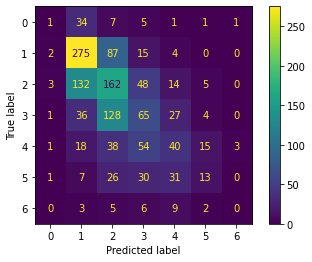

In [1111]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov

In [1113]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_out_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Najlepší skóre: 0.819047169576989


In [1114]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_out_gbm)

In [1115]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1116]:
y_pred_gbm = best_gbm_model.predict(X_test_out_gbm)

In [1117]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1118]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.8022058823529412
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.97      0.56      0.71        50
           1       0.82      0.93      0.87       383
           2       0.79      0.87      0.83       364
           3       0.80      0.79      0.79       261
           4       0.75      0.67      0.71       169
           5       0.78      0.58      0.67       108
           6       1.00      0.32      0.48        25

    accuracy                           0.80      1360
   macro avg       0.84      0.67      0.72      1360
weighted avg       0.81      0.80      0.80      1360



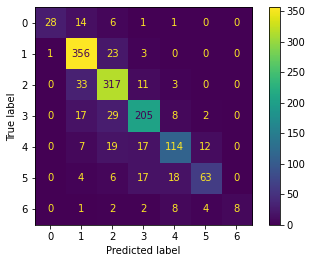

In [1119]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a ngram

In [1120]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [1121]:
y_pred_train_gbm = model.predict(X_train_combined_out_gbm)

In [1122]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1123]:
y_pred_gbm = model.predict(X_test_combined_out_gbm)

In [1124]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1125]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7867647058823529
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.91      0.40      0.56        50
           1       0.81      0.93      0.87       383
           2       0.76      0.88      0.81       364
           3       0.80      0.76      0.78       261
           4       0.74      0.65      0.69       169
           5       0.81      0.54      0.64       108
           6       0.83      0.20      0.32        25

    accuracy                           0.79      1360
   macro avg       0.81      0.62      0.67      1360
weighted avg       0.79      0.79      0.78      1360



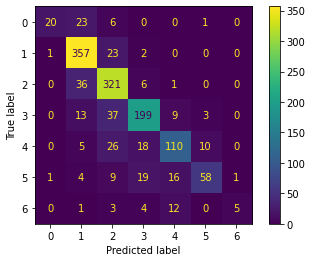

In [1126]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a tfidf ngram

In [1127]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [1128]:
y_pred_train_gbm = model.predict(X_train_combined2_out_gbm)

In [1129]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1130]:
y_pred_gbm = model.predict(X_test_combined2_out_gbm)

In [1131]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1132]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7676470588235295
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.91      0.40      0.56        50
           1       0.79      0.92      0.85       383
           2       0.76      0.81      0.79       364
           3       0.75      0.76      0.76       261
           4       0.71      0.69      0.70       169
           5       0.81      0.54      0.64       108
           6       0.50      0.12      0.19        25

    accuracy                           0.77      1360
   macro avg       0.75      0.61      0.64      1360
weighted avg       0.77      0.77      0.76      1360



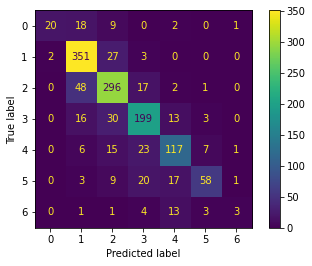

In [1133]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a word frequency

In [1134]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [1135]:
y_pred_train_gbm = model.predict(X_train_combined3_out_gbm)

In [1136]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1137]:
y_pred_gbm = model.predict(X_test_combined3_out_gbm)

In [1138]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1139]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7926470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.92      0.44      0.59        50
           1       0.83      0.92      0.87       383
           2       0.77      0.87      0.82       364
           3       0.78      0.82      0.80       261
           4       0.77      0.68      0.72       169
           5       0.77      0.52      0.62       108
           6       0.57      0.16      0.25        25

    accuracy                           0.79      1360
   macro avg       0.77      0.63      0.67      1360
weighted avg       0.79      0.79      0.78      1360



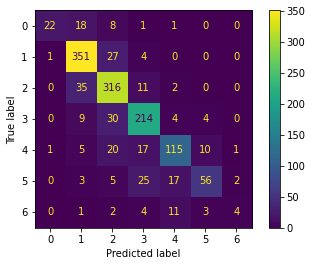

In [1140]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a tfidf word frequency

In [1141]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [1142]:
y_pred_train_gbm = model.predict(X_train_combined4_out_gbm)

In [1143]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1144]:
y_pred_gbm = model.predict(X_test_combined4_out_gbm)

In [1145]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1146]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7779411764705882
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.94      0.34      0.50        50
           1       0.81      0.92      0.86       383
           2       0.76      0.83      0.79       364
           3       0.76      0.79      0.78       261
           4       0.75      0.70      0.72       169
           5       0.78      0.52      0.62       108
           6       0.67      0.16      0.26        25

    accuracy                           0.78      1360
   macro avg       0.78      0.61      0.65      1360
weighted avg       0.78      0.78      0.77      1360



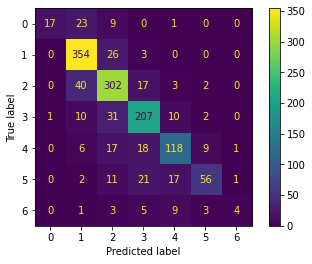

In [1147]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim

In [1148]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_scaled_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Najlepší skóre: 0.4041704960381529


In [1149]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_scaled_gbm)

In [1150]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1151]:
y_pred_gbm = best_gbm_model.predict(X_test_scaled_gbm)

In [1152]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1153]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.39705882352941174
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.14      0.02      0.04        50
           1       0.55      0.60      0.57       383
           2       0.35      0.51      0.41       364
           3       0.31      0.29      0.30       261
           4       0.34      0.24      0.28       169
           5       0.26      0.07      0.12       108
           6       0.00      0.00      0.00        25

    accuracy                           0.40      1360
   macro avg       0.28      0.25      0.24      1360
weighted avg       0.37      0.40      0.37      1360



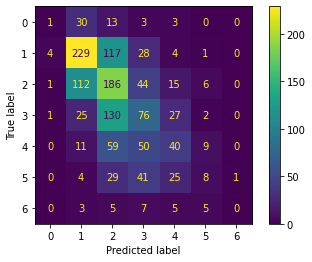

In [1154]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a ngram

In [1155]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scaled_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=200)

In [1156]:
y_pred_train_gbm = model.predict(X_train_combined_scaled_gbm)

In [1157]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1158]:
y_pred_gbm = model.predict(X_test_combined_scaled_gbm)

In [1159]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1160]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4139705882352941
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.25      0.02      0.04        50
           1       0.57      0.66      0.61       383
           2       0.37      0.50      0.42       364
           3       0.30      0.29      0.30       261
           4       0.33      0.26      0.29       169
           5       0.22      0.08      0.12       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.29      0.26      0.25      1360
weighted avg       0.39      0.41      0.39      1360



/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/danielap/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


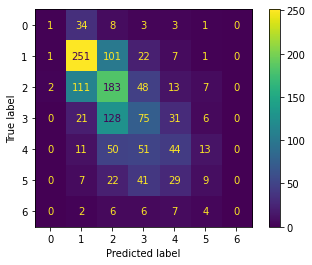

In [1161]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a tfidf ngram

In [1162]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scaled_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=200)

In [1163]:
y_pred_train_gbm = model.predict(X_train_combined2_scaled_gbm)

In [1164]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1165]:
y_pred_gbm = model.predict(X_test_combined2_scaled_gbm)

In [1166]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1167]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.41102941176470587
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.12      0.06      0.08        50
           1       0.57      0.71      0.63       383
           2       0.40      0.35      0.38       364
           3       0.30      0.36      0.33       261
           4       0.31      0.31      0.31       169
           5       0.23      0.09      0.13       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.28      0.27      0.27      1360
weighted avg       0.39      0.41      0.39      1360



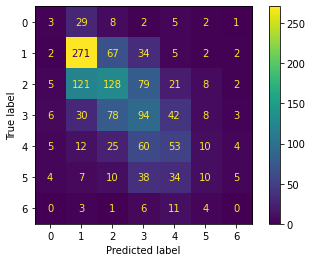

In [1168]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a word frequency

In [1169]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_scaled_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=200)

In [1170]:
y_pred_train_gbm = model.predict(X_train_combined3_scaled_gbm)

In [1171]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1172]:
y_pred_gbm = model.predict(X_test_combined3_scaled_gbm)

In [1173]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })


In [1174]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4051470588235294
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.17      0.04      0.06        50
           1       0.62      0.60      0.61       383
           2       0.39      0.46      0.42       364
           3       0.29      0.34      0.31       261
           4       0.28      0.33      0.30       169
           5       0.26      0.08      0.13       108
           6       0.00      0.00      0.00        25

    accuracy                           0.41      1360
   macro avg       0.29      0.26      0.26      1360
weighted avg       0.40      0.41      0.39      1360



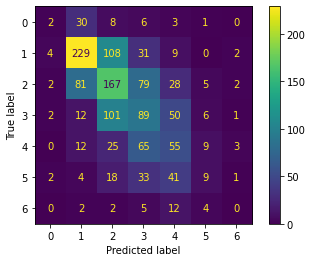

In [1175]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - so skalovanim a tfidf word frequency

In [1176]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_scaled_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=200)

In [1177]:
y_pred_train_gbm = model.predict(X_train_combined4_scaled_gbm)

In [1178]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1179]:
y_pred_gbm = model.predict(X_test_combined4_scaled_gbm)

In [1180]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })


In [1181]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.4227941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.17      0.06      0.09        50
           1       0.61      0.67      0.64       383
           2       0.41      0.43      0.42       364
           3       0.31      0.37      0.34       261
           4       0.30      0.32      0.31       169
           5       0.24      0.07      0.11       108
           6       0.00      0.00      0.00        25

    accuracy                           0.42      1360
   macro avg       0.29      0.27      0.27      1360
weighted avg       0.40      0.42      0.41      1360



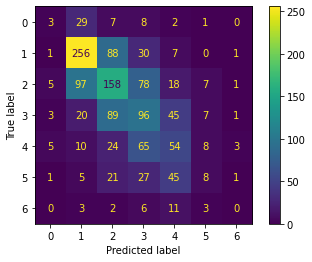

In [1182]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a skalovanim

In [1183]:
model = GradientBoostingClassifier()
grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
grid_search_gbm.fit(X_train_scal_out_gbm, y_train)
print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
print("Najlepší skóre:", grid_search_gbm.best_score_)

Najlepší hyperparametre: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Najlepší skóre: 0.8203050249633623


In [1184]:
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_train_gbm = best_gbm_model.predict(X_train_scal_out_gbm)

In [1185]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1186]:
y_pred_gbm = best_gbm_model.predict(X_test_scal_out_gbm)

In [1187]:
results_list3_gbm.append({
        'best_score': grid_search_gbm.best_score_,
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1188]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.8044117647058824
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.97      0.56      0.71        50
           1       0.81      0.93      0.86       383
           2       0.80      0.87      0.83       364
           3       0.83      0.80      0.81       261
           4       0.74      0.67      0.71       169
           5       0.80      0.58      0.67       108
           6       1.00      0.32      0.48        25

    accuracy                           0.80      1360
   macro avg       0.85      0.68      0.73      1360
weighted avg       0.81      0.80      0.80      1360



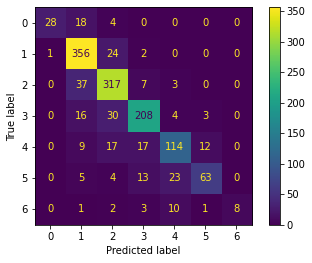

In [1189]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a skalovanim a ngram

In [1190]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined_scal_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [1191]:
y_pred_train_gbm = model.predict(X_train_combined_scal_out_gbm)

In [1192]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1193]:
y_pred_gbm = model.predict(X_test_combined_scal_out_gbm)

In [1194]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1195]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7852941176470588
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.91      0.42      0.58        50
           1       0.81      0.93      0.87       383
           2       0.76      0.86      0.81       364
           3       0.79      0.77      0.78       261
           4       0.76      0.65      0.70       169
           5       0.81      0.55      0.65       108
           6       0.56      0.20      0.29        25

    accuracy                           0.79      1360
   macro avg       0.77      0.63      0.67      1360
weighted avg       0.79      0.79      0.78      1360



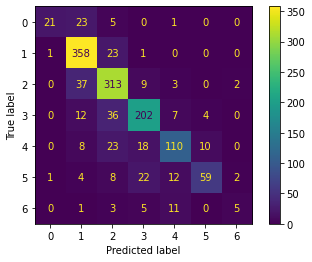

In [1196]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a skalovanim a tfidf ngram

In [1197]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined2_scal_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [1198]:
y_pred_train_gbm = model.predict(X_train_combined2_scal_out_gbm)

In [1199]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1200]:
y_pred_gbm = model.predict(X_test_combined2_scal_out_gbm)

In [1201]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })

In [1202]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7713235294117647
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.79      0.38      0.51        50
           1       0.79      0.91      0.84       383
           2       0.79      0.82      0.80       364
           3       0.77      0.78      0.77       261
           4       0.72      0.70      0.71       169
           5       0.73      0.54      0.62       108
           6       0.62      0.20      0.30        25

    accuracy                           0.77      1360
   macro avg       0.75      0.62      0.65      1360
weighted avg       0.77      0.77      0.76      1360



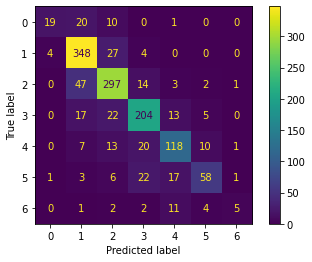

In [1203]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a skalovanim a word frequency

In [1204]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined3_scal_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [1205]:
y_pred_train_gbm = model.predict(X_train_combined3_scal_out_gbm)

In [1206]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1207]:
y_pred_gbm = model.predict(X_test_combined3_scal_out_gbm)

In [1208]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })


In [1209]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7985294117647059
Klasifikačný report:
               precision    recall  f1-score   support

           0       0.89      0.48      0.62        50
           1       0.85      0.93      0.89       383
           2       0.79      0.86      0.82       364
           3       0.76      0.84      0.80       261
           4       0.77      0.64      0.70       169
           5       0.78      0.57      0.66       108
           6       0.50      0.12      0.19        25

    accuracy                           0.80      1360
   macro avg       0.76      0.63      0.67      1360
weighted avg       0.79      0.80      0.79      1360



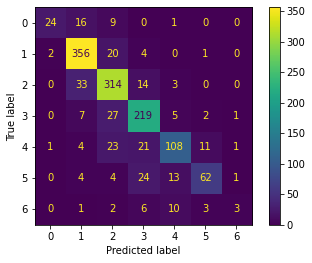

In [1210]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

GRADIENT BOOSTING CLASSIFIER - s osetrenim outlierov a skalovanim a tfidf word frequency

In [1211]:
model = GradientBoostingClassifier(**grid_search_gbm.best_params_)
# grid_search_gbm = GridSearchCV(model, param_grid,  cv=5, scoring='accuracy', n_jobs=8)
model.fit(X_train_combined4_scal_out_gbm, y_train)
# print("Najlepší hyperparametre:", grid_search_gbm.best_params_)
# print("Najlepší skóre:", grid_search_gbm.best_score_)

GradientBoostingClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200)

In [1212]:
y_pred_train_gbm = model.predict(X_train_combined4_scal_out_gbm)

In [1213]:
print("Presnosť:", accuracy_score(y_train, y_pred_train_gbm))
print("Klasifikačný report:\n", classification_report(y_train, y_pred_train_gbm))

Presnosť: 1.0
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00       861
           3       1.00      1.00      1.00       609
           4       1.00      1.00      1.00       393
           5       1.00      1.00      1.00       195
           6       1.00      1.00      1.00        46

    accuracy                           1.00      3172
   macro avg       1.00      1.00      1.00      3172
weighted avg       1.00      1.00      1.00      3172



In [1214]:
y_pred_gbm = model.predict(X_test_combined4_scal_out_gbm)

In [1215]:
results_list3_gbm.append({
        'accuracy_train': accuracy_score(y_train, y_pred_train_gbm),
    'accuracy_test': accuracy_score(y_test, y_pred_gbm),
    'precision_train': precision_score(y_train, y_pred_train_gbm, average='macro'),
    'precision_test': precision_score(y_test, y_pred_gbm, average='macro'),
 'recall_train': recall_score(y_train, y_pred_train_gbm, average='macro'),
 'recall_test': recall_score(y_test, y_pred_gbm, average='macro'),
 'f1_train': f1_score(y_train, y_pred_train_gbm, average='macro'),
 'f1_test': f1_score(y_test, y_pred_gbm, average='macro')
        
    })


In [1216]:
print("Presnosť:", accuracy_score(y_test, y_pred_gbm))
print("Klasifikačný report:\n", classification_report(y_test, y_pred_gbm))

Presnosť: 0.7823529411764706
Klasifikačný report:
               precision    recall  f1-score   support

           0       1.00      0.36      0.53        50
           1       0.83      0.93      0.87       383
           2       0.76      0.84      0.79       364
           3       0.76      0.79      0.78       261
           4       0.75      0.69      0.72       169
           5       0.76      0.55      0.63       108
           6       0.67      0.16      0.26        25

    accuracy                           0.78      1360
   macro avg       0.79      0.62      0.66      1360
weighted avg       0.78      0.78      0.77      1360



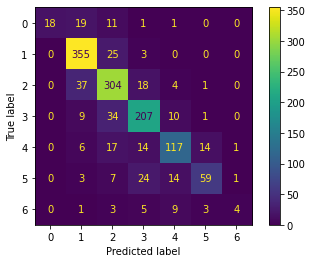

In [1217]:
matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
ConfusionMatrixDisplay(matrix_gbm).plot()

In [1218]:
results_gbm3 = pd.DataFrame(results_list3_gbm)
print(results_gbm3)

    best_score  accuracy_train  accuracy_test  precision_train  \
0     0.403854             1.0       0.416176              1.0   
1          NaN             1.0       0.411765              1.0   
2          NaN             1.0       0.400000              1.0   
3          NaN             1.0       0.418382              1.0   
4          NaN             1.0       0.408824              1.0   
5     0.819047             1.0       0.802206              1.0   
6          NaN             1.0       0.786765              1.0   
7          NaN             1.0       0.767647              1.0   
8          NaN             1.0       0.792647              1.0   
9          NaN             1.0       0.777941              1.0   
10    0.404170             1.0       0.397059              1.0   
11         NaN             1.0       0.413971              1.0   
12         NaN             1.0       0.411029              1.0   
13         NaN             1.0       0.405147              1.0   
14        

Najlepšie výsledky sme dosiahli s verziou ošetrenie outlierov a škálovaním. Dosiahli sme mierne zhoršenie oproti druhému testovaniu kvôli tomu, že sa model preučil. Mnoho verzií znížilo svoju presnosť, pretože sme nerobili na nich gridsearch a neboli to teda dobré parametre pre ne.

In [1219]:
row_names = ['bez osetrenia outlierov a skalovania', 'bez osetrenia outlierov a skalovania s ngramami', 'bez osetrenia outlierov a skalovania s tfidf ngramami', 'bez osetrenia outlierov a skalovania s word frequency', 'bez osetrenia outlierov a skalovania s tfidf word frequency', 's osetrenim outlierov', 's osetrenim outlierov a s ngramami', 's osetrenim outlierov a s tfidf ngramami', 's osetrenim outlierov a s word frequency', 's osetrenim outlierov a s tfidf word frequency', 'so skalovanim','so skalovanim a s ngramami','so skalovanim a s tfidf ngramami', 'so skalovanim a s word frequency','so skalovanim a s tfidf word frequency','s osetrenim outlierov a skalovanim','s osetrenim outlierov a skalovanim a s ngramami','s osetrenim outlierov a skalovanim a s tfidf ngramami', 's osetrenim outlierov a skalovanim a s word frequency','s osetrenim outlierov a skalovanim a s tfidf word frequency']  # Zoznam by mal obsahovať meno pre každý riadok

# Priradenie zoznamu mien do indexu DataFrame
results_svc1.index = row_names
results_svc2.index = row_names
results_svc3.index = row_names

results_rf1.index = row_names
results_rf2.index = row_names
results_rf3.index = row_names

results_gbm1.index = row_names
results_gbm2.index = row_names
results_gbm3.index = row_names

OHODNOTENIE

Podľa výsledkov nižšie môžeme vidieť, že najlepšie výsledky nám poskytol model Gradient Boosting Maschine a to s verziami datasetu, kde boli ošetrený outlieri a nebol dataset spojený so žiadnymi textovými reprezentáciami (ngram, tfidf ngram). Podľa tabuliek vidíme, že ošetrenie outlierov malo naväčší vplyv na accuracy. Naopak najhoršie výsledky mal čistý dataset bez ošetrenia outlierov a škálovania a bez pridania textových reprezentácií vo všetkých modeloch. Najhorší model na určovanie vekovej skupiny v mojej práci bol SVC, tým sa nám najmenšie accuracy podarilo dosiahnúť.

In [1220]:
results_svc1

accuracy_train  \
bez osetrenia outlierov a skalovania                      0.338903   
bez osetrenia outlierov a skalovania s ngramami           0.370429   
bez osetrenia outlierov a skalovania s tfidf ng...        0.337642   
bez osetrenia outlierov a skalovania s word fre...        0.371690   
bez osetrenia outlierov a skalovania s tfidf wo...        0.337642   
s osetrenim outlierov                                     0.343632   
s osetrenim outlierov a s ngramami                        0.373581   
s osetrenim outlierov a s tfidf ngramami                  0.342371   
s osetrenim outlierov a s word frequency                  0.374842   
s osetrenim outlierov a s tfidf word frequency            0.342371   
so skalovanim                                             0.337642   
so skalovanim a s ngramami                                0.370429   
so skalovanim a s tfidf ngramami                          0.337327   
so skalovanim a s word frequency                          0.371375   
so skalovanim a s tfidf word frequency                    0.337327   
s osetrenim outlierov a skalovanim                        0.343632   
s osetrenim outlierov a skalovanim a s ngramami           0.373581   
s osetrenim outlierov a skalovanim a s tfidf ng...        0.342371   
s osetrenim outlierov a skalovanim a s word fre...        0.374842   
s osetrenim outlierov a skalovanim a s tfidf wo...        0.342371   

                                                    accuracy_test  \
bez osetrenia outlierov a skalovania                     0.316176   
bez osetrenia outlierov a skalovania s ngramami          0.347059   
bez osetrenia outlierov a skalovania s tfidf ng...       0.316176   
bez osetrenia outlierov a skalovania s word fre...       0.347794   
bez osetrenia outlierov a skalovania s tfidf wo...       0.316176   
s osetrenim outlierov                                    0.320588   
s osetrenim outlierov a s ngramami                       0.352941   
s osetrenim outlierov a s tfidf ngramami                 0.320588   
s osetrenim outlierov a s word frequency                 0.351471   
s osetrenim outlierov a s tfidf word frequency           0.320588   
so skalovanim                                            0.313971   
so skalovanim a s ngramami                               0.345588   
so skalovanim a s tfidf ngramami                         0.313235   
so skalovanim a s word frequency                         0.345588   
so skalovanim a s tfidf word frequency                   0.313235   
s osetrenim outlierov a skalovanim                       0.320588   
s osetrenim outlierov a skalovanim a s ngramami          0.352941   
s osetrenim outlierov a skalovanim a s tfidf ng...       0.320588   
s osetrenim outlierov a skalovanim a s word fre...       0.351471   
s osetrenim outlierov a skalovanim a s tfidf wo...       0.320588   

                                                    precision_train  \
bez osetrenia outlierov a skalovania                       0.174536   
bez osetrenia outlierov a skalovania s ngramami            0.215987   
bez osetrenia outlierov a skalovania s tfidf ng...         0.170199   
bez osetrenia outlierov a skalovania s word fre...         0.213779   
bez osetrenia outlierov a skalovania s tfidf wo...         0.170199   
s osetrenim outlierov                                      0.177808   
s osetrenim outlierov a s ngramami                         0.217219   
s osetrenim outlierov a s tfidf ngramami                   0.178003   
s osetrenim outlierov a s word frequency                   0.214520   
s osetrenim outlierov a s tfidf word frequency             0.178003   
so skalovanim                                              0.172529   
so skalovanim a s ngramami                                 0.215705   
so skalovanim a s tfidf ngramami                           0.170488   
so skalovanim a s word frequency                           0.214781   
so skalovanim a s tfidf word frequency                     0.17062

In [1221]:
results_svc2

accuracy_train  \
bez osetrenia outlierov a skalovania                      0.380202   
bez osetrenia outlierov a skalovania s ngramami           0.454288   
bez osetrenia outlierov a skalovania s tfidf ng...        0.380202   
bez osetrenia outlierov a skalovania s word fre...        0.473834   
bez osetrenia outlierov a skalovania s tfidf wo...        0.380202   
s osetrenim outlierov                                     0.501576   
s osetrenim outlierov a s ngramami                        0.453972   
s osetrenim outlierov a s tfidf ngramami                  0.499685   
s osetrenim outlierov a s word frequency                  0.473518   
s osetrenim outlierov a s tfidf word frequency            0.502837   
so skalovanim                                             0.368222   
so skalovanim a s ngramami                                0.453972   
so skalovanim a s tfidf ngramami                          0.387137   
so skalovanim a s word frequency                          0.473518   
so skalovanim a s tfidf word frequency                    0.389660   
s osetrenim outlierov a skalovanim                        0.501576   
s osetrenim outlierov a skalovanim a s ngramami           0.453972   
s osetrenim outlierov a skalovanim a s tfidf ng...        0.499685   
s osetrenim outlierov a skalovanim a s word fre...        0.473518   
s osetrenim outlierov a skalovanim a s tfidf wo...        0.502837   

                                                    accuracy_test  \
bez osetrenia outlierov a skalovania                     0.353676   
bez osetrenia outlierov a skalovania s ngramami          0.408088   
bez osetrenia outlierov a skalovania s tfidf ng...       0.350000   
bez osetrenia outlierov a skalovania s word fre...       0.400000   
bez osetrenia outlierov a skalovania s tfidf wo...       0.350000   
s osetrenim outlierov                                    0.477941   
s osetrenim outlierov a s ngramami                       0.408088   
s osetrenim outlierov a s tfidf ngramami                 0.490441   
s osetrenim outlierov a s word frequency                 0.400000   
s osetrenim outlierov a s tfidf word frequency           0.491912   
so skalovanim                                            0.360294   
so skalovanim a s ngramami                               0.407353   
so skalovanim a s tfidf ngramami                         0.373529   
so skalovanim a s word frequency                         0.400000   
so skalovanim a s tfidf word frequency                   0.372794   
s osetrenim outlierov a skalovanim                       0.477941   
s osetrenim outlierov a skalovanim a s ngramami          0.408088   
s osetrenim outlierov a skalovanim a s tfidf ng...       0.490441   
s osetrenim outlierov a skalovanim a s word fre...       0.400000   
s osetrenim outlierov a skalovanim a s tfidf wo...       0.491912   

                                                    precision_train  \
bez osetrenia outlierov a skalovania                       0.202892   
bez osetrenia outlierov a skalovania s ngramami            0.508908   
bez osetrenia outlierov a skalovania s tfidf ng...         0.194931   
bez osetrenia outlierov a skalovania s word fre...         0.547967   
bez osetrenia outlierov a skalovania s tfidf wo...         0.195258   
s osetrenim outlierov                                      0.280318   
s osetrenim outlierov a s ngramami                         0.505843   
s osetrenim outlierov a s tfidf ngramami                   0.278290   
s osetrenim outlierov a s word frequency                   0.547877   
s osetrenim outlierov a s tfidf word frequency             0.280757   
so skalovanim                                              0.214714   
so skalovanim a s ngramami                                 0.505843   
so skalovanim a s tfidf ngramami                           0.222616   
so skalovanim a s word frequency                           0.547877   
so skalovanim a s tfidf word frequency                     0.15237

In [1222]:
results_svc3

best_score  \
bez osetrenia outlierov a skalovania                  0.398810   
bez osetrenia outlierov a skalovania s ngramami            NaN   
bez osetrenia outlierov a skalovania s tfidf ng...         NaN   
bez osetrenia outlierov a skalovania s word fre...         NaN   
bez osetrenia outlierov a skalovania s tfidf wo...         NaN   
s osetrenim outlierov                                 0.505052   
s osetrenim outlierov a s ngramami                         NaN   
s osetrenim outlierov a s tfidf ngramami                   NaN   
s osetrenim outlierov a s word frequency                   NaN   
s osetrenim outlierov a s tfidf word frequency             NaN   
so skalovanim                                         0.391240   
so skalovanim a s ngramami                                 NaN   
so skalovanim a s tfidf ngramami                           NaN   
so skalovanim a s word frequency                           NaN   
so skalovanim a s tfidf word frequency                     NaN   
s osetrenim outlierov a skalovanim                    0.505052   
s osetrenim outlierov a skalovanim a s ngramami            NaN   
s osetrenim outlierov a skalovanim a s tfidf ng...         NaN   
s osetrenim outlierov a skalovanim a s word fre...         NaN   
s osetrenim outlierov a skalovanim a s tfidf wo...         NaN   

                                                    accuracy_train  \
bez osetrenia outlierov a skalovania                      0.472257   
bez osetrenia outlierov a skalovania s ngramami           0.993064   
bez osetrenia outlierov a skalovania s tfidf ng...        0.797289   
bez osetrenia outlierov a skalovania s word fre...        1.000000   
bez osetrenia outlierov a skalovania s tfidf wo...        0.856557   
s osetrenim outlierov                                     0.574401   
s osetrenim outlierov a s ngramami                        1.000000   
s osetrenim outlierov a s tfidf ngramami                  0.486129   
s osetrenim outlierov a s word frequency                  1.000000   
s osetrenim outlierov a s tfidf word frequency            0.470366   
so skalovanim                                             0.450189   
so skalovanim a s ngramami                                0.985813   
so skalovanim a s tfidf ngramami                          0.939786   
so skalovanim a s word frequency                          0.999685   
so skalovanim a s tfidf word frequency                    0.983607   
s osetrenim outlierov a skalovanim                        0.574401   
s osetrenim outlierov a skalovanim a s ngramami           1.000000   
s osetrenim outlierov a skalovanim a s tfidf ng...        0.486129   
s osetrenim outlierov a skalovanim a s word fre...        1.000000   
s osetrenim outlierov a skalovanim a s tfidf wo...        0.470366   

                                                    accuracy_test  \
bez osetrenia outlierov a skalovania                     0.406618   
bez osetrenia outlierov a skalovania s ngramami          0.363971   
bez osetrenia outlierov a skalovania s tfidf ng...       0.437500   
bez osetrenia outlierov a skalovania s word fre...       0.396324   
bez osetrenia outlierov a skalovania s tfidf wo...       0.436029   
s osetrenim outlierov                                    0.491176   
s osetrenim outlierov a s ngramami                       0.281618   
s osetrenim outlierov a s tfidf ngramami                 0.477206   
s osetrenim outlierov a s word frequency                 0.345588   
s osetrenim outlierov a s tfidf word frequency           0.468382   
so skalovanim                                            0.380882   
so skalovanim a s ngramami                               0.368382   
so skalovanim a s tfidf ngramami                         0.436765   
so skalovanim a s word frequency                         0.402941   
so skalovanim a s tfidf word frequency                   0.417647   
s osetrenim outlierov a skalovanim                       0.491176   
s osetrenim outlierov

In [1223]:
results_rf1

accuracy_train  \
bez osetrenia outlierov a skalovania                           1.0   
bez osetrenia outlierov a skalovania s ngramami                1.0   
bez osetrenia outlierov a skalovania s tfidf ng...             1.0   
bez osetrenia outlierov a skalovania s word fre...             1.0   
bez osetrenia outlierov a skalovania s tfidf wo...             1.0   
s osetrenim outlierov                                          1.0   
s osetrenim outlierov a s ngramami                             1.0   
s osetrenim outlierov a s tfidf ngramami                       1.0   
s osetrenim outlierov a s word frequency                       1.0   
s osetrenim outlierov a s tfidf word frequency                 1.0   
so skalovanim                                                  1.0   
so skalovanim a s ngramami                                     1.0   
so skalovanim a s tfidf ngramami                               1.0   
so skalovanim a s word frequency                               1.0   
so skalovanim a s tfidf word frequency                         1.0   
s osetrenim outlierov a skalovanim                             1.0   
s osetrenim outlierov a skalovanim a s ngramami                1.0   
s osetrenim outlierov a skalovanim a s tfidf ng...             1.0   
s osetrenim outlierov a skalovanim a s word fre...             1.0   
s osetrenim outlierov a skalovanim a s tfidf wo...             1.0   

                                                    accuracy_test  \
bez osetrenia outlierov a skalovania                     0.398529   
bez osetrenia outlierov a skalovania s ngramami          0.386765   
bez osetrenia outlierov a skalovania s tfidf ng...       0.408824   
bez osetrenia outlierov a skalovania s word fre...       0.402206   
bez osetrenia outlierov a skalovania s tfidf wo...       0.406618   
s osetrenim outlierov                                    0.705882   
s osetrenim outlierov a s ngramami                       0.599265   
s osetrenim outlierov a s tfidf ngramami                 0.529412   
s osetrenim outlierov a s word frequency                 0.525000   
s osetrenim outlierov a s tfidf word frequency           0.535294   
so skalovanim                                            0.397794   
so skalovanim a s ngramami                               0.408824   
so skalovanim a s tfidf ngramami                         0.413971   
so skalovanim a s word frequency                         0.391912   
so skalovanim a s tfidf word frequency                   0.391912   
s osetrenim outlierov a skalovanim                       0.700735   
s osetrenim outlierov a skalovanim a s ngramami          0.611765   
s osetrenim outlierov a skalovanim a s tfidf ng...       0.534559   
s osetrenim outlierov a skalovanim a s word fre...       0.509559   
s osetrenim outlierov a skalovanim a s tfidf wo...       0.505882   

                                                    precision_train  \
bez osetrenia outlierov a skalovania                            1.0   
bez osetrenia outlierov a skalovania s ngramami                 1.0   
bez osetrenia outlierov a skalovania s tfidf ng...              1.0   
bez osetrenia outlierov a skalovania s word fre...              1.0   
bez osetrenia outlierov a skalovania s tfidf wo...              1.0   
s osetrenim outlierov                                           1.0   
s osetrenim outlierov a s ngramami                              1.0   
s osetrenim outlierov a s tfidf ngramami                        1.0   
s osetrenim outlierov a s word frequency                        1.0   
s osetrenim outlierov a s tfidf word frequency                  1.0   
so skalovanim                                                   1.0   
so skalovanim a s ngramami                                      1.0   
so skalovanim a s tfidf ngramami                                1.0   
so skalovanim a s word frequency                                1.0   
so skalovanim a s tfidf word frequency                          1.

In [1224]:
results_rf2

accuracy_train  \
bez osetrenia outlierov a skalovania                           1.0   
bez osetrenia outlierov a skalovania s ngramami                1.0   
bez osetrenia outlierov a skalovania s tfidf ng...             1.0   
bez osetrenia outlierov a skalovania s word fre...             1.0   
bez osetrenia outlierov a skalovania s tfidf wo...             1.0   
s osetrenim outlierov                                          1.0   
s osetrenim outlierov a s ngramami                             1.0   
s osetrenim outlierov a s tfidf ngramami                       1.0   
s osetrenim outlierov a s word frequency                       1.0   
s osetrenim outlierov a s tfidf word frequency                 1.0   
so skalovanim                                                  1.0   
so skalovanim a s ngramami                                     1.0   
so skalovanim a s tfidf ngramami                               1.0   
so skalovanim a s word frequency                               1.0   
so skalovanim a s tfidf word frequency                         1.0   
s osetrenim outlierov a skalovanim                             1.0   
s osetrenim outlierov a skalovanim a s ngramami                1.0   
s osetrenim outlierov a skalovanim a s tfidf ng...             1.0   
s osetrenim outlierov a skalovanim a s word fre...             1.0   
s osetrenim outlierov a skalovanim a s tfidf wo...             1.0   

                                                    accuracy_test  \
bez osetrenia outlierov a skalovania                     0.399265   
bez osetrenia outlierov a skalovania s ngramami          0.395588   
bez osetrenia outlierov a skalovania s tfidf ng...       0.407353   
bez osetrenia outlierov a skalovania s word fre...       0.400000   
bez osetrenia outlierov a skalovania s tfidf wo...       0.404412   
s osetrenim outlierov                                    0.710294   
s osetrenim outlierov a s ngramami                       0.608088   
s osetrenim outlierov a s tfidf ngramami                 0.517647   
s osetrenim outlierov a s word frequency                 0.508088   
s osetrenim outlierov a s tfidf word frequency           0.511765   
so skalovanim                                            0.405882   
so skalovanim a s ngramami                               0.388971   
so skalovanim a s tfidf ngramami                         0.394853   
so skalovanim a s word frequency                         0.395588   
so skalovanim a s tfidf word frequency                   0.412500   
s osetrenim outlierov a skalovanim                       0.717647   
s osetrenim outlierov a skalovanim a s ngramami          0.594118   
s osetrenim outlierov a skalovanim a s tfidf ng...       0.523529   
s osetrenim outlierov a skalovanim a s word fre...       0.521324   
s osetrenim outlierov a skalovanim a s tfidf wo...       0.519853   

                                                    precision_train  \
bez osetrenia outlierov a skalovania                            1.0   
bez osetrenia outlierov a skalovania s ngramami                 1.0   
bez osetrenia outlierov a skalovania s tfidf ng...              1.0   
bez osetrenia outlierov a skalovania s word fre...              1.0   
bez osetrenia outlierov a skalovania s tfidf wo...              1.0   
s osetrenim outlierov                                           1.0   
s osetrenim outlierov a s ngramami                              1.0   
s osetrenim outlierov a s tfidf ngramami                        1.0   
s osetrenim outlierov a s word frequency                        1.0   
s osetrenim outlierov a s tfidf word frequency                  1.0   
so skalovanim                                                   1.0   
so skalovanim a s ngramami                                      1.0   
so skalovanim a s tfidf ngramami                                1.0   
so skalovanim a s word frequency                                1.0   
so skalovanim a s tfidf word frequency                          1.

In [1225]:
results_rf3

best_score  \
bez osetrenia outlierov a skalovania                  0.417733   
bez osetrenia outlierov a skalovania s ngramami            NaN   
bez osetrenia outlierov a skalovania s tfidf ng...         NaN   
bez osetrenia outlierov a skalovania s word fre...         NaN   
bez osetrenia outlierov a skalovania s tfidf wo...         NaN   
s osetrenim outlierov                                 0.729512   
s osetrenim outlierov a s ngramami                         NaN   
s osetrenim outlierov a s tfidf ngramami                   NaN   
s osetrenim outlierov a s word frequency                   NaN   
s osetrenim outlierov a s tfidf word frequency             NaN   
so skalovanim                                         0.421831   
so skalovanim a s ngramami                                 NaN   
so skalovanim a s tfidf ngramami                           NaN   
so skalovanim a s word frequency                           NaN   
so skalovanim a s tfidf word frequency                     NaN   
s osetrenim outlierov a skalovanim                    0.726671   
s osetrenim outlierov a skalovanim a s ngramami            NaN   
s osetrenim outlierov a skalovanim a s tfidf ng...         NaN   
s osetrenim outlierov a skalovanim a s word fre...         NaN   
s osetrenim outlierov a skalovanim a s tfidf wo...         NaN   

                                                    accuracy_train  \
bez osetrenia outlierov a skalovania                      0.911412   
bez osetrenia outlierov a skalovania s ngramami           0.951135   
bez osetrenia outlierov a skalovania s tfidf ng...        0.970996   
bez osetrenia outlierov a skalovania s word fre...        0.944830   
bez osetrenia outlierov a skalovania s tfidf wo...        0.962799   
s osetrenim outlierov                                     1.000000   
s osetrenim outlierov a s ngramami                        1.000000   
s osetrenim outlierov a s tfidf ngramami                  1.000000   
s osetrenim outlierov a s word frequency                  1.000000   
s osetrenim outlierov a s tfidf word frequency            1.000000   
so skalovanim                                             0.998739   
so skalovanim a s ngramami                                1.000000   
so skalovanim a s tfidf ngramami                          1.000000   
so skalovanim a s word frequency                          1.000000   
so skalovanim a s tfidf word frequency                    1.000000   
s osetrenim outlierov a skalovanim                        0.999054   
s osetrenim outlierov a skalovanim a s ngramami           1.000000   
s osetrenim outlierov a skalovanim a s tfidf ng...        1.000000   
s osetrenim outlierov a skalovanim a s word fre...        1.000000   
s osetrenim outlierov a skalovanim a s tfidf wo...        1.000000   

                                                    accuracy_test  \
bez osetrenia outlierov a skalovania                     0.402206   
bez osetrenia outlierov a skalovania s ngramami          0.411029   
bez osetrenia outlierov a skalovania s tfidf ng...       0.410294   
bez osetrenia outlierov a skalovania s word fre...       0.409559   
bez osetrenia outlierov a skalovania s tfidf wo...       0.408824   
s osetrenim outlierov                                    0.713971   
s osetrenim outlierov a s ngramami                       0.605882   
s osetrenim outlierov a s tfidf ngramami                 0.523529   
s osetrenim outlierov a s word frequency                 0.496324   
s osetrenim outlierov a s tfidf word frequency           0.522794   
so skalovanim                                            0.409559   
so skalovanim a s ngramami                               0.405882   
so skalovanim a s tfidf ngramami                         0.395588   
so skalovanim a s word frequency                         0.396324   
so skalovanim a s tfidf word frequency                   0.401471   
s osetrenim outlierov a skalovanim                       0.727941   
s osetrenim outlierov

In [1226]:
results_gbm1

accuracy_train  \
bez osetrenia outlierov a skalovania                      0.784048   
bez osetrenia outlierov a skalovania s ngramami           0.888714   
bez osetrenia outlierov a skalovania s tfidf ng...        0.942938   
bez osetrenia outlierov a skalovania s word fre...        0.885246   
bez osetrenia outlierov a skalovania s tfidf wo...        0.936318   
s osetrenim outlierov                                     0.975095   
s osetrenim outlierov a s ngramami                        0.983291   
s osetrenim outlierov a s tfidf ngramami                  0.995271   
s osetrenim outlierov a s word frequency                  0.988020   
s osetrenim outlierov a s tfidf word frequency            0.994641   
so skalovanim                                             0.794767   
so skalovanim a s ngramami                                0.888714   
so skalovanim a s tfidf ngramami                          0.941677   
so skalovanim a s word frequency                          0.888083   
so skalovanim a s tfidf word frequency                    0.935687   
s osetrenim outlierov a skalovanim                        0.975095   
s osetrenim outlierov a skalovanim a s ngramami           0.983291   
s osetrenim outlierov a skalovanim a s tfidf ng...        0.995271   
s osetrenim outlierov a skalovanim a s word fre...        0.988020   
s osetrenim outlierov a skalovanim a s tfidf wo...        0.994641   

                                                    accuracy_test  \
bez osetrenia outlierov a skalovania                     0.412500   
bez osetrenia outlierov a skalovania s ngramami          0.413971   
bez osetrenia outlierov a skalovania s tfidf ng...       0.429412   
bez osetrenia outlierov a skalovania s word fre...       0.436029   
bez osetrenia outlierov a skalovania s tfidf wo...       0.422059   
s osetrenim outlierov                                    0.829412   
s osetrenim outlierov a s ngramami                       0.819118   
s osetrenim outlierov a s tfidf ngramami                 0.790441   
s osetrenim outlierov a s word frequency                 0.801471   
s osetrenim outlierov a s tfidf word frequency           0.794853   
so skalovanim                                            0.405147   
so skalovanim a s ngramami                               0.411765   
so skalovanim a s tfidf ngramami                         0.423529   
so skalovanim a s word frequency                         0.422059   
so skalovanim a s tfidf word frequency                   0.438971   
s osetrenim outlierov a skalovanim                       0.830147   
s osetrenim outlierov a skalovanim a s ngramami          0.818382   
s osetrenim outlierov a skalovanim a s tfidf ng...       0.784559   
s osetrenim outlierov a skalovanim a s word fre...       0.797794   
s osetrenim outlierov a skalovanim a s tfidf wo...       0.796324   

                                                    precision_train  \
bez osetrenia outlierov a skalovania                       0.878588   
bez osetrenia outlierov a skalovania s ngramami            0.940639   
bez osetrenia outlierov a skalovania s tfidf ng...         0.967722   
bez osetrenia outlierov a skalovania s word fre...         0.939979   
bez osetrenia outlierov a skalovania s tfidf wo...         0.965390   
s osetrenim outlierov                                      0.986732   
s osetrenim outlierov a s ngramami                         0.991154   
s osetrenim outlierov a s tfidf ngramami                   0.997123   
s osetrenim outlierov a s word frequency                   0.993558   
s osetrenim outlierov a s tfidf word frequency             0.997247   
so skalovanim                                              0.887610   
so skalovanim a s ngramami                                 0.940639   
so skalovanim a s tfidf ngramami                           0.966160   
so skalovanim a s word frequency                           0.944388   
so skalovanim a s tfidf word frequency                     0.96548

In [1227]:
results_gbm2

accuracy_train  \
bez osetrenia outlierov a skalovania                      0.748424   
bez osetrenia outlierov a skalovania s ngramami           0.888714   
bez osetrenia outlierov a skalovania s tfidf ng...        0.936948   
bez osetrenia outlierov a skalovania s word fre...        0.886507   
bez osetrenia outlierov a skalovania s tfidf wo...        0.935372   
s osetrenim outlierov                                     0.969735   
s osetrenim outlierov a s ngramami                        0.986444   
s osetrenim outlierov a s tfidf ngramami                  0.993064   
s osetrenim outlierov a s word frequency                  0.988335   
s osetrenim outlierov a s tfidf word frequency            0.994010   
so skalovanim                                             0.755359   
so skalovanim a s ngramami                                0.884300   
so skalovanim a s tfidf ngramami                          0.950189   
so skalovanim a s word frequency                          0.883354   
so skalovanim a s tfidf word frequency                    0.933480   
s osetrenim outlierov a skalovanim                        0.969735   
s osetrenim outlierov a skalovanim a s ngramami           0.986444   
s osetrenim outlierov a skalovanim a s tfidf ng...        0.993064   
s osetrenim outlierov a skalovanim a s word fre...        0.988335   
s osetrenim outlierov a skalovanim a s tfidf wo...        0.994010   

                                                    accuracy_test  \
bez osetrenia outlierov a skalovania                     0.401471   
bez osetrenia outlierov a skalovania s ngramami          0.412500   
bez osetrenia outlierov a skalovania s tfidf ng...       0.423529   
bez osetrenia outlierov a skalovania s word fre...       0.428676   
bez osetrenia outlierov a skalovania s tfidf wo...       0.427206   
s osetrenim outlierov                                    0.829412   
s osetrenim outlierov a s ngramami                       0.813971   
s osetrenim outlierov a s tfidf ngramami                 0.789706   
s osetrenim outlierov a s word frequency                 0.796324   
s osetrenim outlierov a s tfidf word frequency           0.789706   
so skalovanim                                            0.393382   
so skalovanim a s ngramami                               0.413971   
so skalovanim a s tfidf ngramami                         0.428676   
so skalovanim a s word frequency                         0.422794   
so skalovanim a s tfidf word frequency                   0.425735   
s osetrenim outlierov a skalovanim                       0.831618   
s osetrenim outlierov a skalovanim a s ngramami          0.812500   
s osetrenim outlierov a skalovanim a s tfidf ng...       0.791912   
s osetrenim outlierov a skalovanim a s word fre...       0.788971   
s osetrenim outlierov a skalovanim a s tfidf wo...       0.793382   

                                                    precision_train  \
bez osetrenia outlierov a skalovania                       0.851518   
bez osetrenia outlierov a skalovania s ngramami            0.941463   
bez osetrenia outlierov a skalovania s tfidf ng...         0.963078   
bez osetrenia outlierov a skalovania s word fre...         0.942982   
bez osetrenia outlierov a skalovania s tfidf wo...         0.965003   
s osetrenim outlierov                                      0.983821   
s osetrenim outlierov a s ngramami                         0.992686   
s osetrenim outlierov a s tfidf ngramami                   0.996068   
s osetrenim outlierov a s word frequency                   0.993886   
s osetrenim outlierov a s tfidf word frequency             0.996682   
so skalovanim                                              0.858061   
so skalovanim a s ngramami                                 0.937002   
so skalovanim a s tfidf ngramami                           0.970926   
so skalovanim a s word frequency                           0.939916   
so skalovanim a s tfidf word frequency                     0.96406

In [1228]:
results_gbm3

best_score  \
bez osetrenia outlierov a skalovania                  0.403854   
bez osetrenia outlierov a skalovania s ngramami            NaN   
bez osetrenia outlierov a skalovania s tfidf ng...         NaN   
bez osetrenia outlierov a skalovania s word fre...         NaN   
bez osetrenia outlierov a skalovania s tfidf wo...         NaN   
s osetrenim outlierov                                 0.819047   
s osetrenim outlierov a s ngramami                         NaN   
s osetrenim outlierov a s tfidf ngramami                   NaN   
s osetrenim outlierov a s word frequency                   NaN   
s osetrenim outlierov a s tfidf word frequency             NaN   
so skalovanim                                         0.404170   
so skalovanim a s ngramami                                 NaN   
so skalovanim a s tfidf ngramami                           NaN   
so skalovanim a s word frequency                           NaN   
so skalovanim a s tfidf word frequency                     NaN   
s osetrenim outlierov a skalovanim                    0.820305   
s osetrenim outlierov a skalovanim a s ngramami            NaN   
s osetrenim outlierov a skalovanim a s tfidf ng...         NaN   
s osetrenim outlierov a skalovanim a s word fre...         NaN   
s osetrenim outlierov a skalovanim a s tfidf wo...         NaN   

                                                    accuracy_train  \
bez osetrenia outlierov a skalovania                           1.0   
bez osetrenia outlierov a skalovania s ngramami                1.0   
bez osetrenia outlierov a skalovania s tfidf ng...             1.0   
bez osetrenia outlierov a skalovania s word fre...             1.0   
bez osetrenia outlierov a skalovania s tfidf wo...             1.0   
s osetrenim outlierov                                          1.0   
s osetrenim outlierov a s ngramami                             1.0   
s osetrenim outlierov a s tfidf ngramami                       1.0   
s osetrenim outlierov a s word frequency                       1.0   
s osetrenim outlierov a s tfidf word frequency                 1.0   
so skalovanim                                                  1.0   
so skalovanim a s ngramami                                     1.0   
so skalovanim a s tfidf ngramami                               1.0   
so skalovanim a s word frequency                               1.0   
so skalovanim a s tfidf word frequency                         1.0   
s osetrenim outlierov a skalovanim                             1.0   
s osetrenim outlierov a skalovanim a s ngramami                1.0   
s osetrenim outlierov a skalovanim a s tfidf ng...             1.0   
s osetrenim outlierov a skalovanim a s word fre...             1.0   
s osetrenim outlierov a skalovanim a s tfidf wo...             1.0   

                                                    accuracy_test  \
bez osetrenia outlierov a skalovania                     0.416176   
bez osetrenia outlierov a skalovania s ngramami          0.411765   
bez osetrenia outlierov a skalovania s tfidf ng...       0.400000   
bez osetrenia outlierov a skalovania s word fre...       0.418382   
bez osetrenia outlierov a skalovania s tfidf wo...       0.408824   
s osetrenim outlierov                                    0.802206   
s osetrenim outlierov a s ngramami                       0.786765   
s osetrenim outlierov a s tfidf ngramami                 0.767647   
s osetrenim outlierov a s word frequency                 0.792647   
s osetrenim outlierov a s tfidf word frequency           0.777941   
so skalovanim                                            0.397059   
so skalovanim a s ngramami                               0.413971   
so skalovanim a s tfidf ngramami                         0.411029   
so skalovanim a s word frequency                         0.405147   
so skalovanim a s tfidf word frequency                   0.422794   
s osetrenim outlierov a skalovanim                       0.804412   
s osetrenim outlierov

Grafická vizualizácia

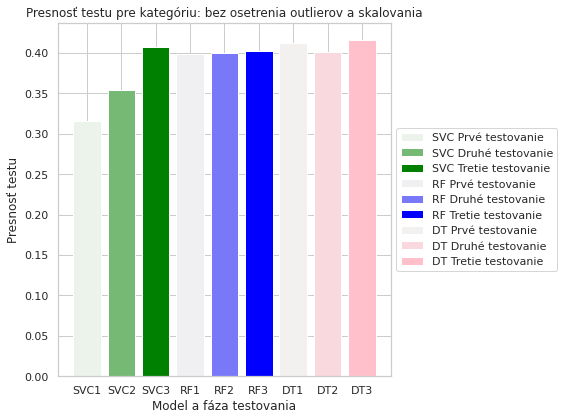

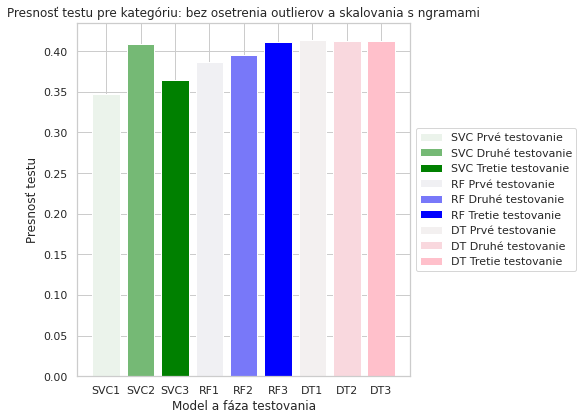

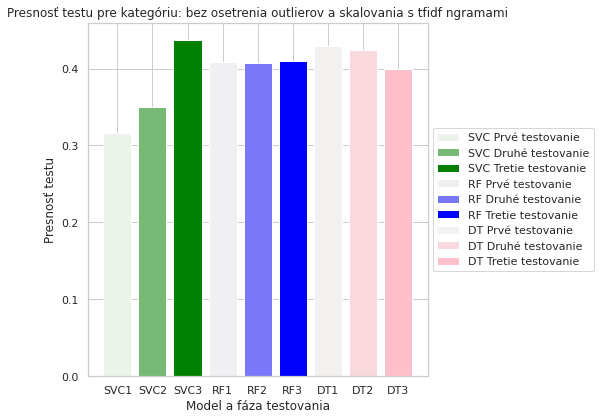

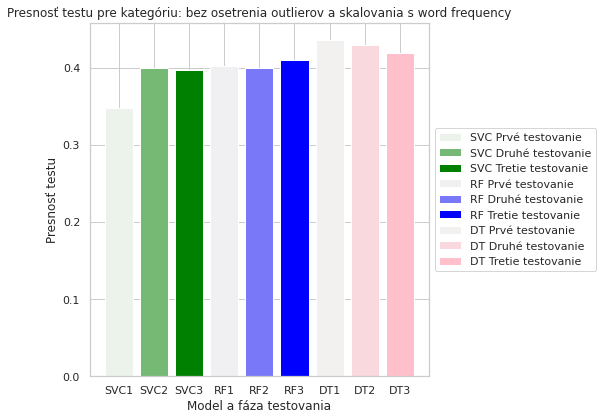

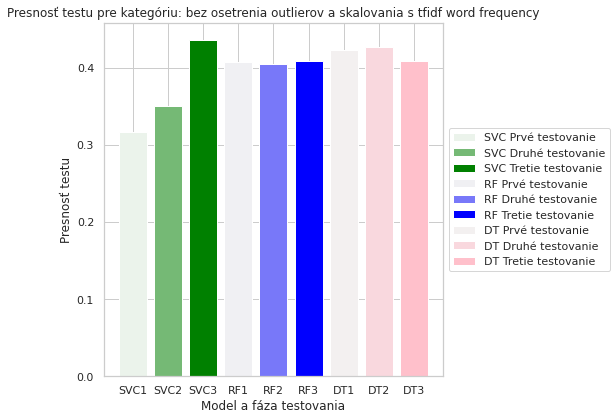

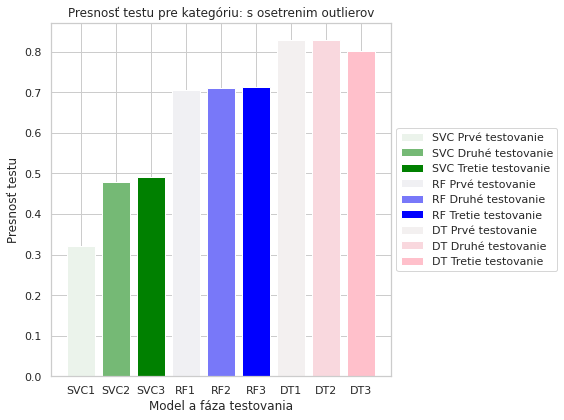

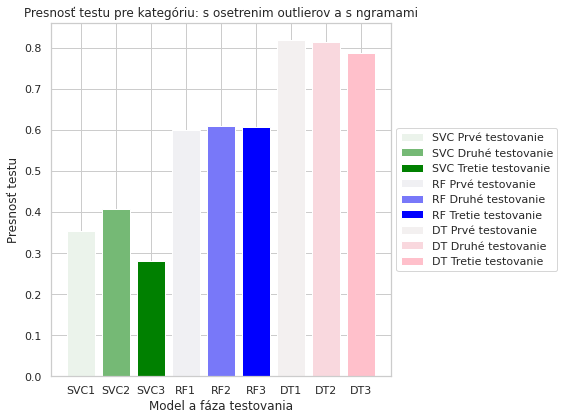

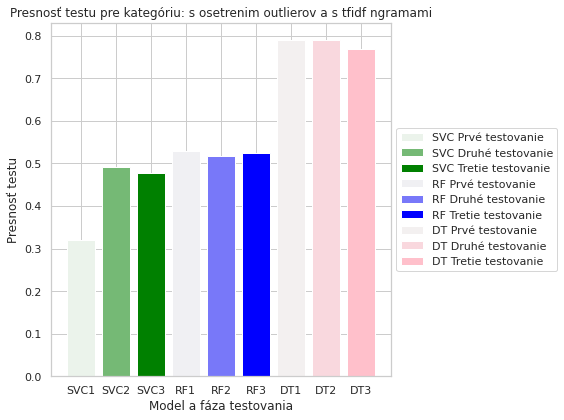

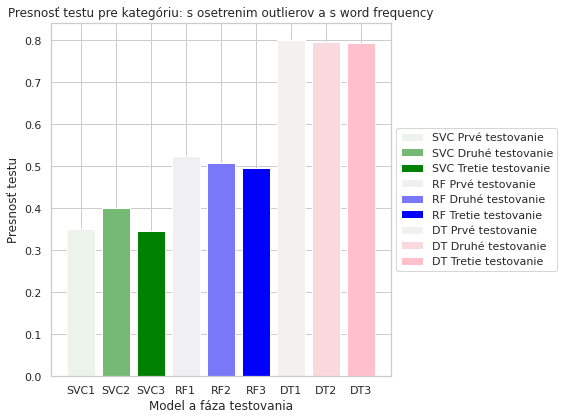

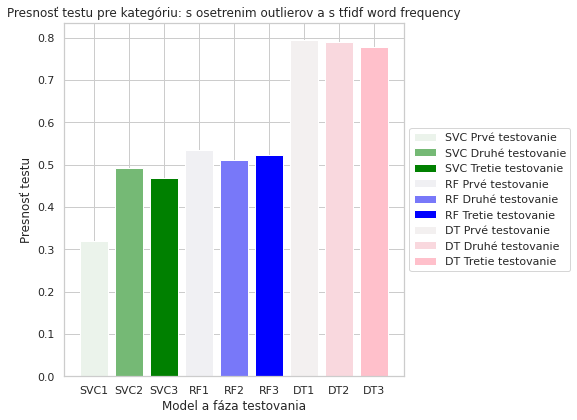

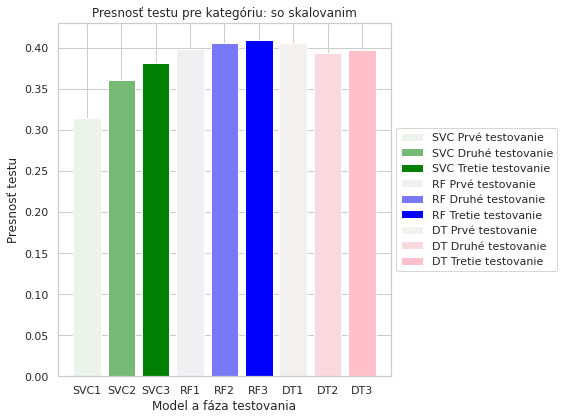

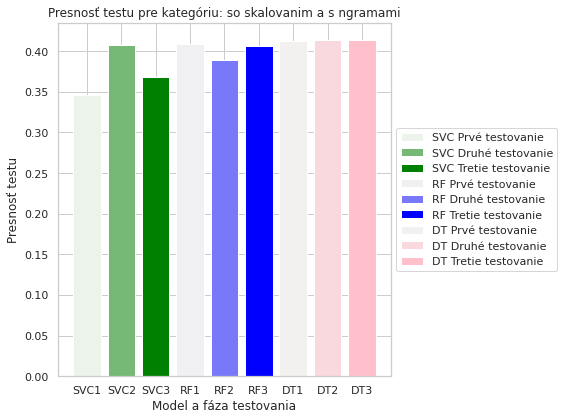

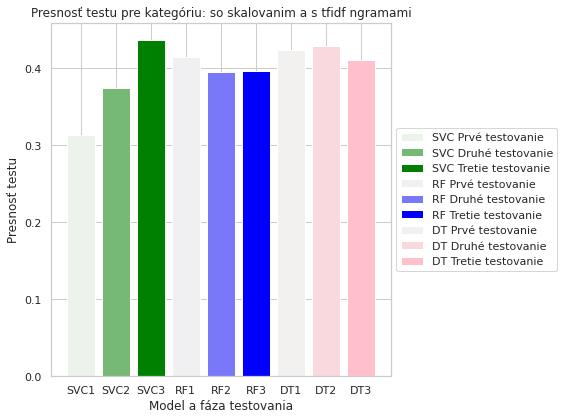

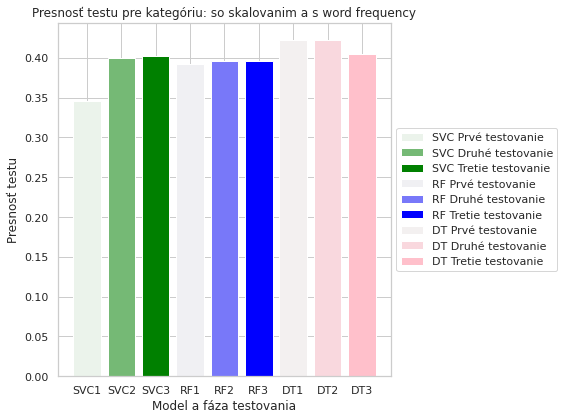

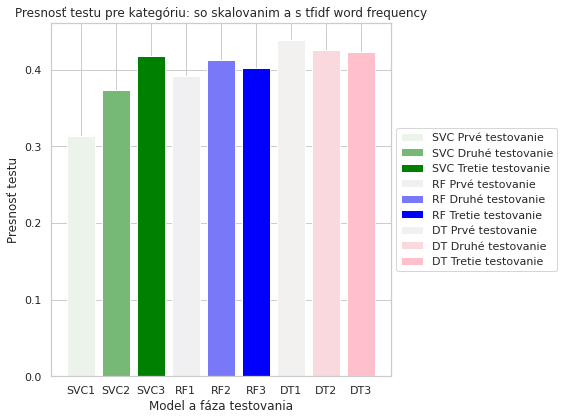

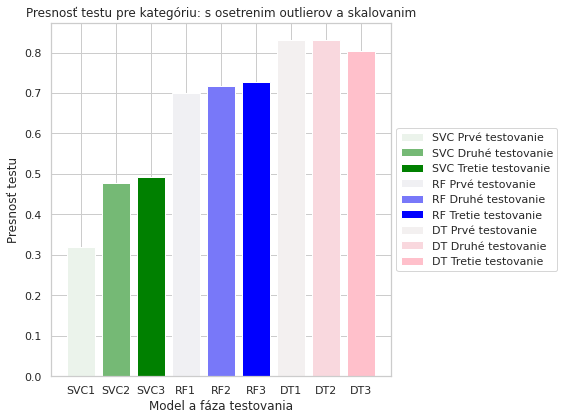

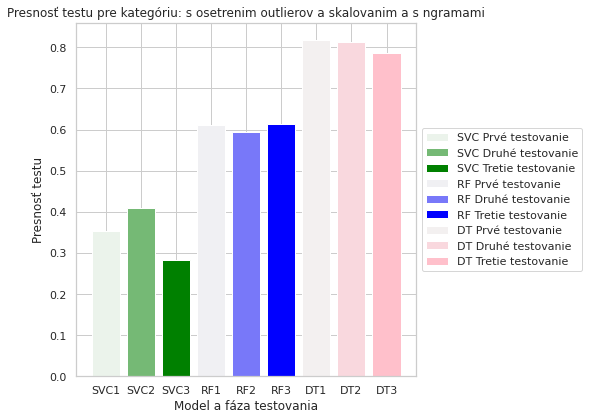

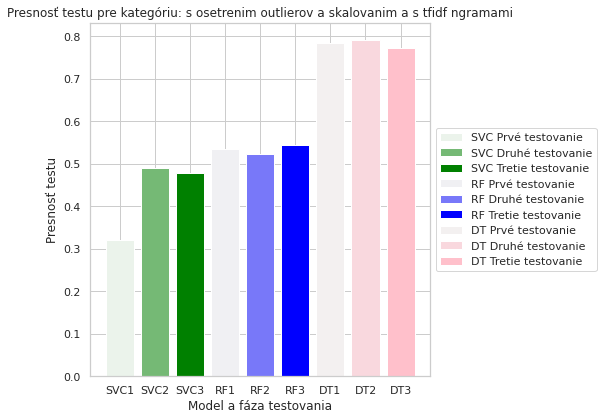

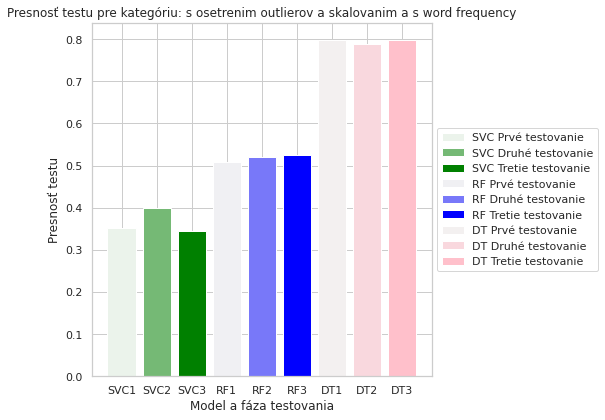

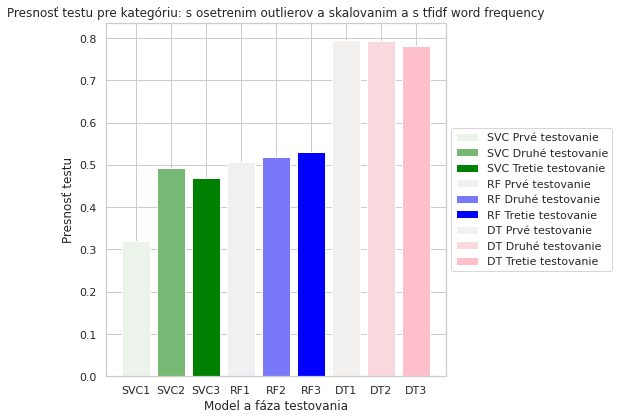

In [1229]:
# Nastavenie štýlu Seaborn pre pekné grafy
sns.set(style="whitegrid")

test_categories = results_svc1.index.tolist()

# Pre každú kategóriu vytvoríme graf
for category in test_categories:
    fig, ax = plt.subplots(figsize=(10, 6))

    # Farebné schémy pre testy
    colors_svc = sns.light_palette("green", 3)
    colors_rf = sns.light_palette("blue", 3)
    colors_gbm = sns.light_palette("pink", 3)

    # Pridanie dát pre SVC
    ax.bar('SVC1', results_svc1.loc[category, 'accuracy_test'], label='SVC Prvé testovanie', color=colors_svc[0])
    ax.bar('SVC2', results_svc2.loc[category, 'accuracy_test'], label='SVC Druhé testovanie', color=colors_svc[1])
    ax.bar('SVC3', results_svc3.loc[category, 'accuracy_test'], label='SVC Tretie testovanie', color=colors_svc[2])

    # Pridanie dát pre Random Forest
    ax.bar('RF1', results_rf1.loc[category, 'accuracy_test'], label='RF Prvé testovanie', color=colors_rf[0])
    ax.bar('RF2', results_rf2.loc[category, 'accuracy_test'], label='RF Druhé testovanie', color=colors_rf[1])
    ax.bar('RF3', results_rf3.loc[category, 'accuracy_test'], label='RF Tretie testovanie', color=colors_rf[2])

    # Pridanie dát pre GRADIENT BOOSTING MASHINE
    ax.bar('DT1', results_gbm1.loc[category, 'accuracy_test'], label='DT Prvé testovanie', color=colors_gbm[0])
    ax.bar('DT2', results_gbm2.loc[category, 'accuracy_test'], label='DT Druhé testovanie', color=colors_gbm[1])
    ax.bar('DT3', results_gbm3.loc[category, 'accuracy_test'], label='DT Tretie testovanie', color=colors_gbm[2])

    # Nastavenie legendy mimo grafu na pravej strane
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Titulok grafu
    ax.set_title(f'Presnosť testu pre kategóriu: {category}')

    # Popisy osí
    ax.set_xlabel('Model a fáza testovania')
    ax.set_ylabel('Presnosť testu')

    # Zobrazenie grafu
    plt.tight_layout(rect=[0, 0, 0.8, 1])  # Uvoľnenie priestoru pre legendu
    plt.show()

<Figure size 864x504 with 0 Axes>

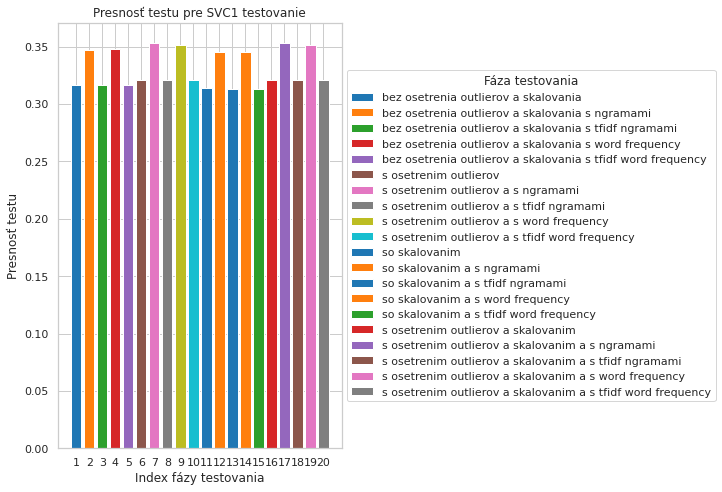

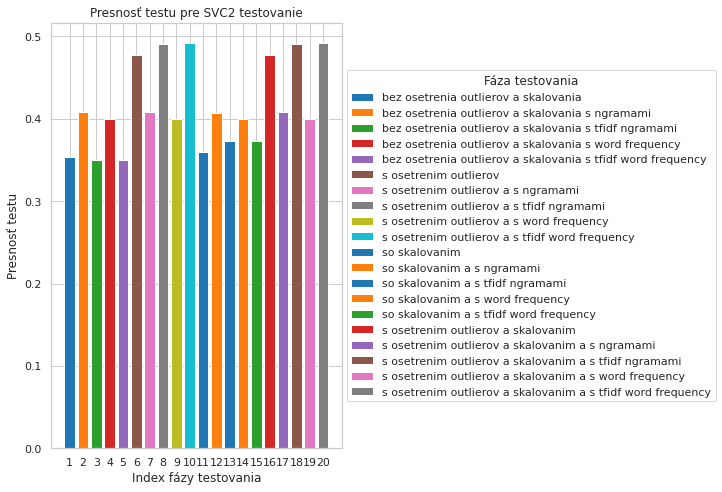

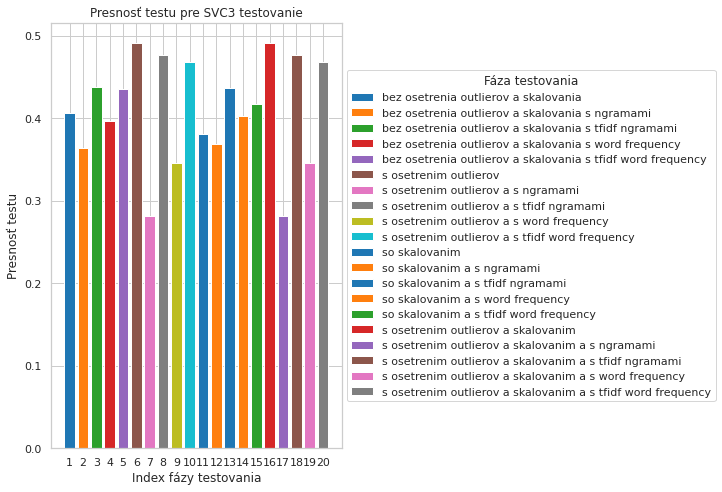

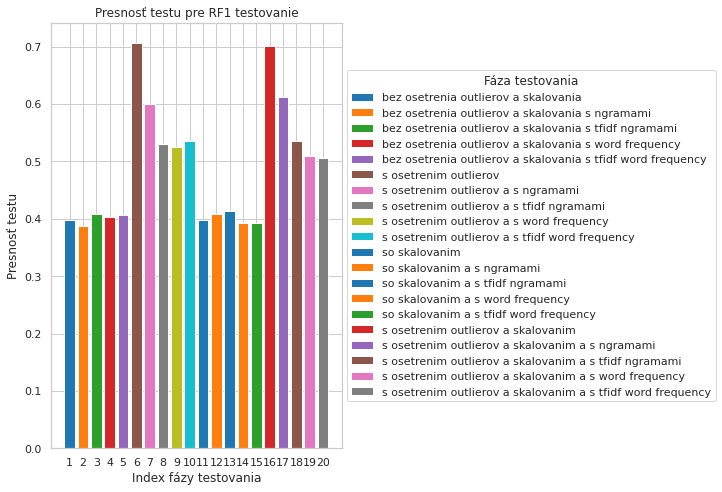

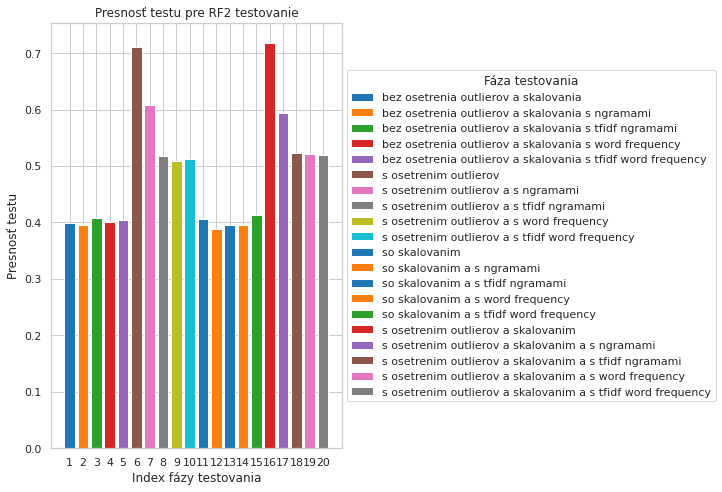

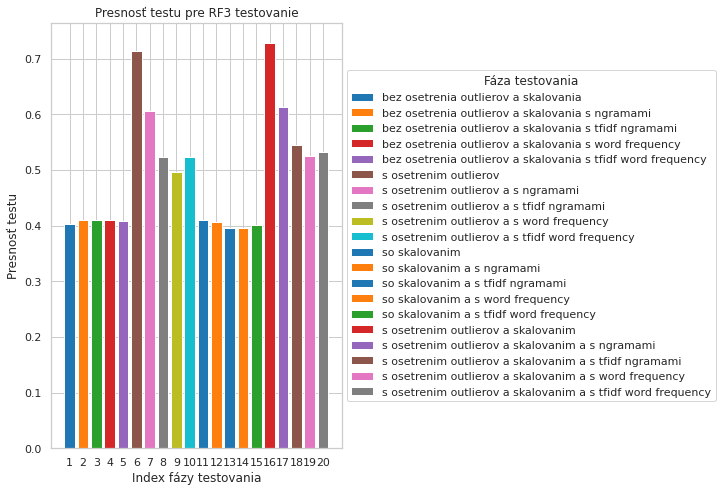

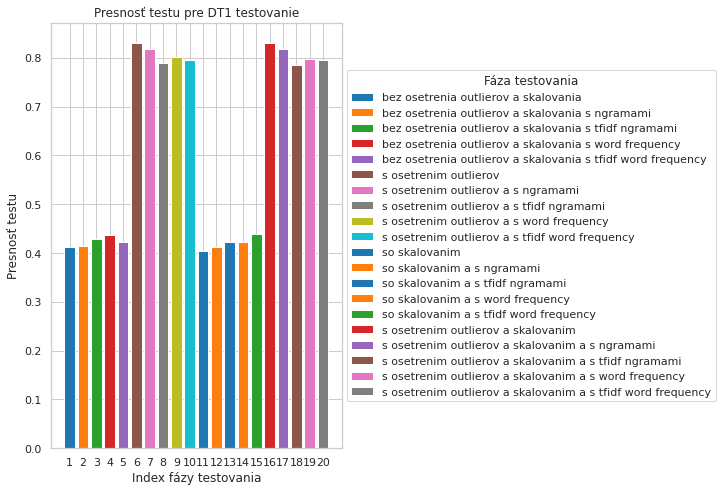

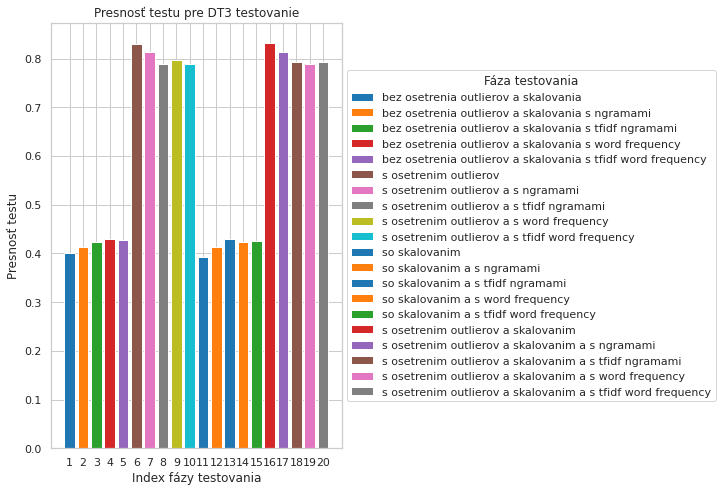

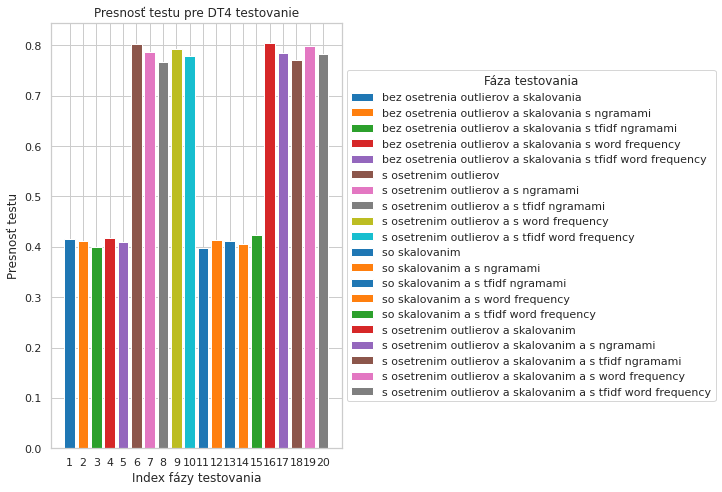

In [1230]:
# Nastavenie veľkosti grafu
plt.figure(figsize=(12, 7))

# Farebná paleta pre rôzne testovania
colors = sns.color_palette("tab10", 12)

# Vykreslenie grafu pre každý DataFrame
for results_df, label in [(results_svc1, 'SVC1'), (results_svc2, 'SVC2'), (results_svc3, 'SVC3'), (results_rf1, 'RF1'), (results_rf2, 'RF2'), (results_rf3, 'RF3'), (results_gbm1, 'DT1'), (results_gbm2, 'DT3'), (results_gbm3, 'DT4')]:
    fig, ax = plt.subplots(figsize=(12, 7))

    # Názvy indexov vo vašom DataFrame, upravte podľa potreby
    index_names = results_df.index.tolist()

    # Vykreslenie stĺpcov pre každý index
    for i, index_name in enumerate(index_names):
        # Vyberieme farbu pre aktuálny index
        color = colors[i % len(colors)]
        # Vykreslíme stĺpec a pridáme popisek pre legendu
        ax.bar(i, results_df.loc[index_name, 'accuracy_test'], color=color, label=index_name)

    # Nastavíme os x na čísla od 0 do počtu indexov - 1
    ax.set_xticks(np.arange(len(index_names)))
    ax.set_xticklabels(np.arange(1, len(index_names) + 1))

    # Pridáme legendu
    ax.legend(title='Fáza testovania', loc='center left', bbox_to_anchor=(1, 0.5))

    # Nastavíme názov grafu a popisy osí
    ax.set_title(f'Presnosť testu pre {label} testovanie')
    ax.set_xlabel('Index fázy testovania')
    ax.set_ylabel('Presnosť testu')

    # Zobrazíme graf
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()